In [1]:
from qiskit import QuantumCircuit
from qiskit_ibm_provider import IBMProvider

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from models.victim_params import VictimParams
from qiskit.result import marginal_counts

In [8]:
provider = IBMProvider()

# Job - ci68jhtejm3lf1f43970

In [2]:
job_id = 'ci68jhtejm3lf1f43970'

In [4]:
with open('./other_experiments/delay_exps_2.p', 'rb') as f:
    (empty_qc, experiment_qcs) = pickle.load(f)

In [6]:
[
    h_delay_h_qcs, sx_delay_sx_x_qcs,
    h_xxxx_h_qcs, sx_xxxx_sx_x_qcs,
    h_delayxx_h_qcs, sx_delayxx_sx_x_qcs
] = experiment_qcs

In [9]:
job = provider.backend.retrieve_job(job_id)
qcs = job.circuits()
counts = job.result().get_counts()

In [10]:
snooper_qubits = range(16)

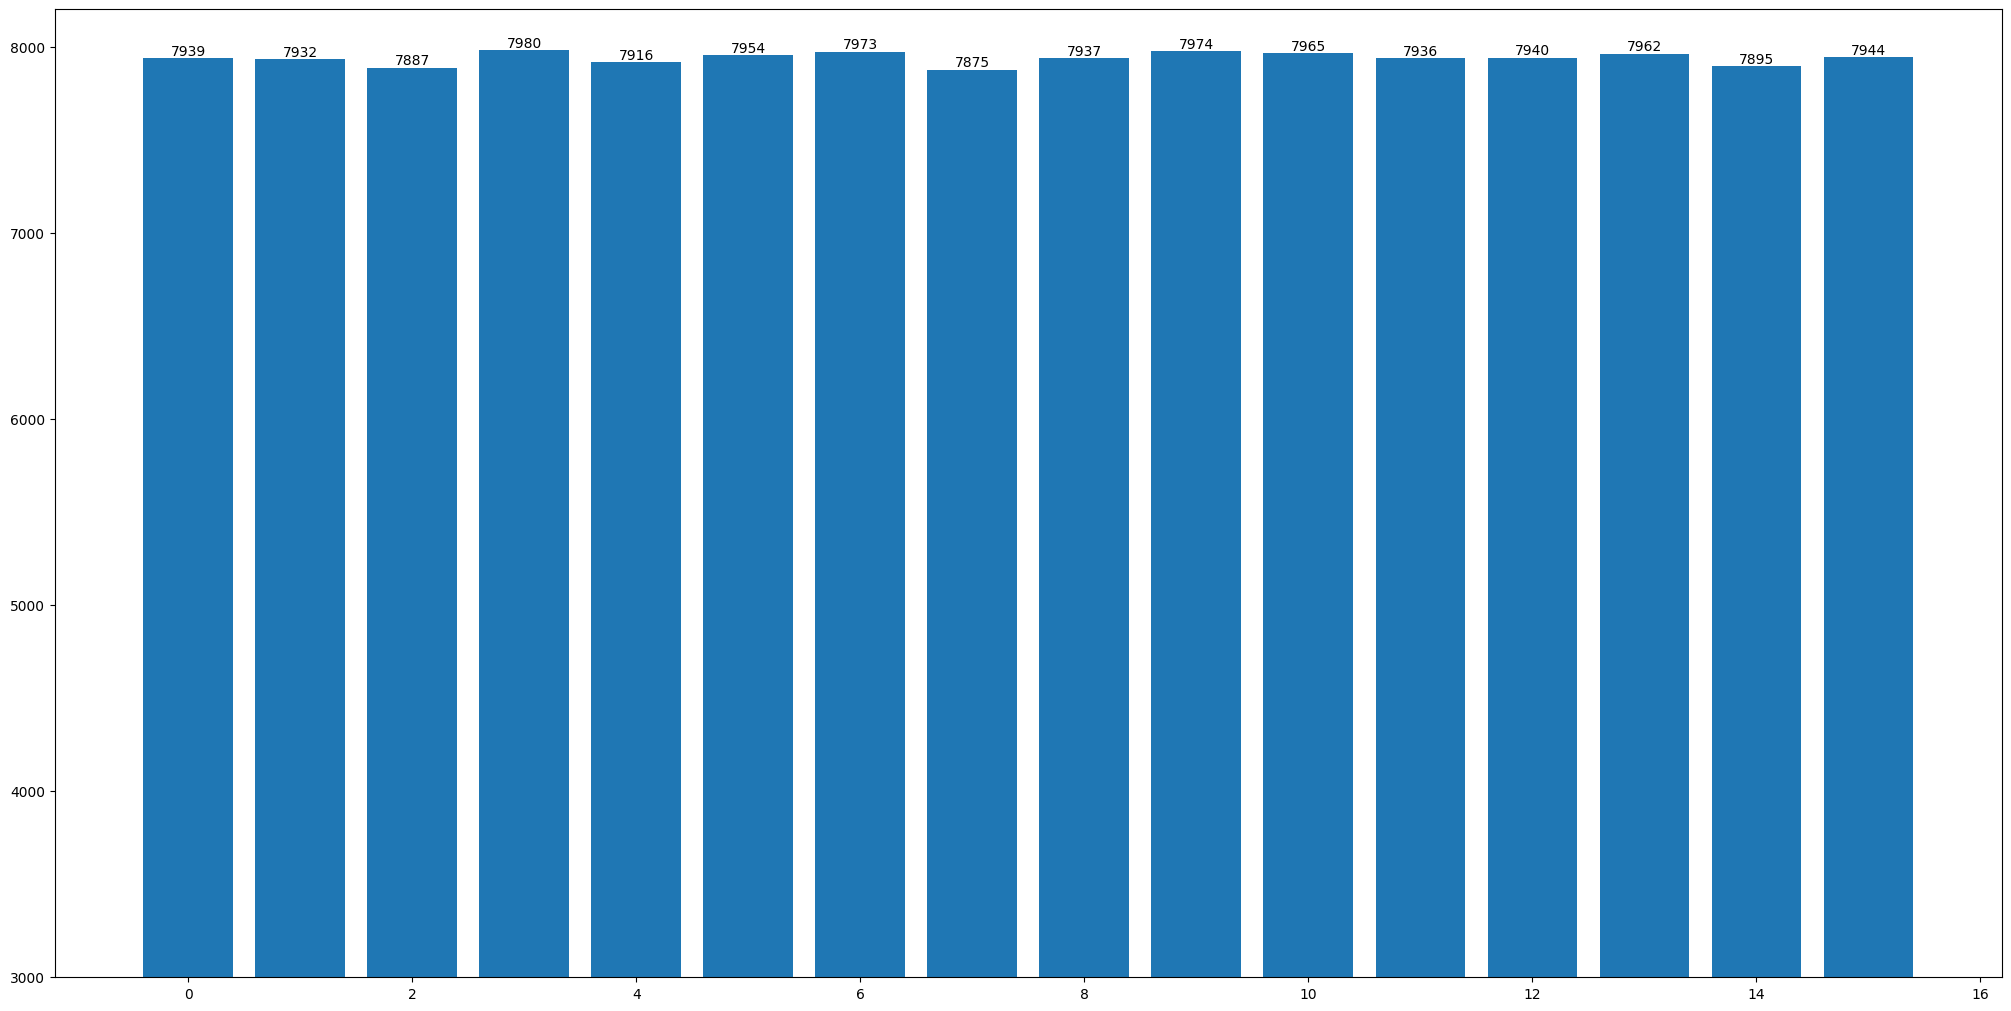

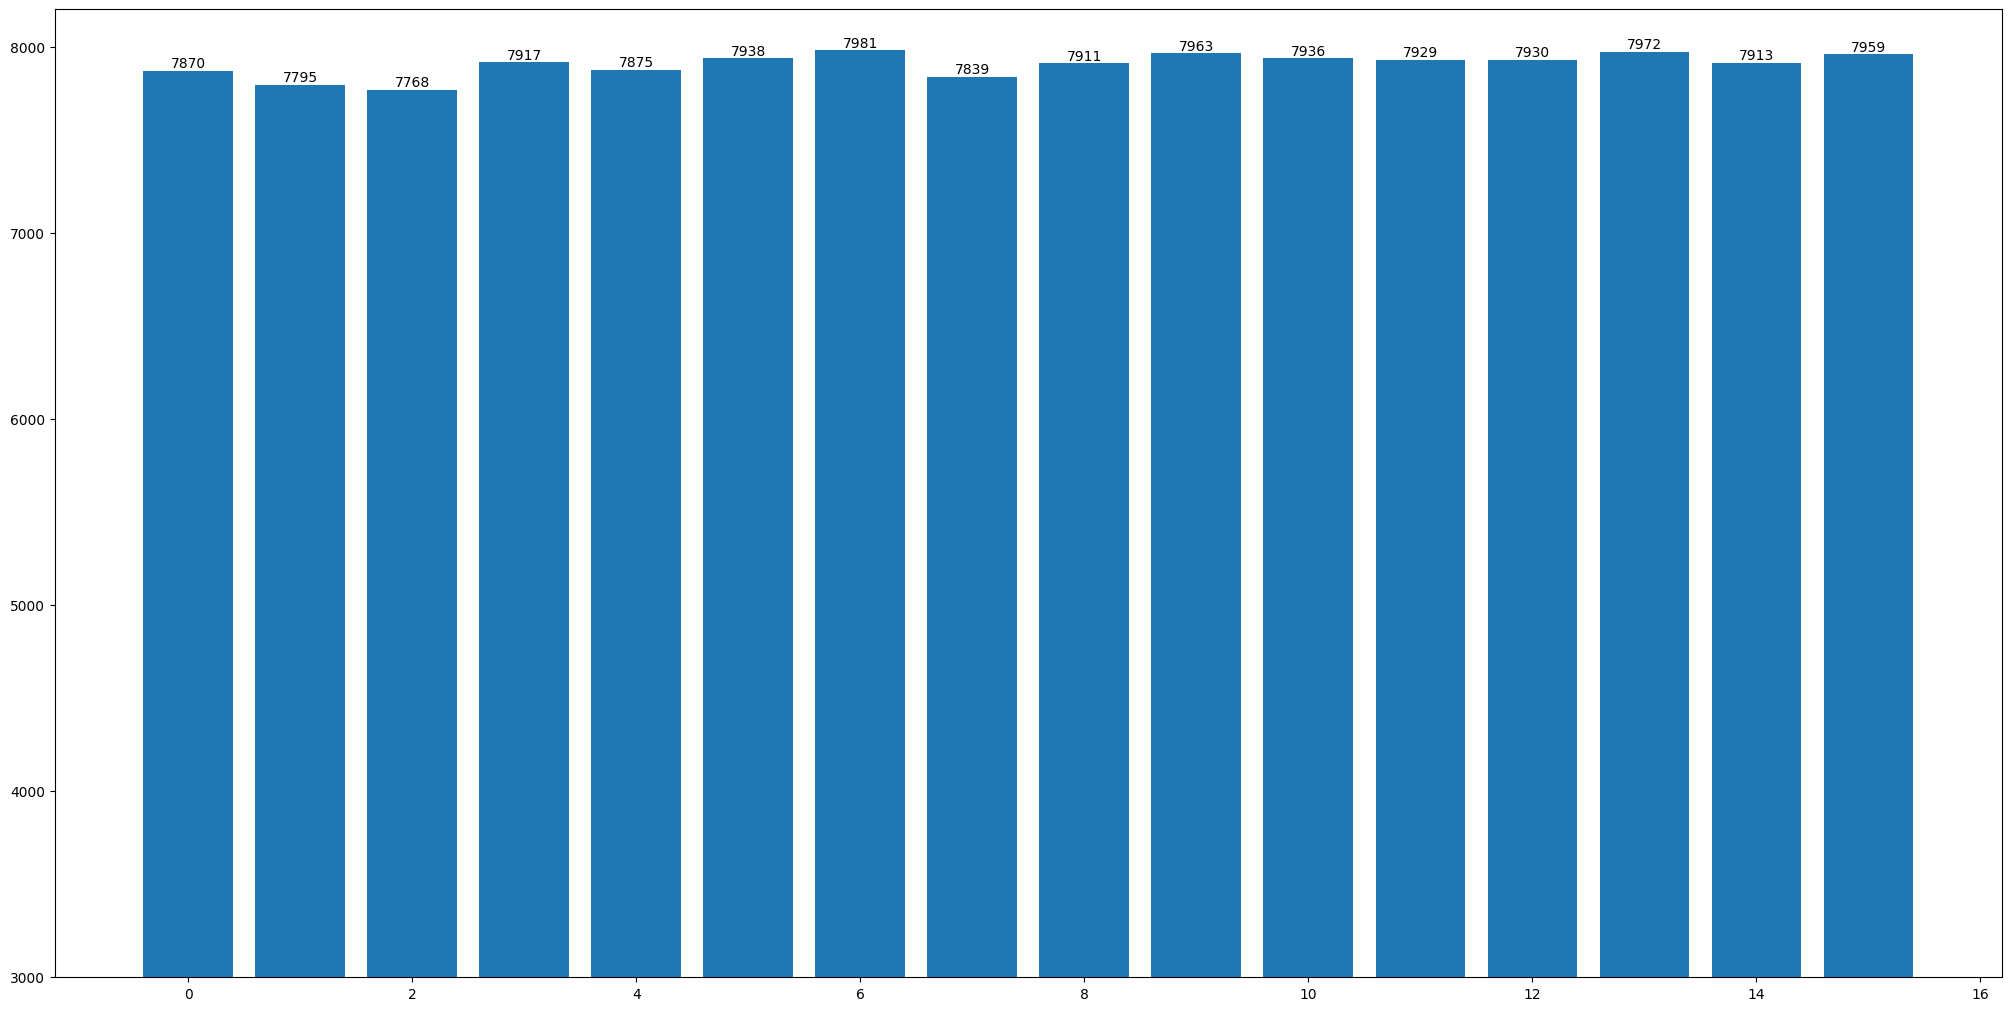

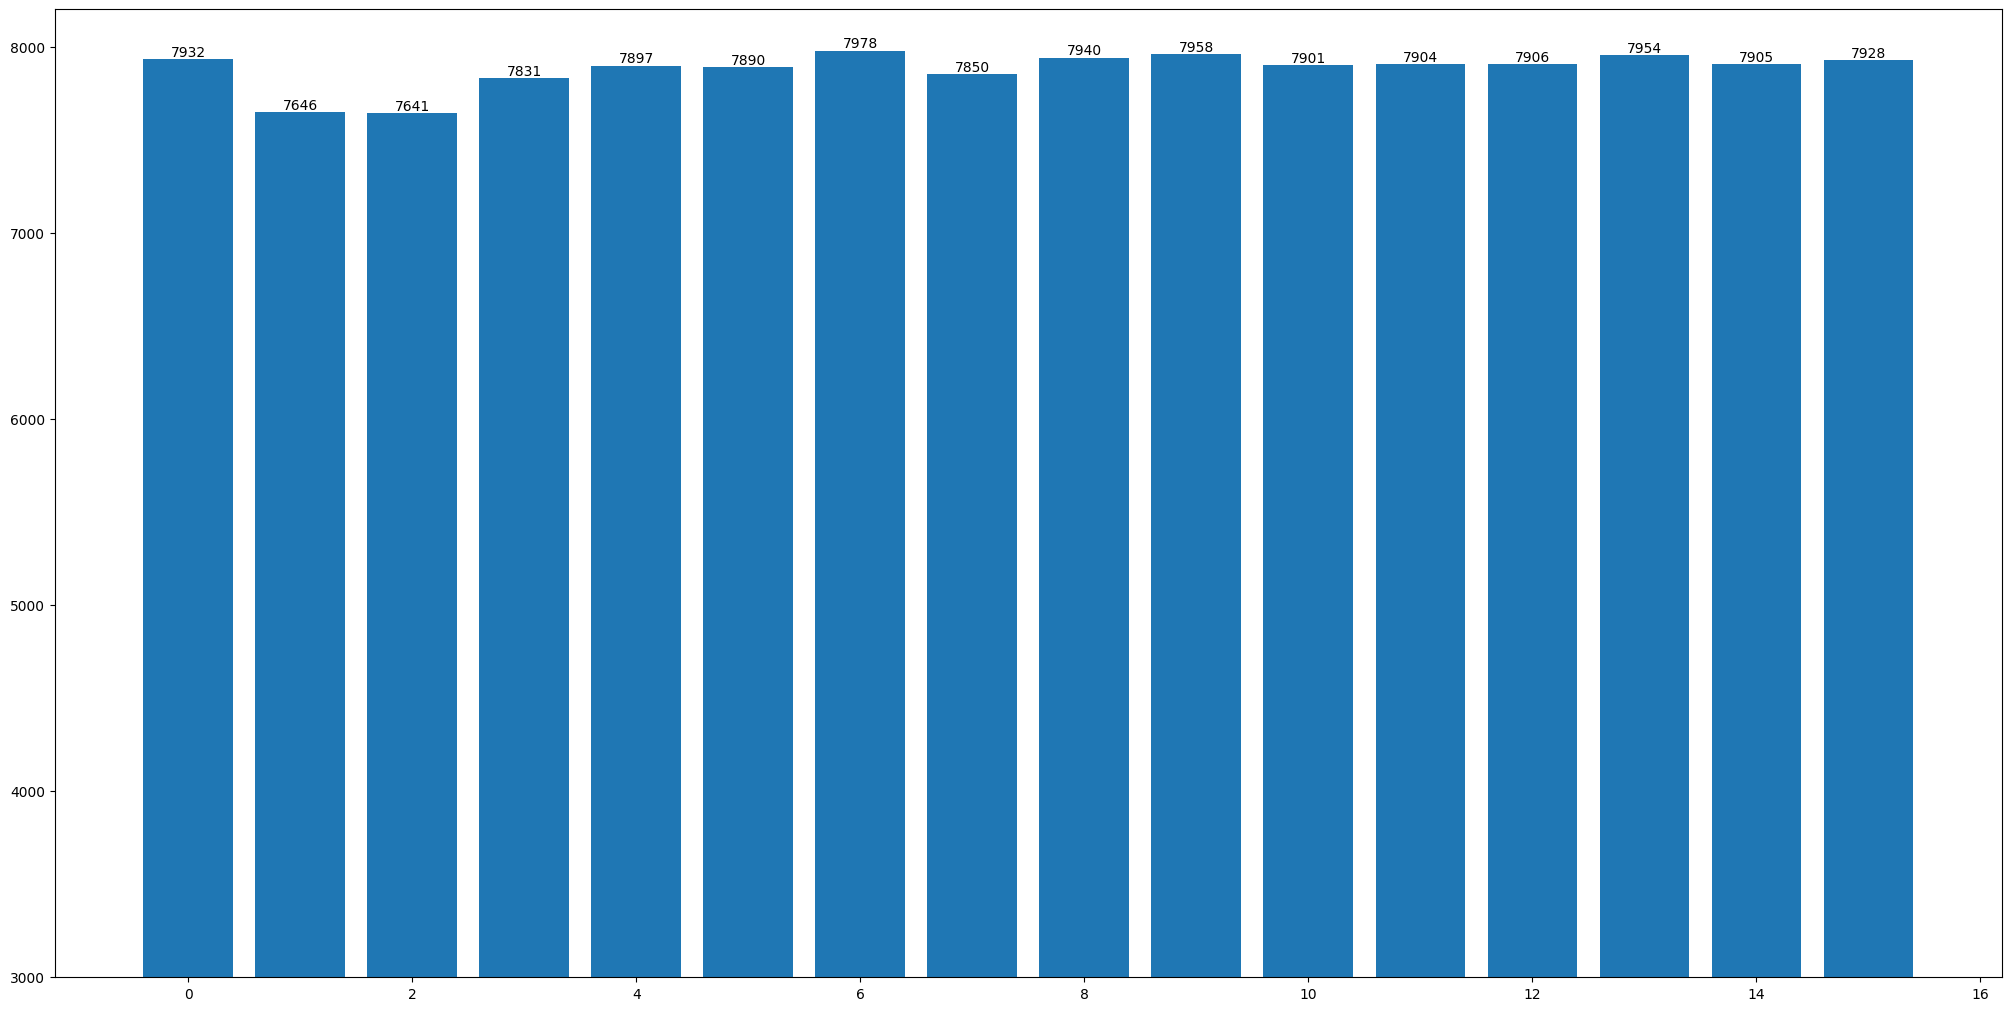

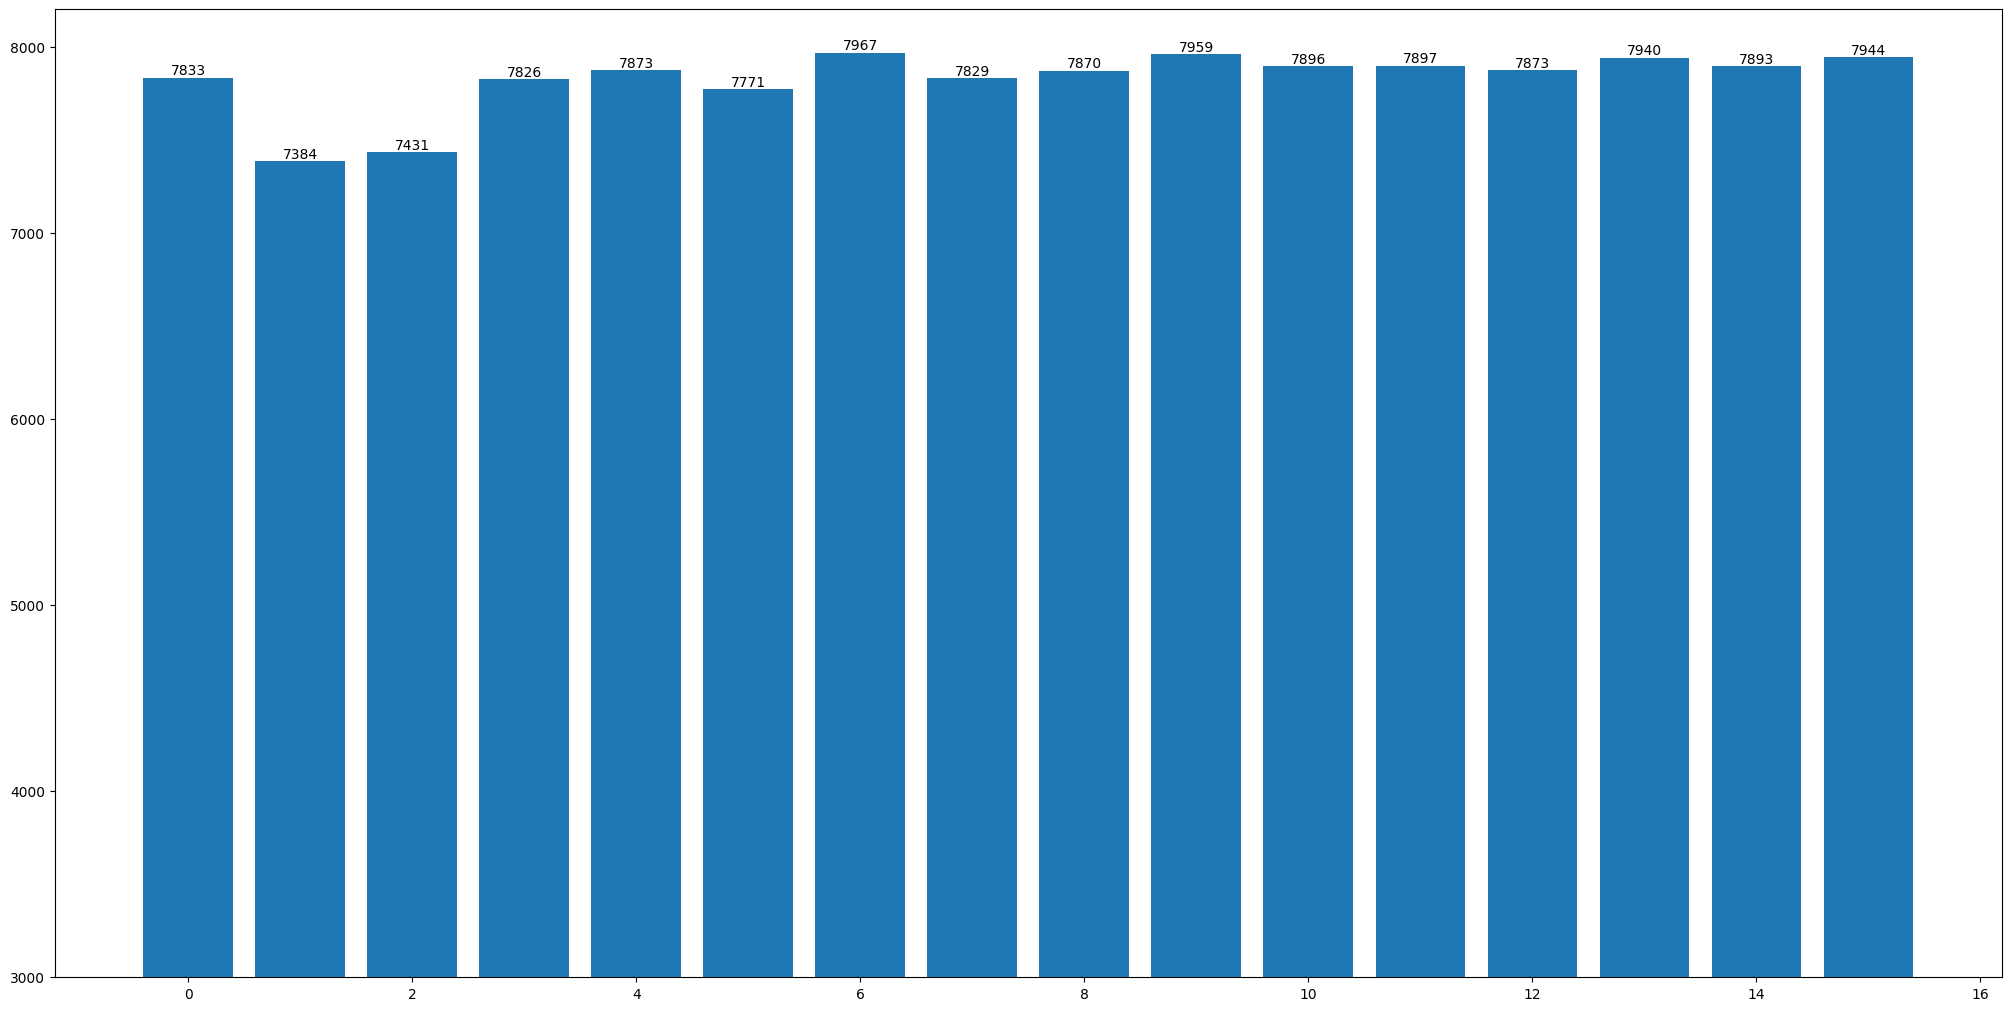

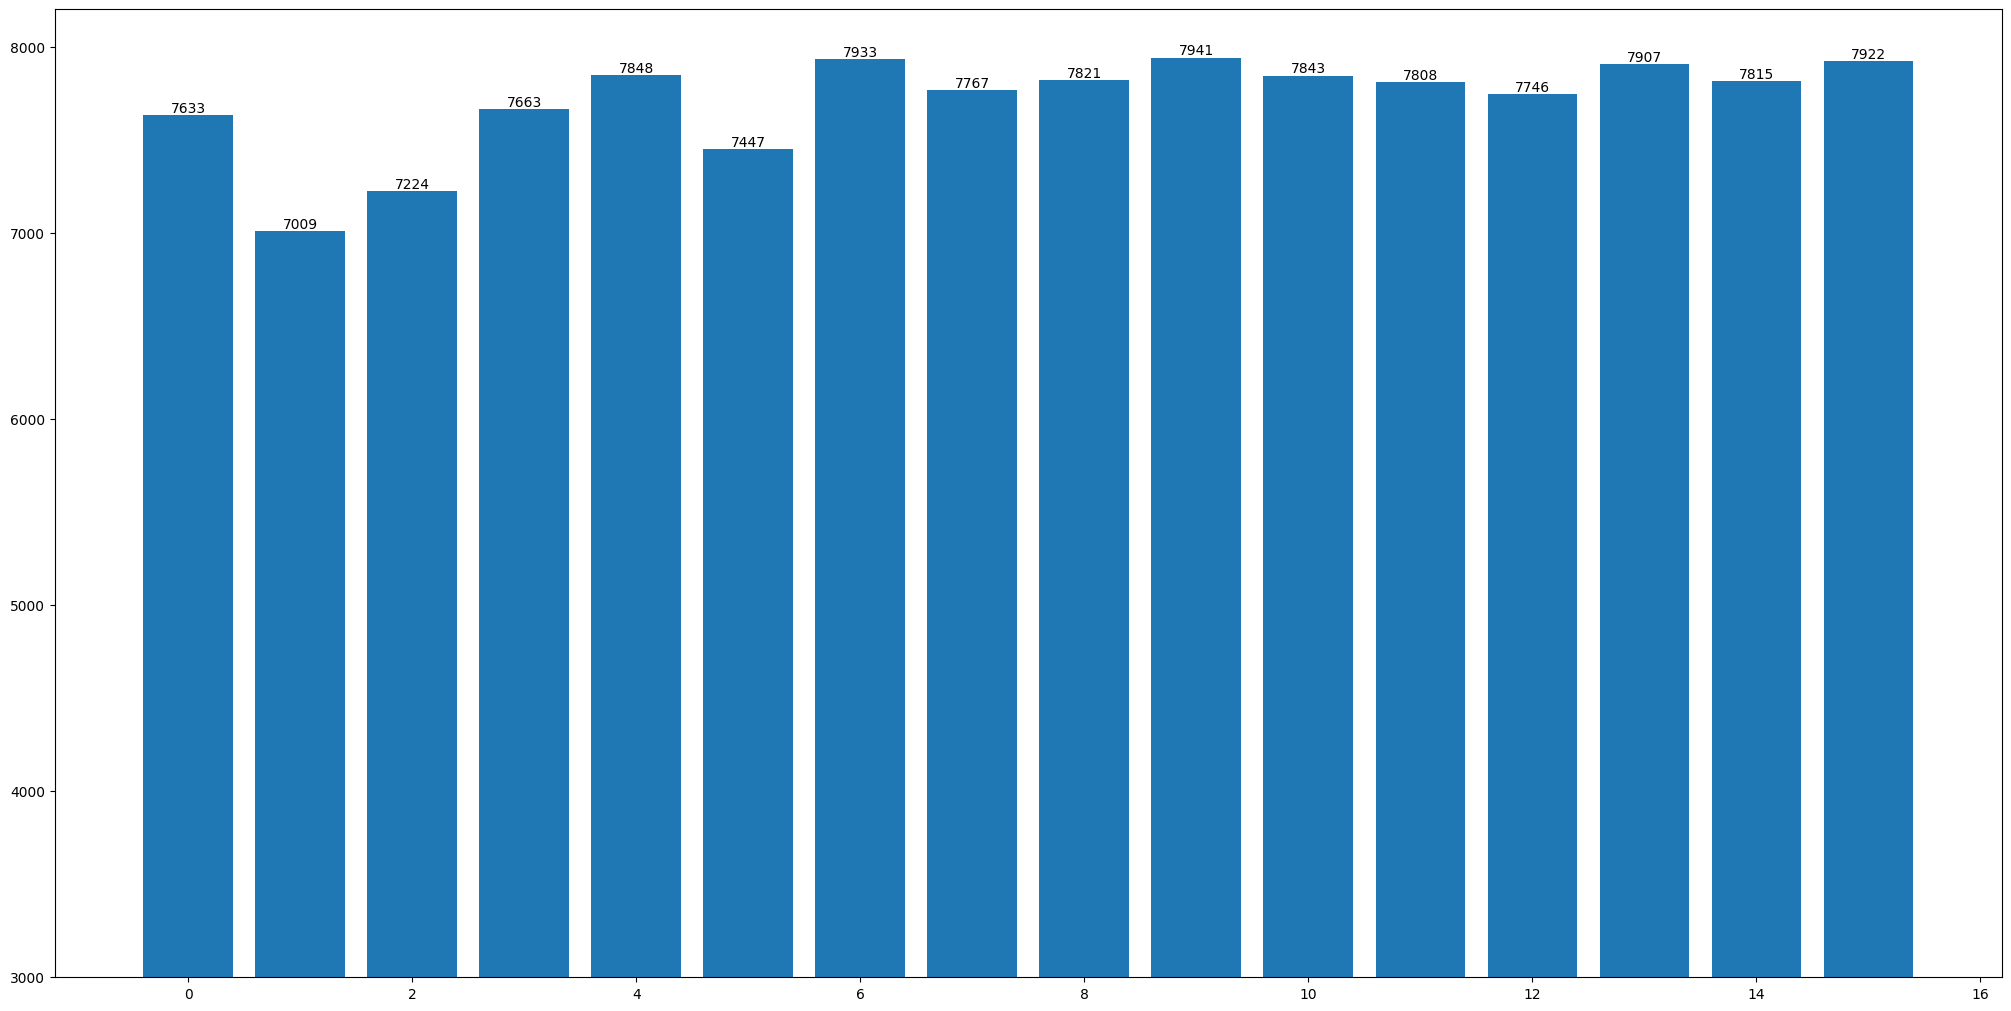

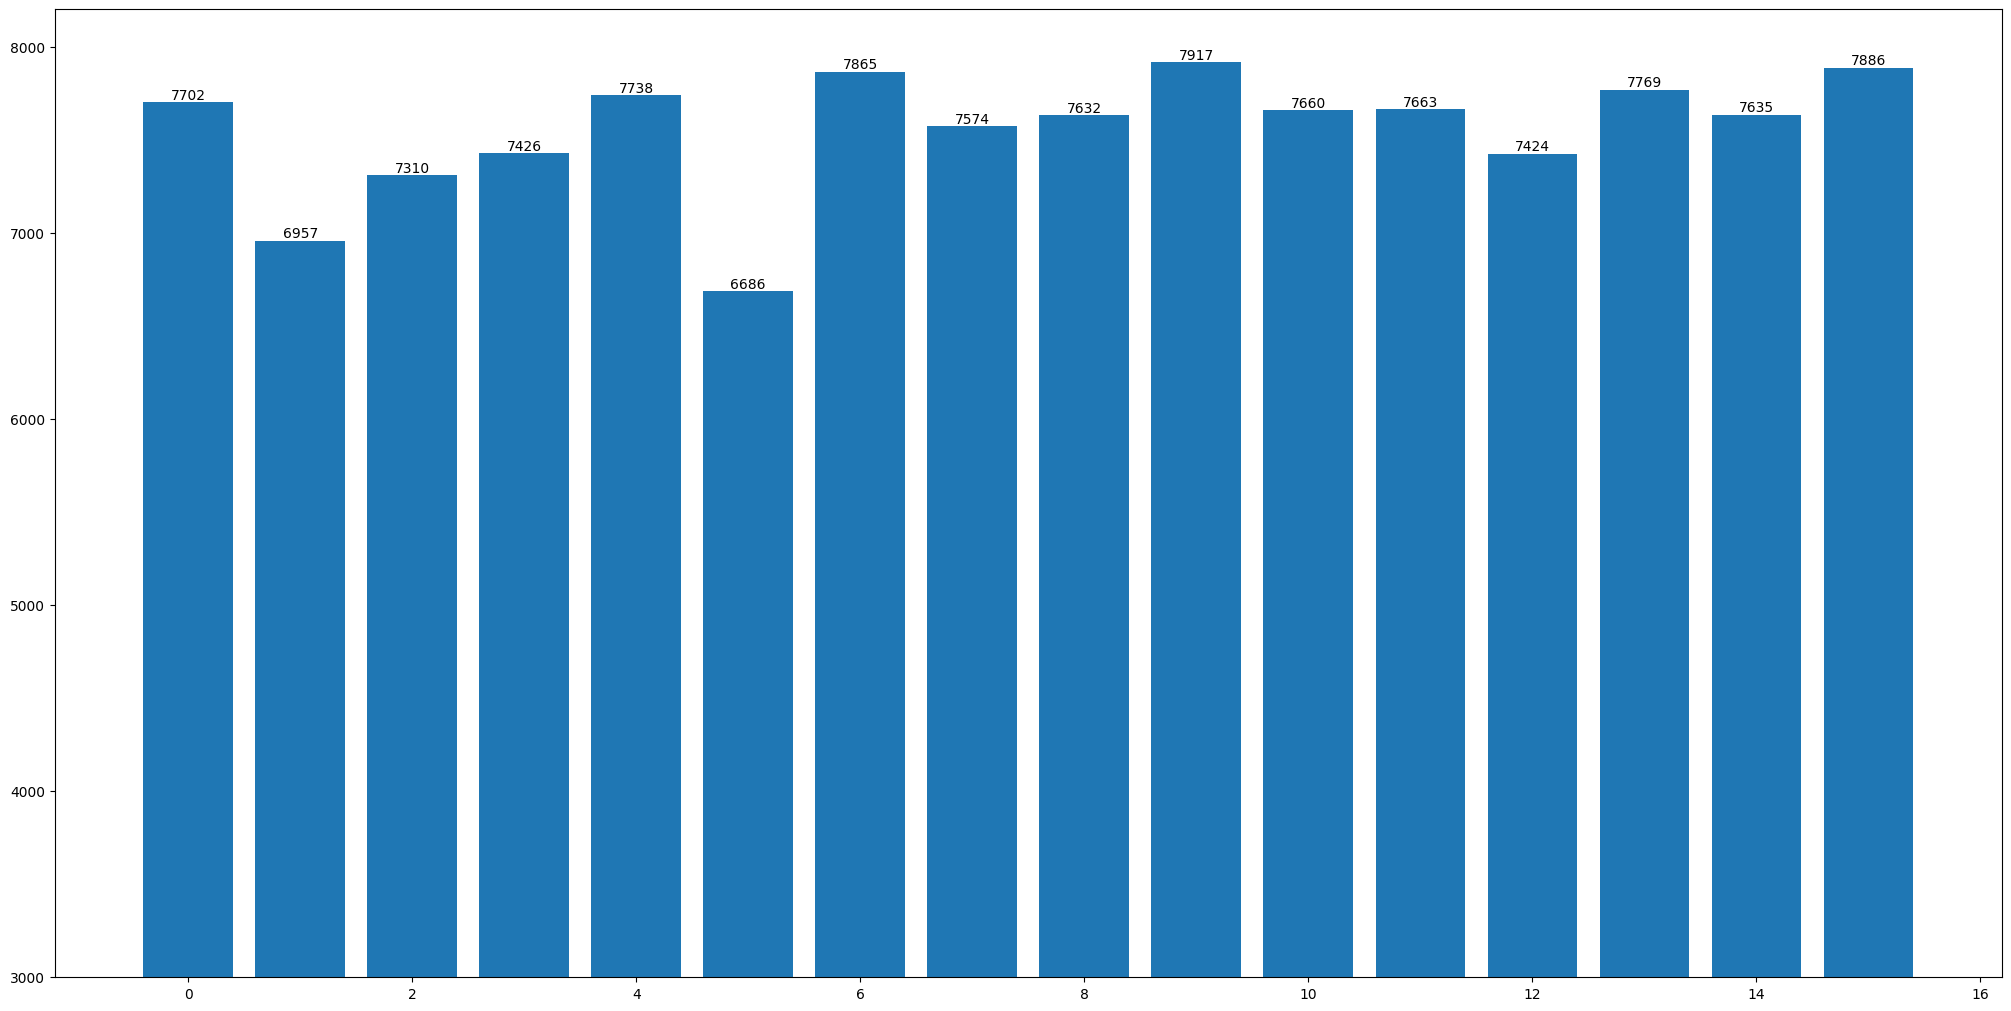

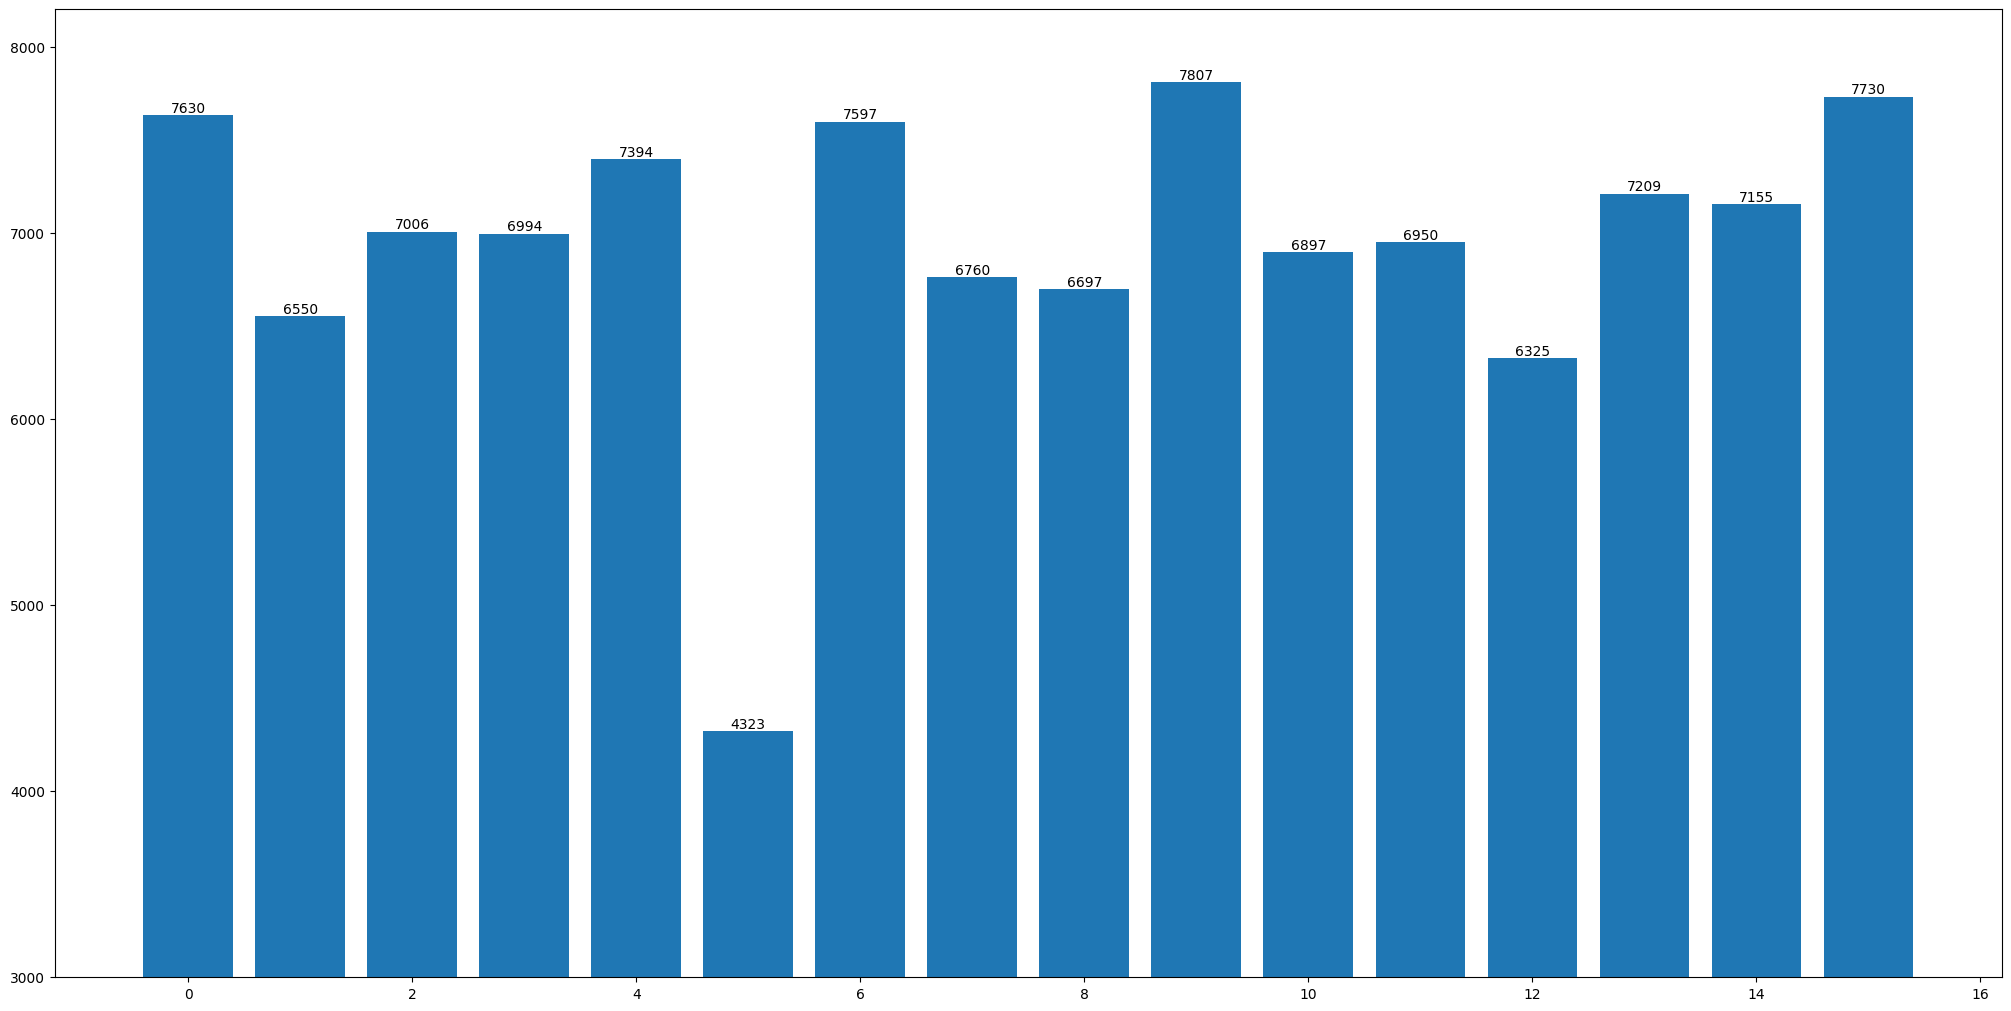

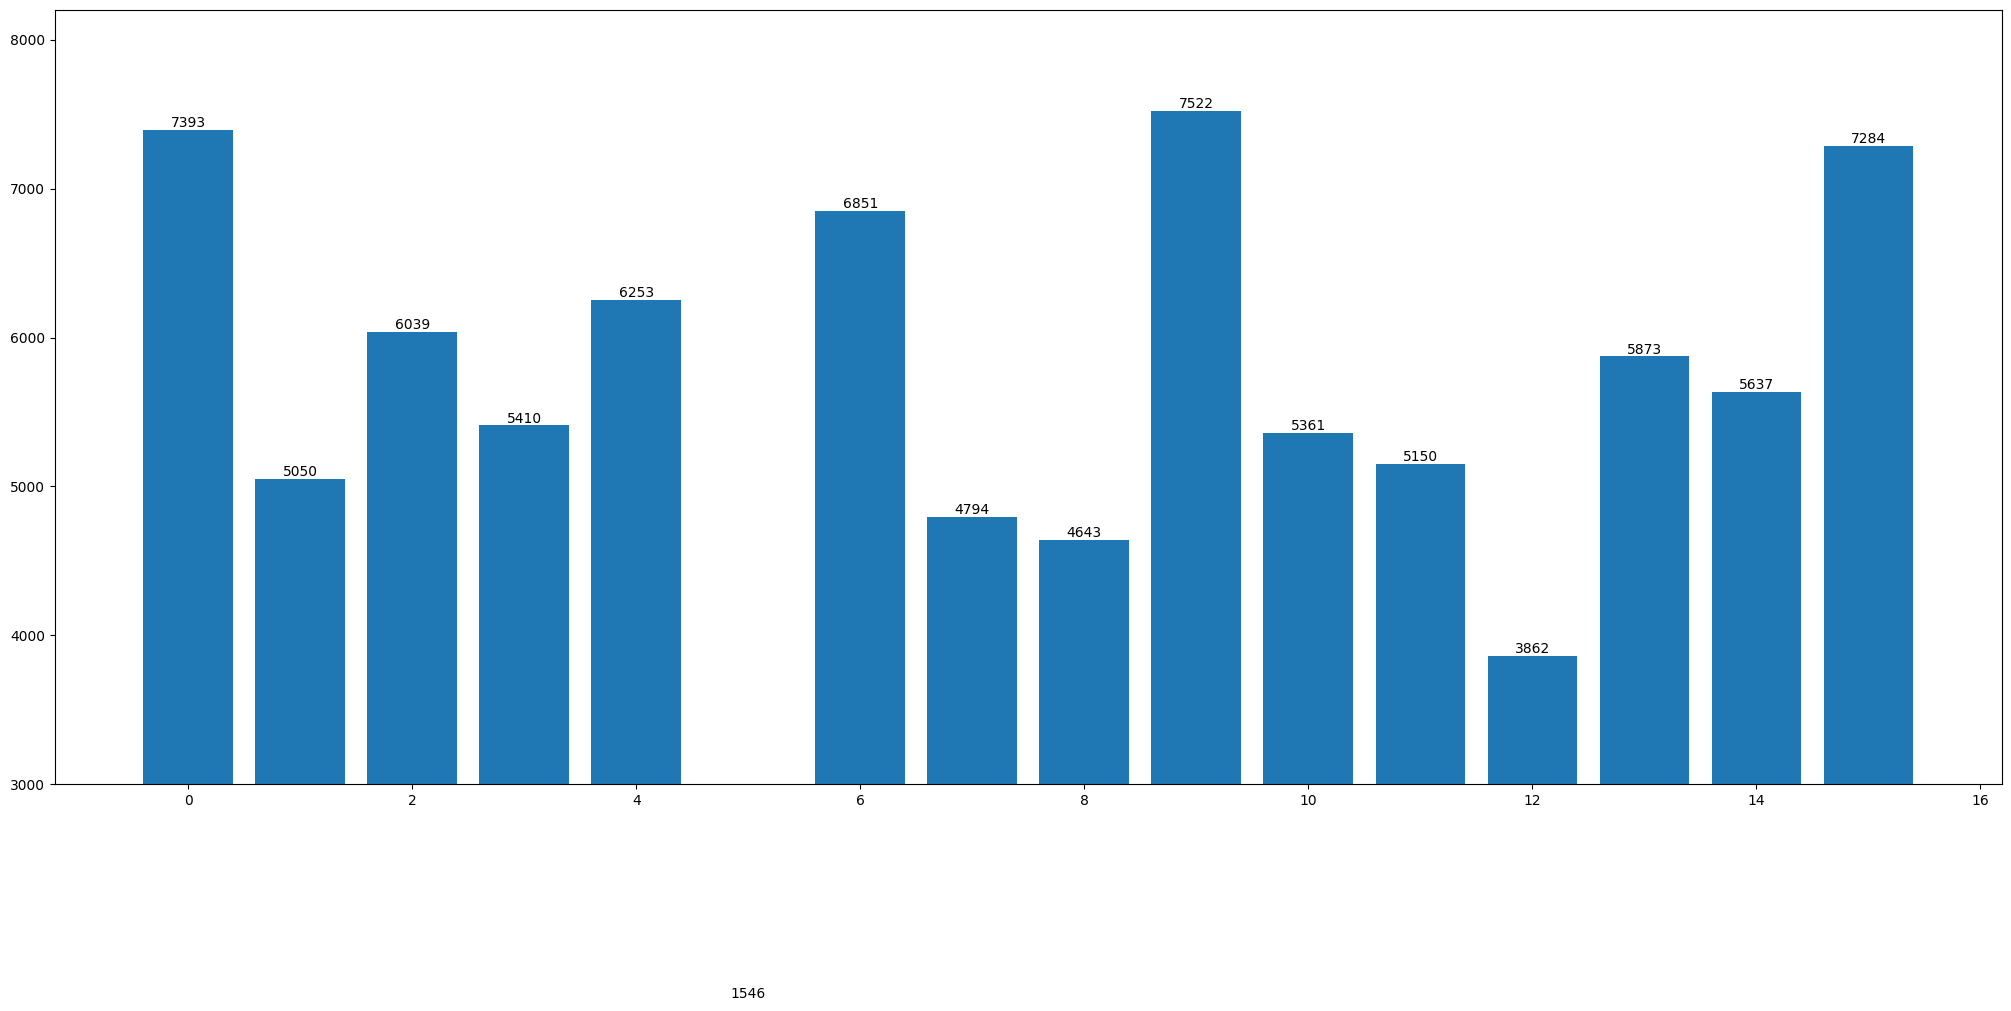

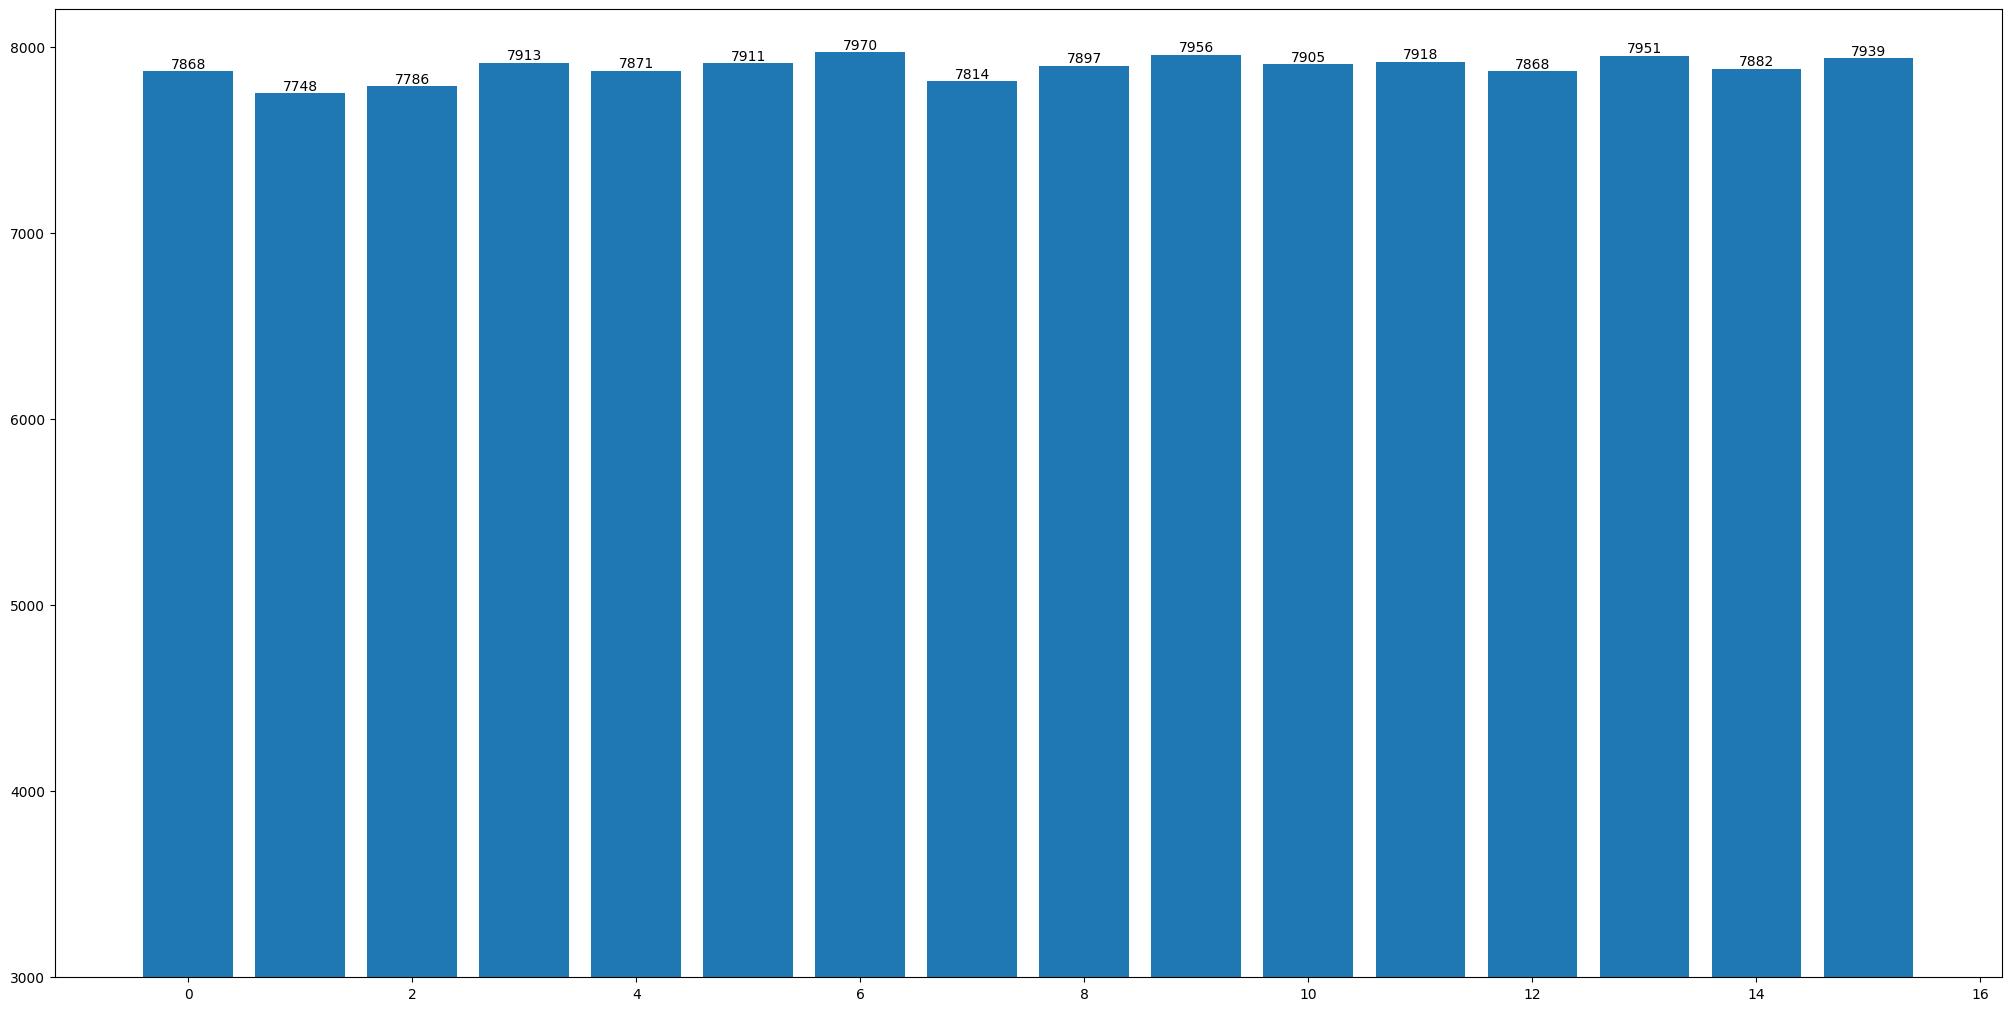

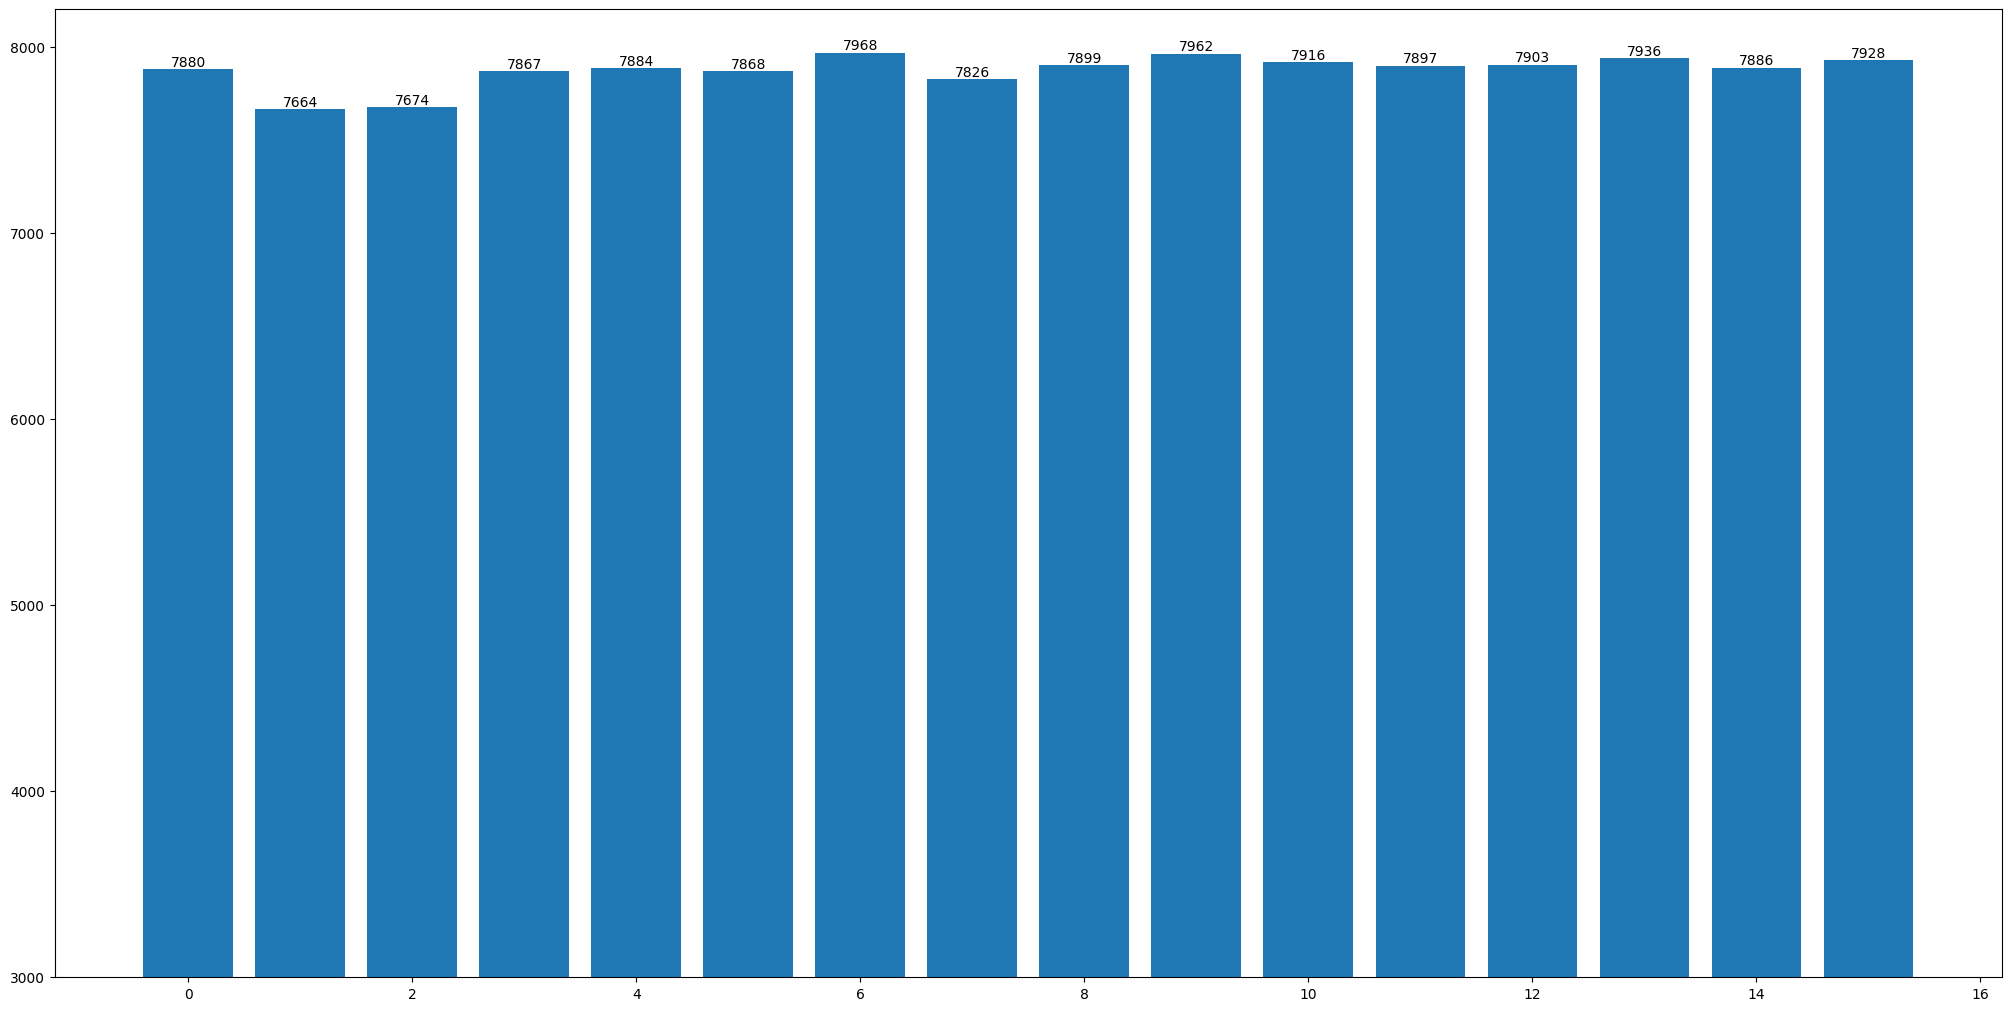

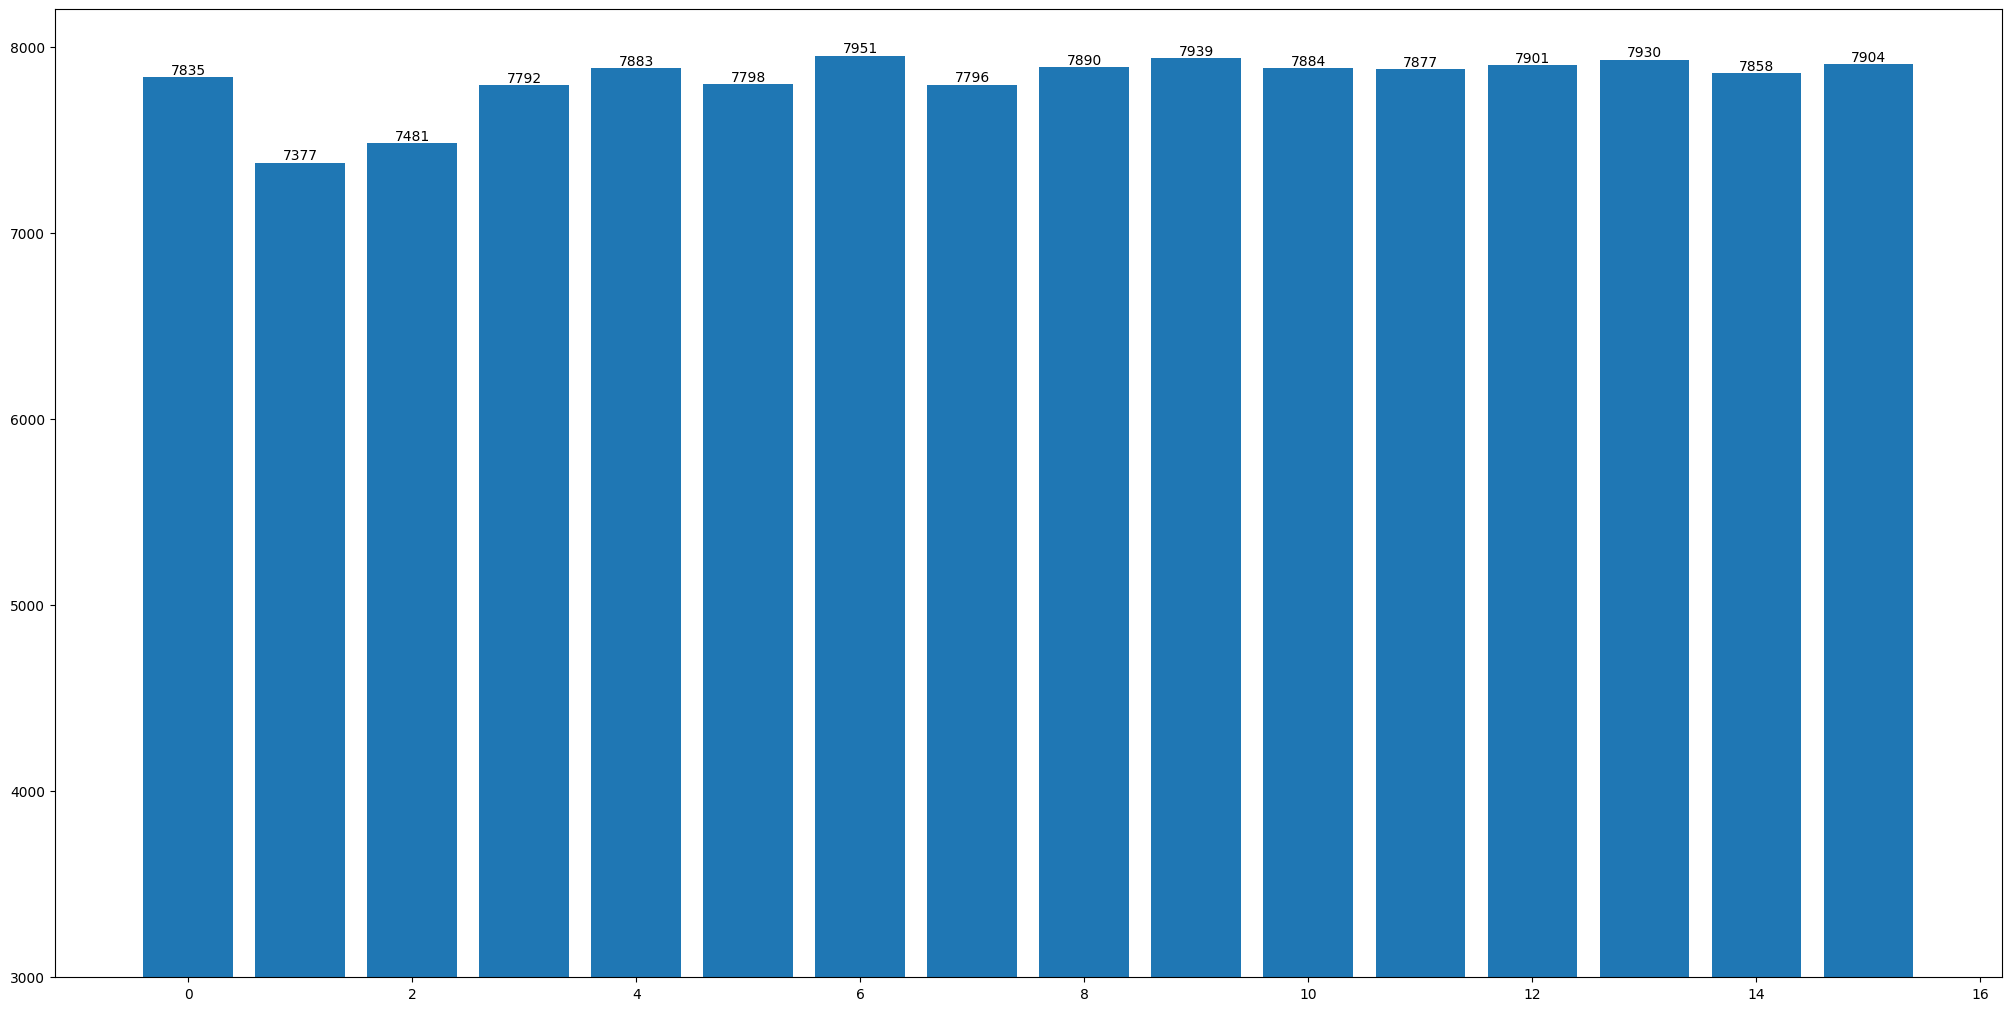

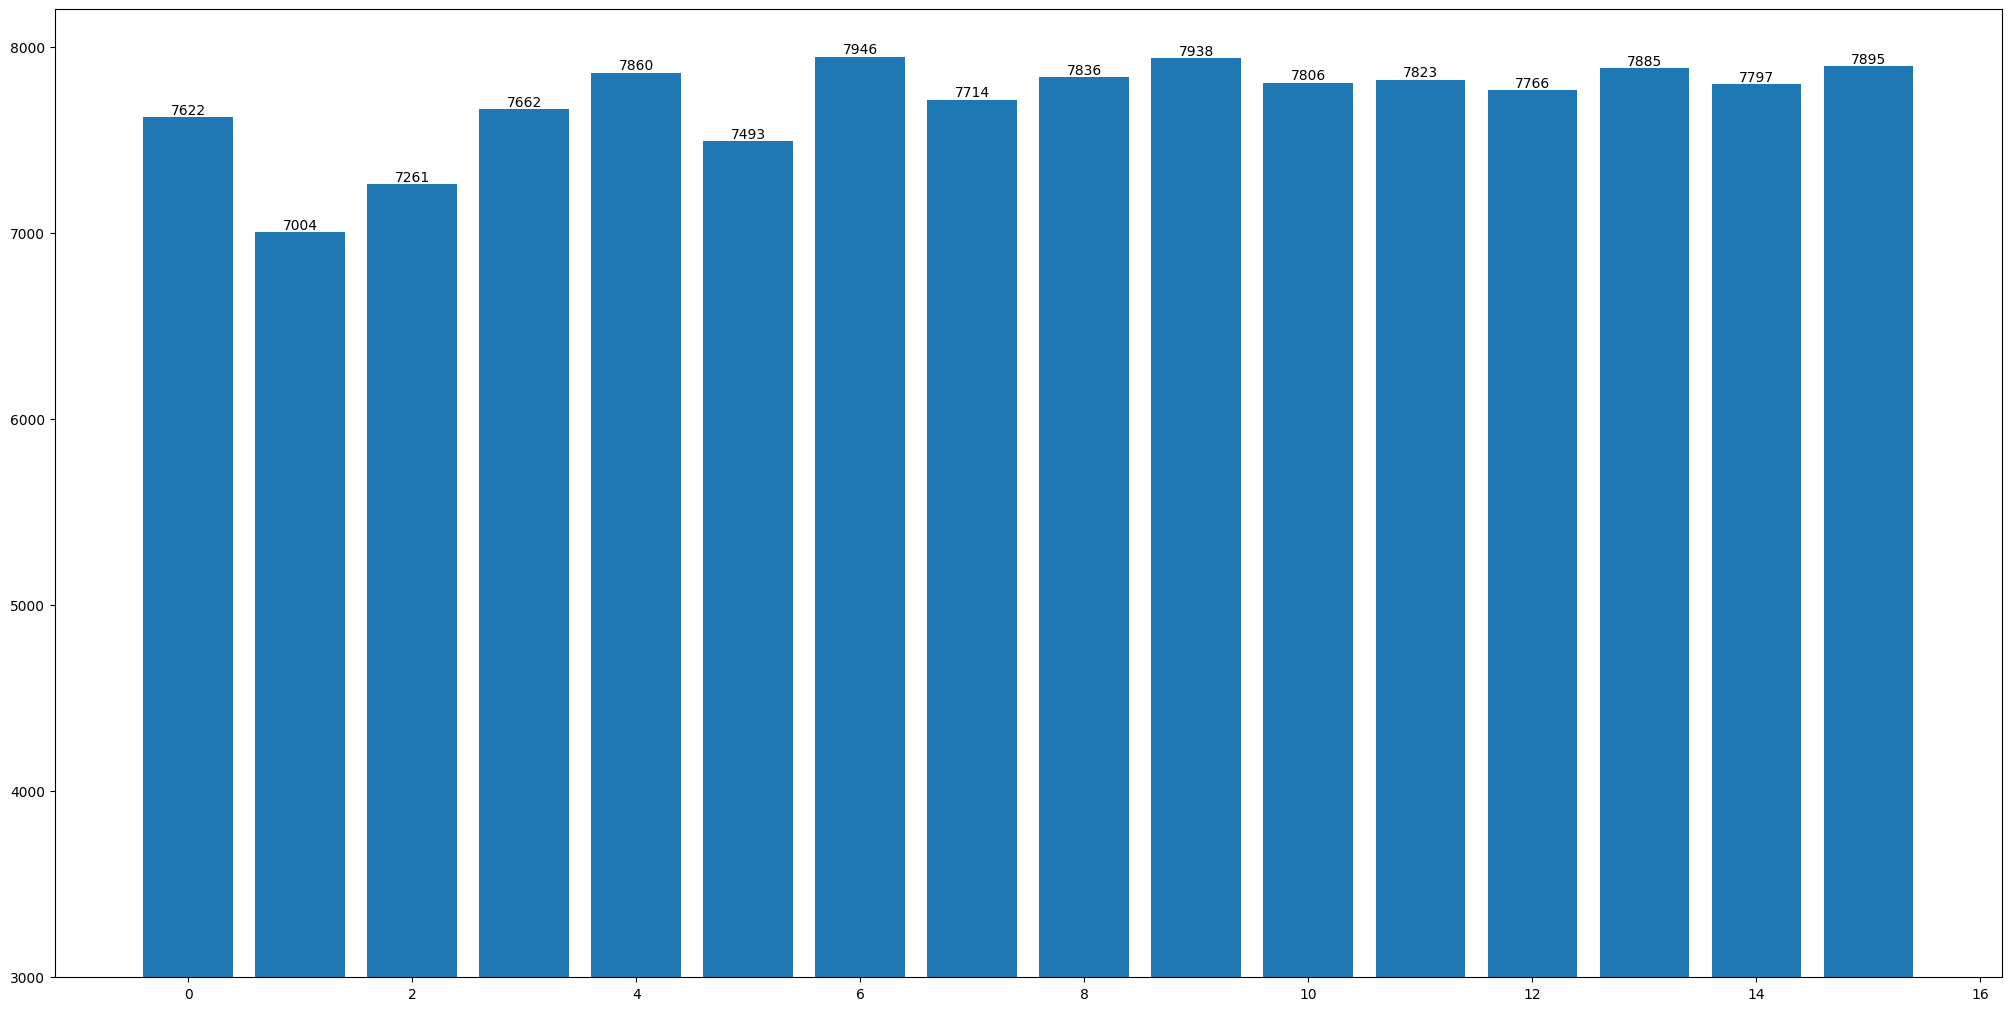

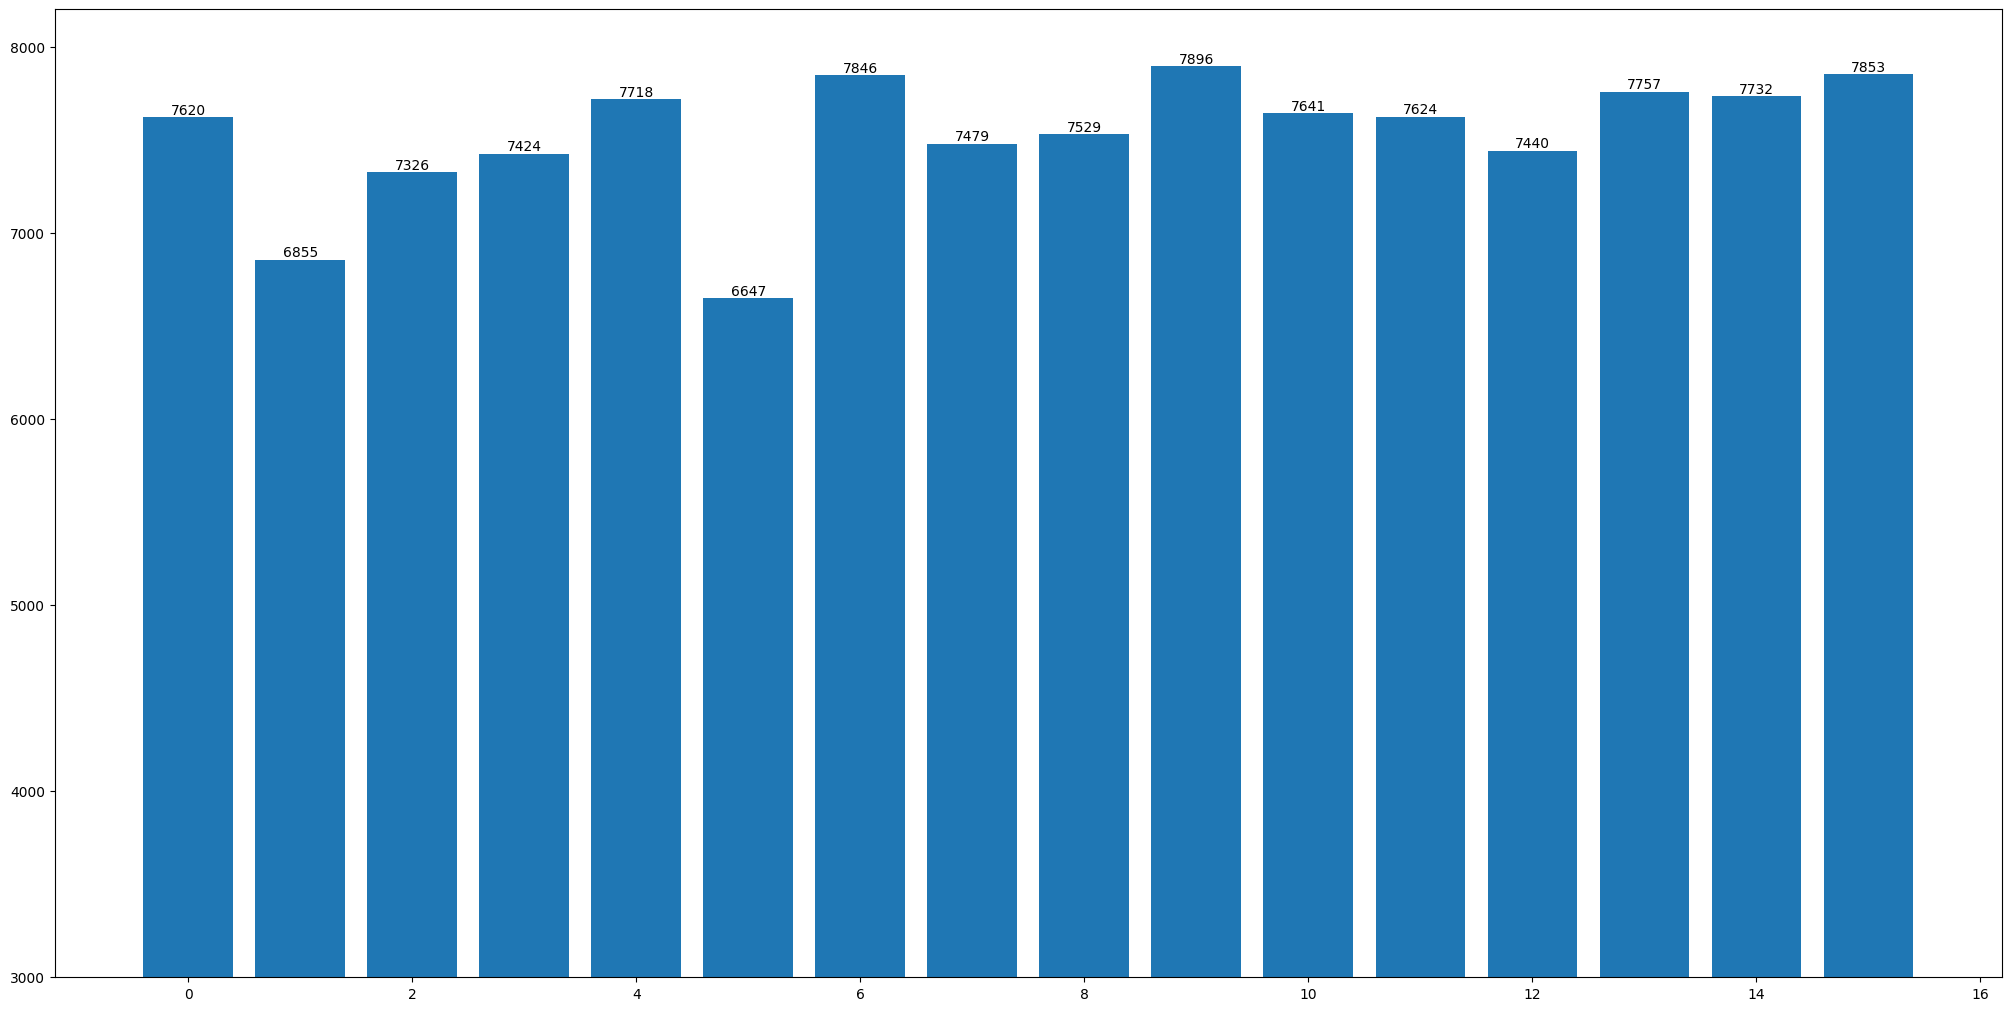

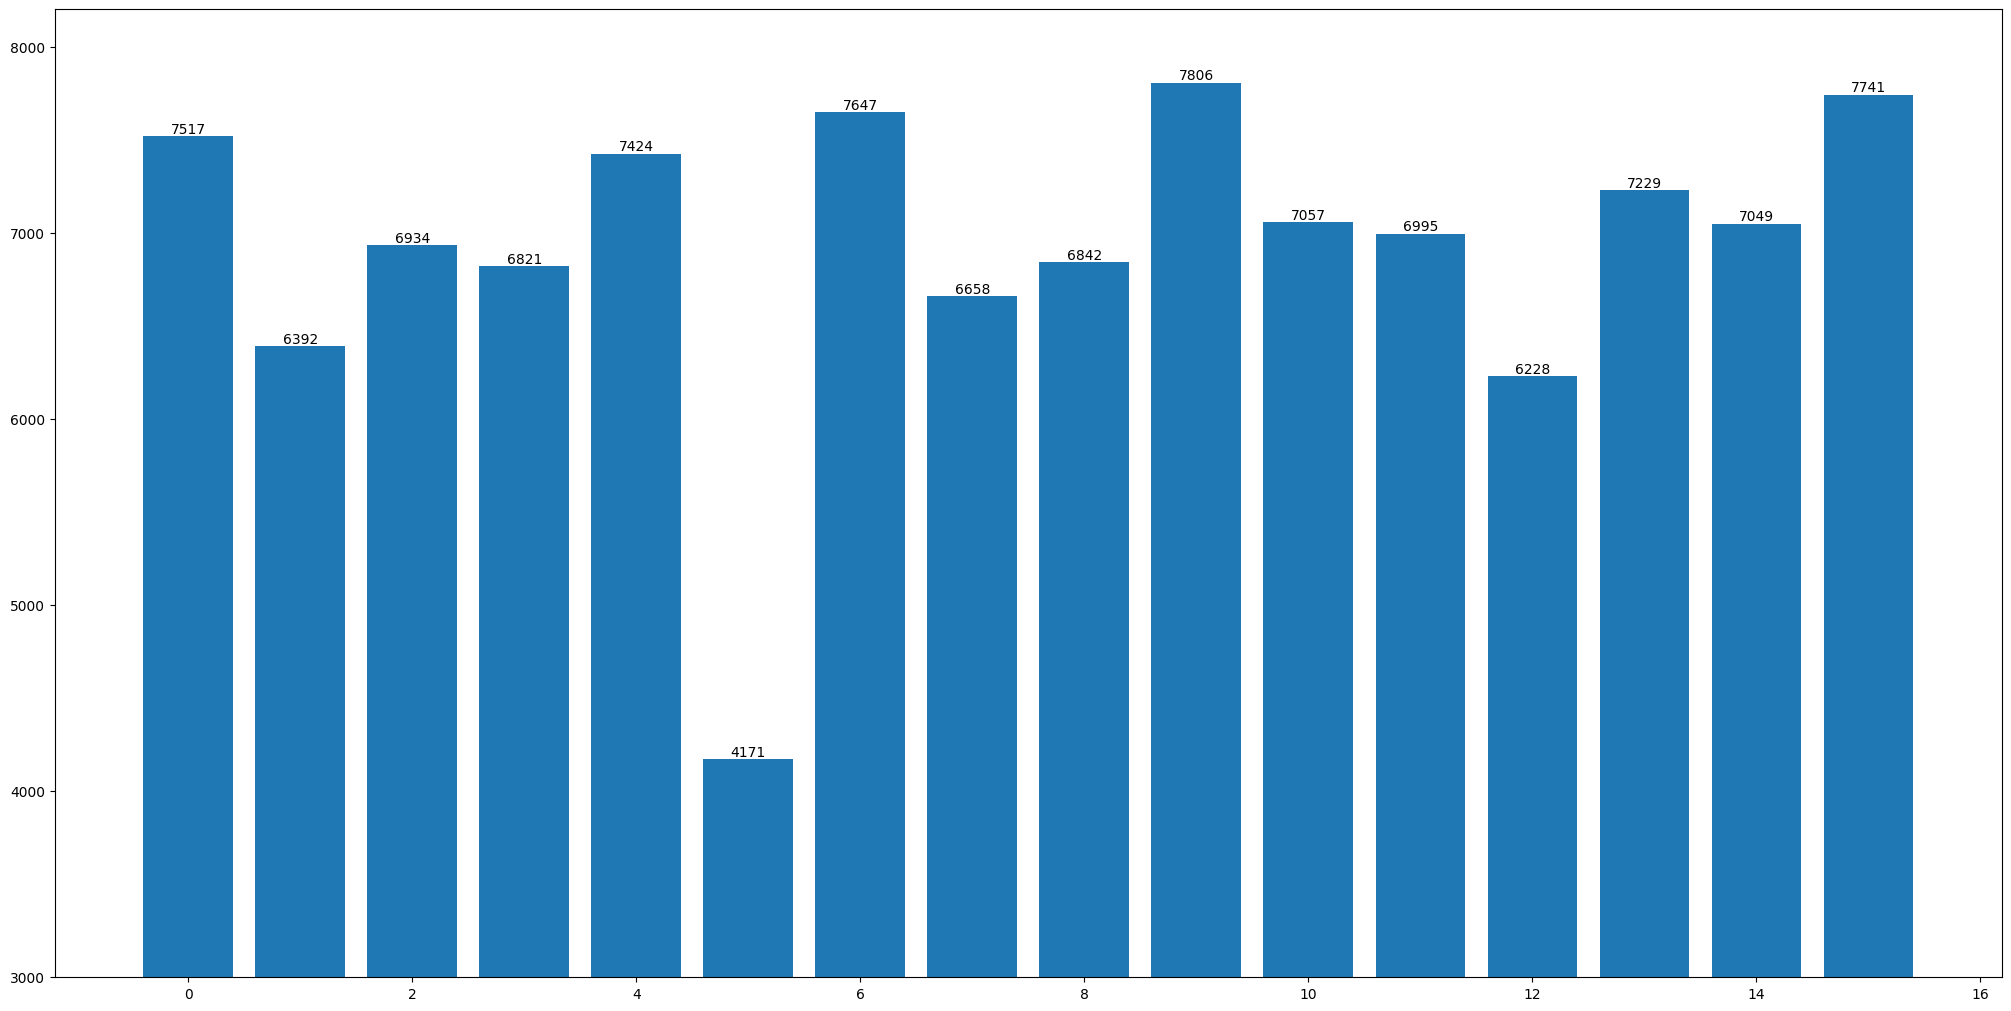

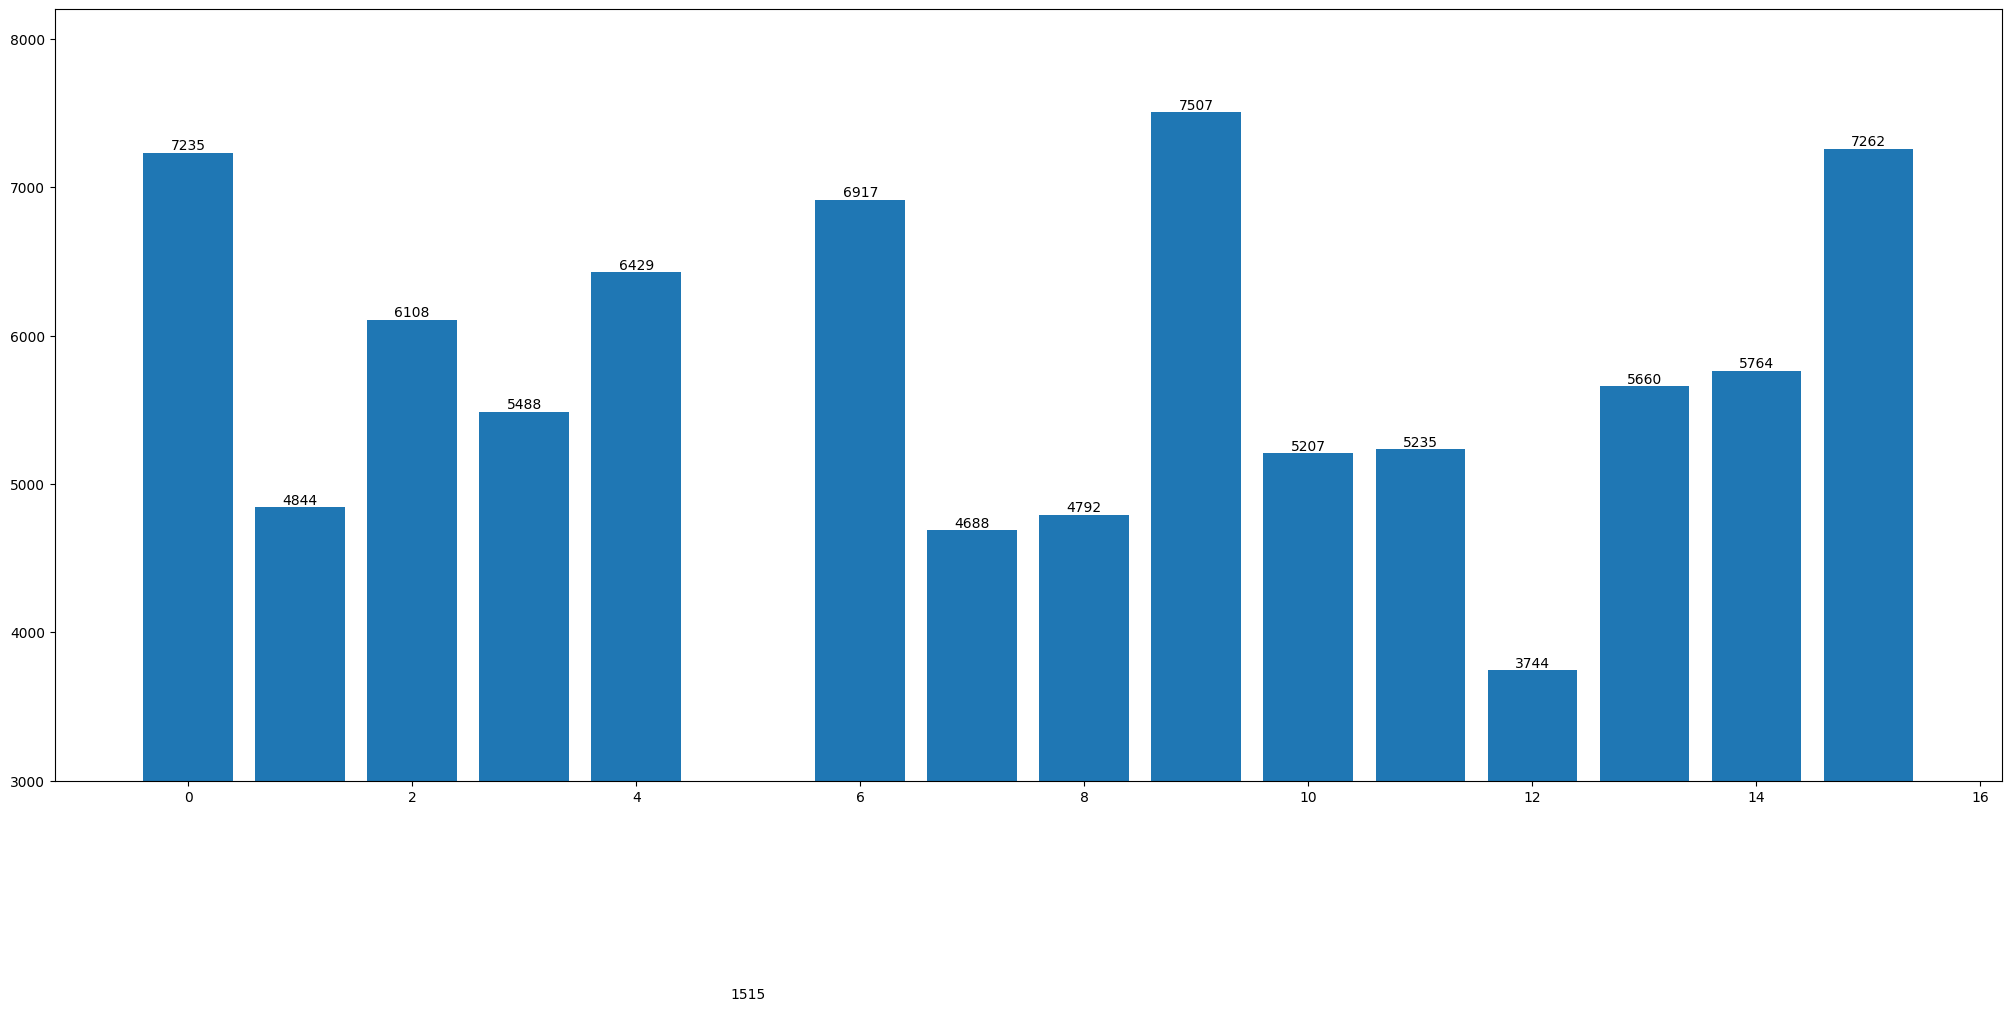

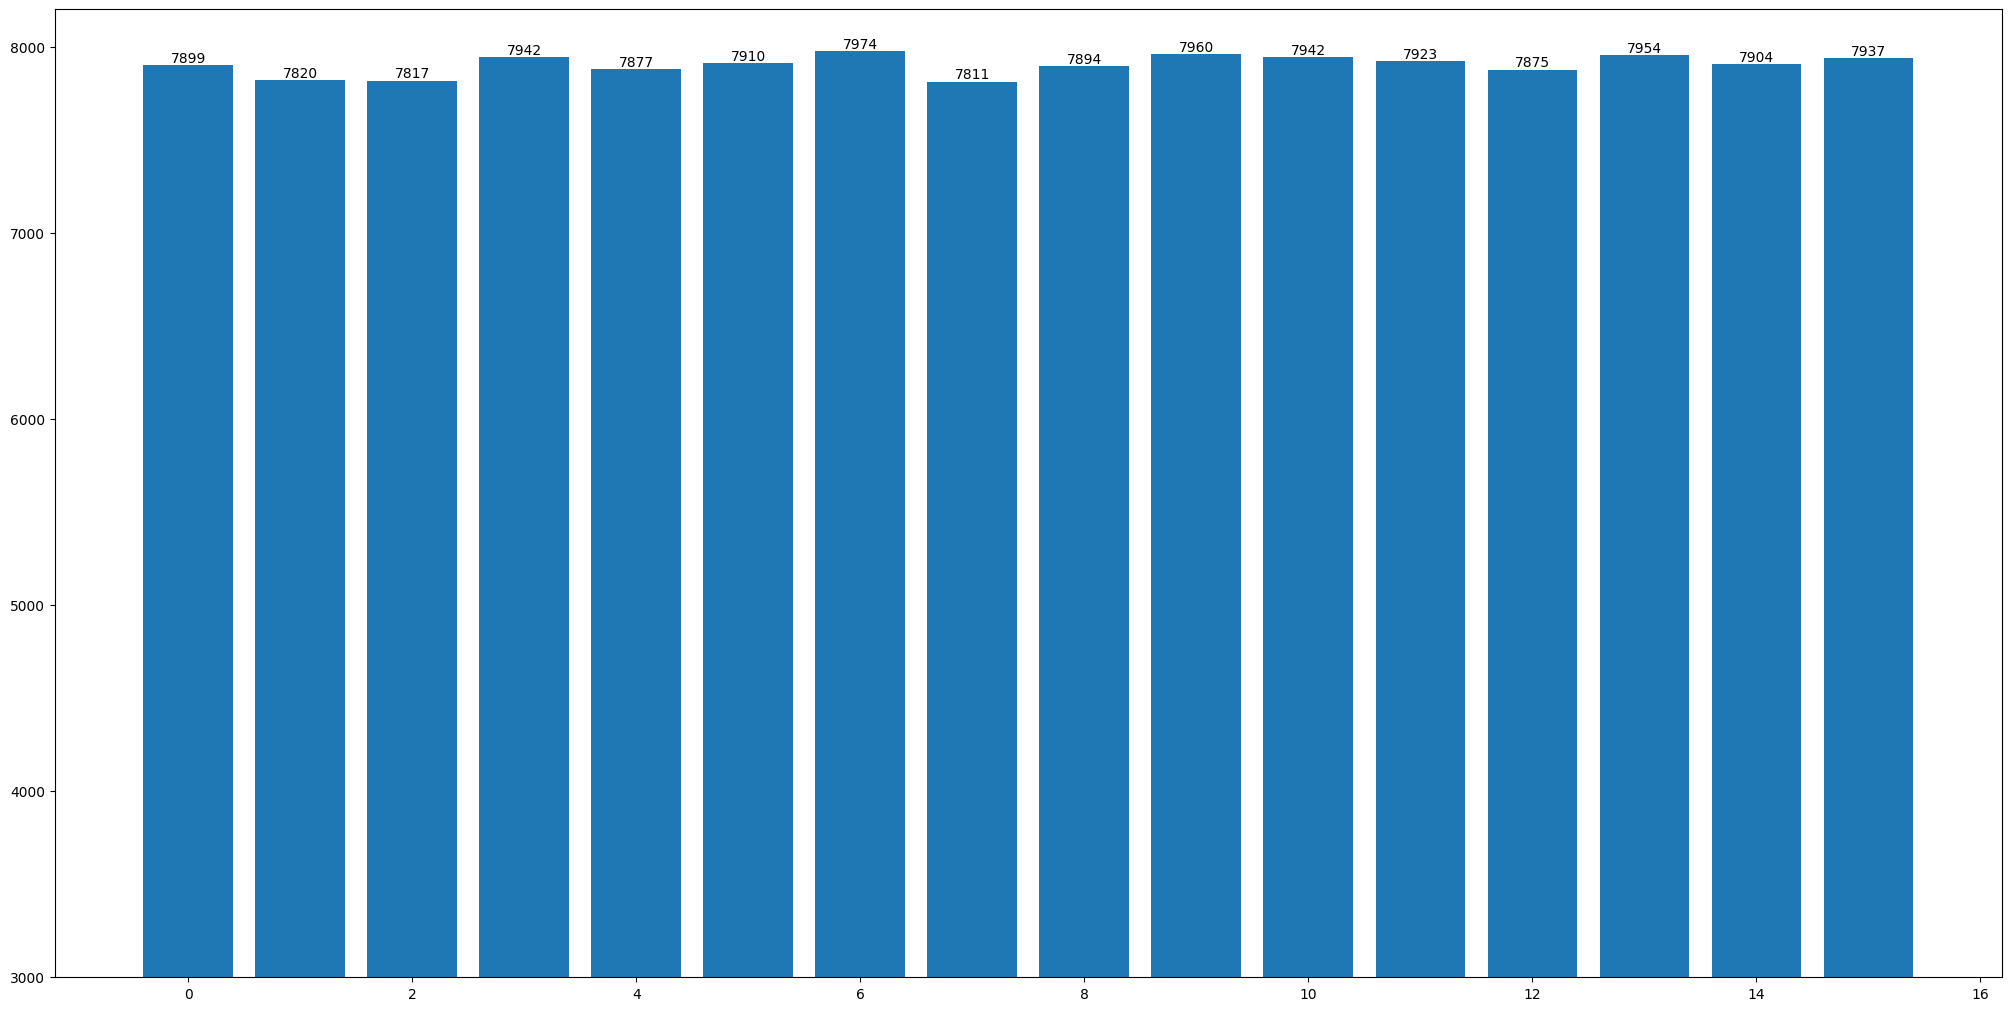

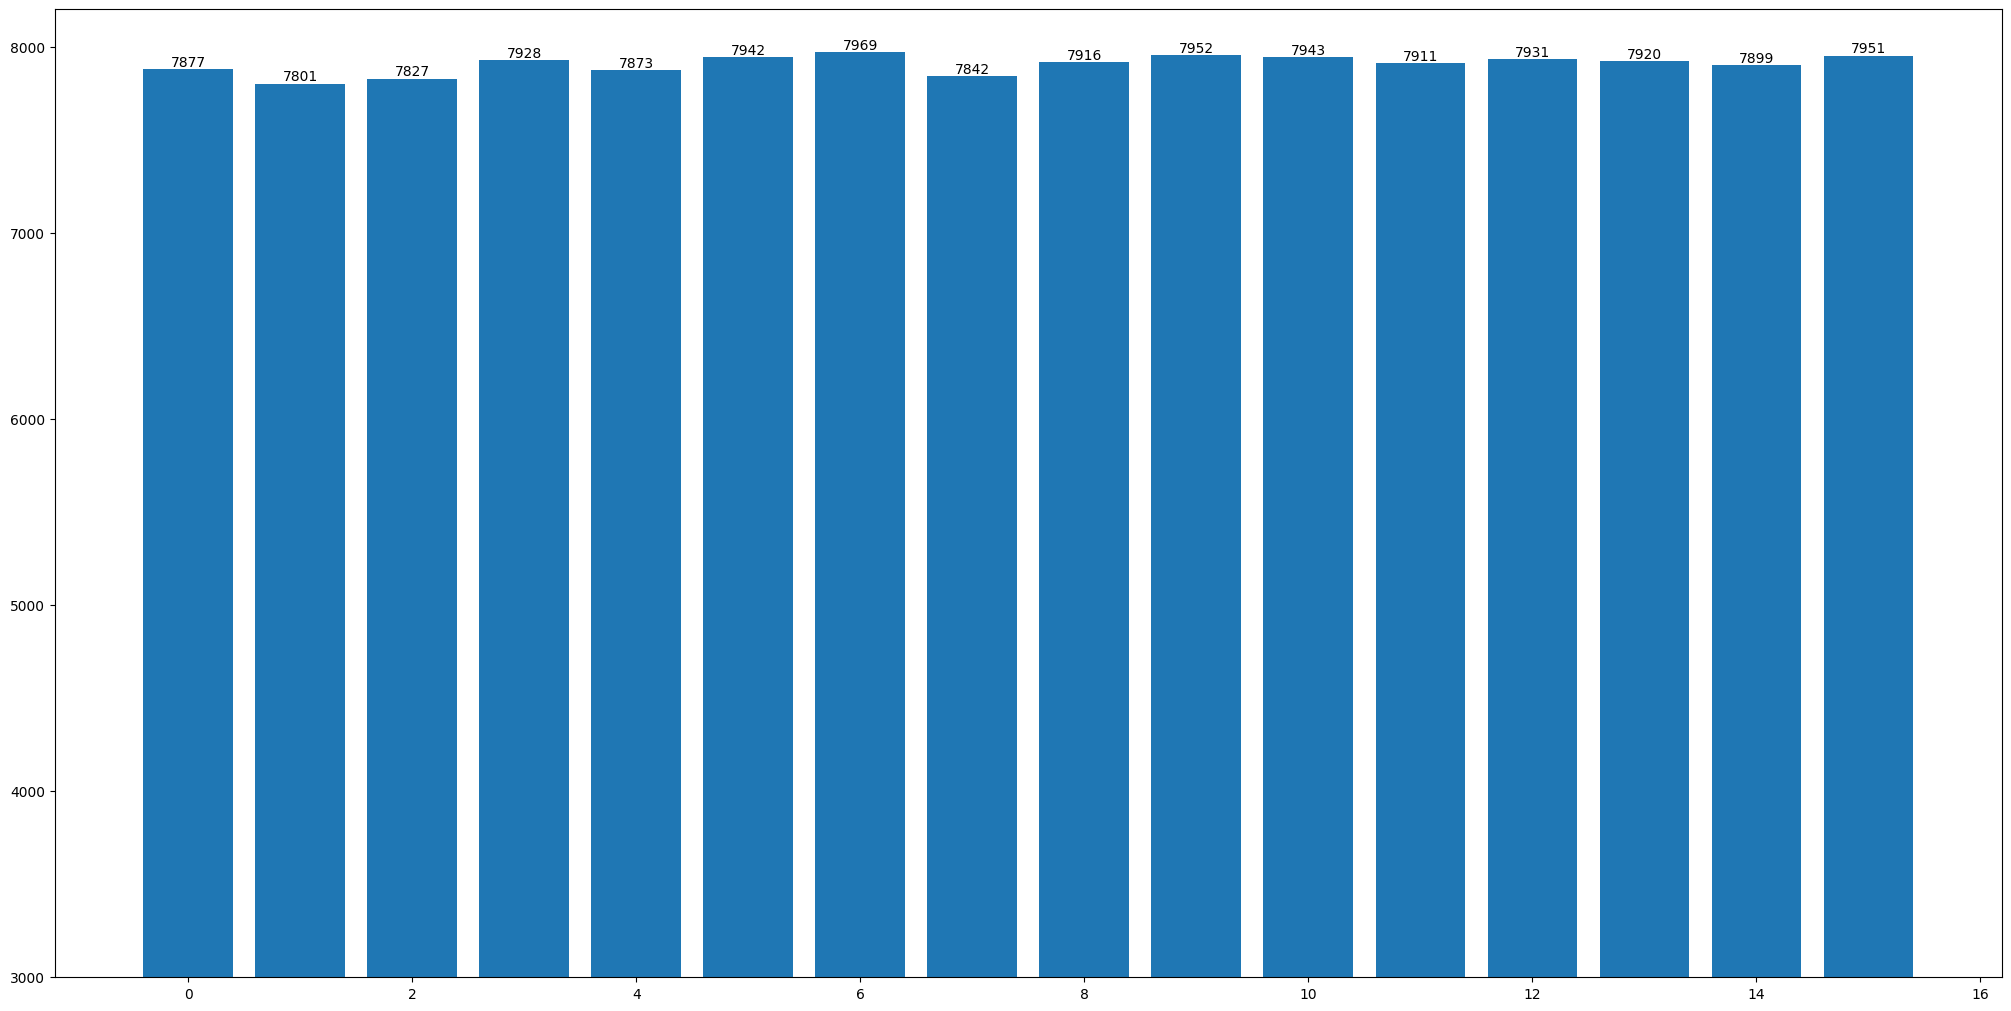

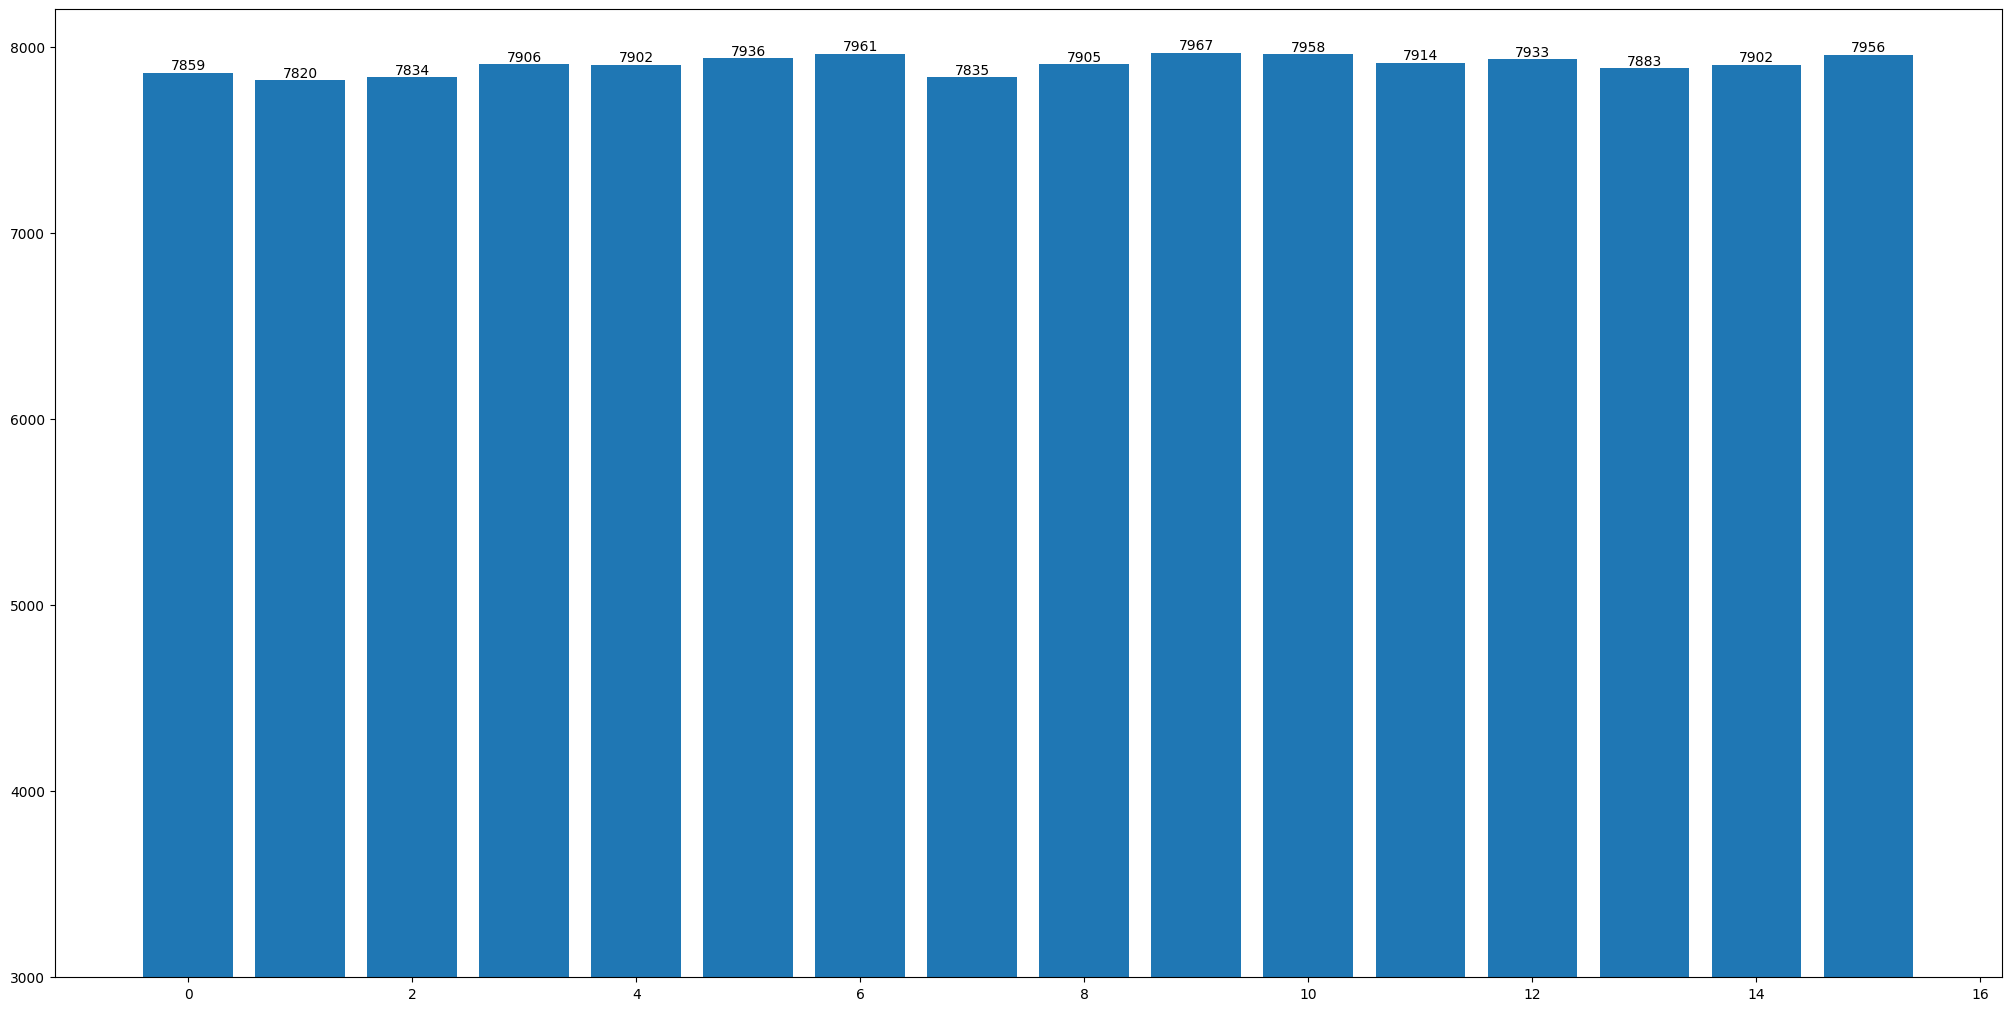

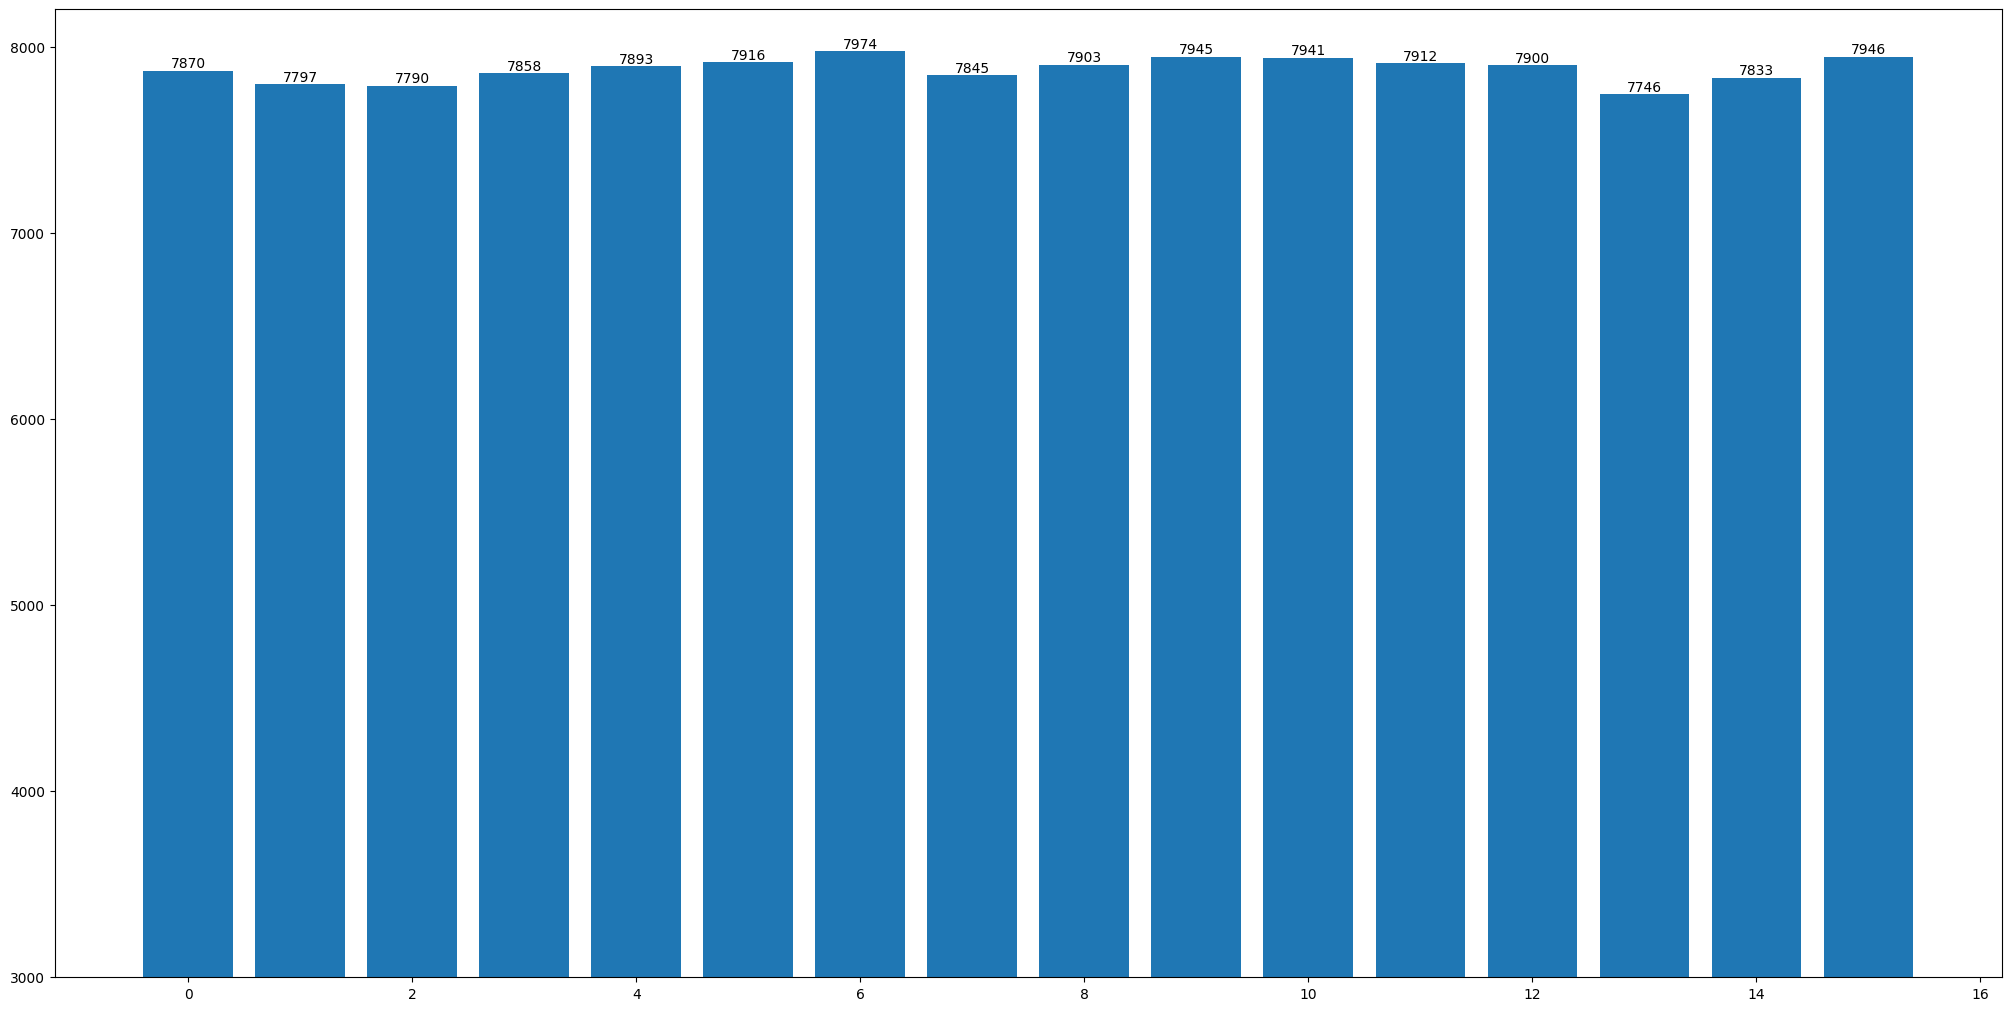

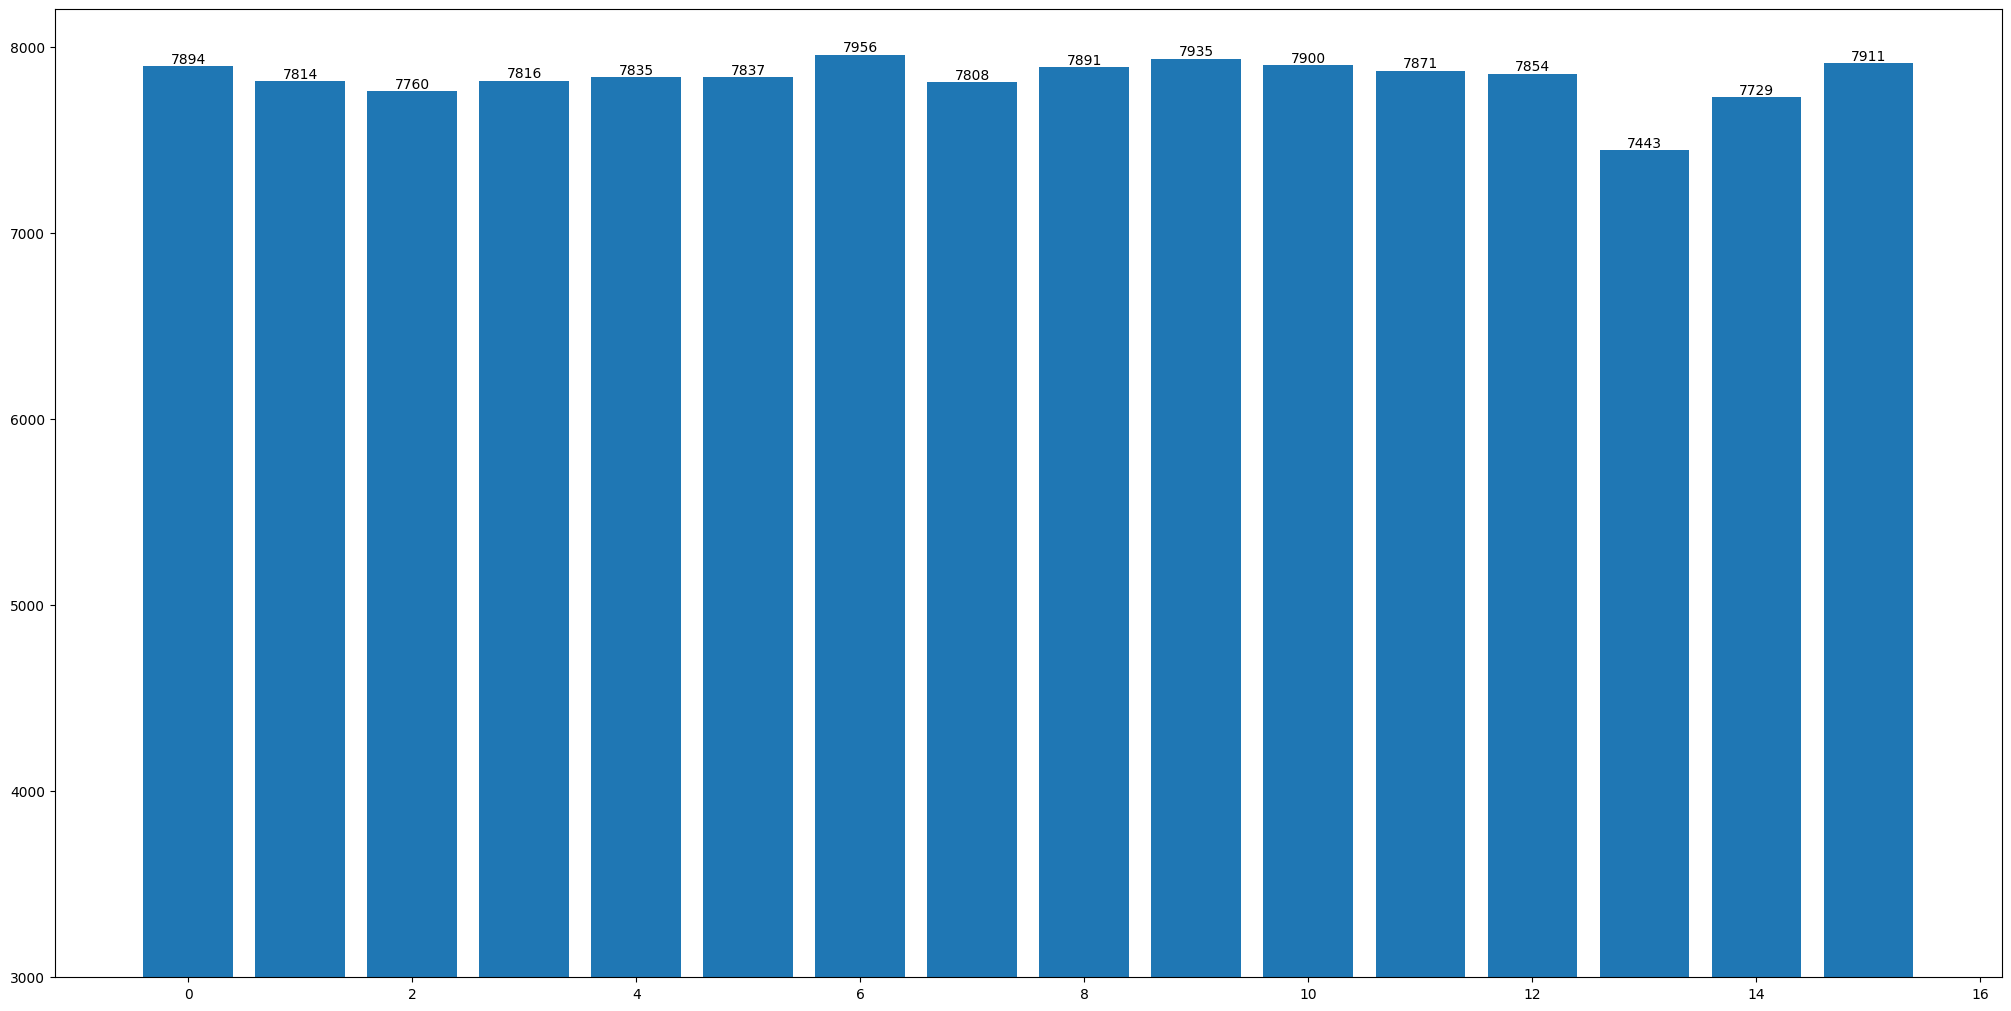

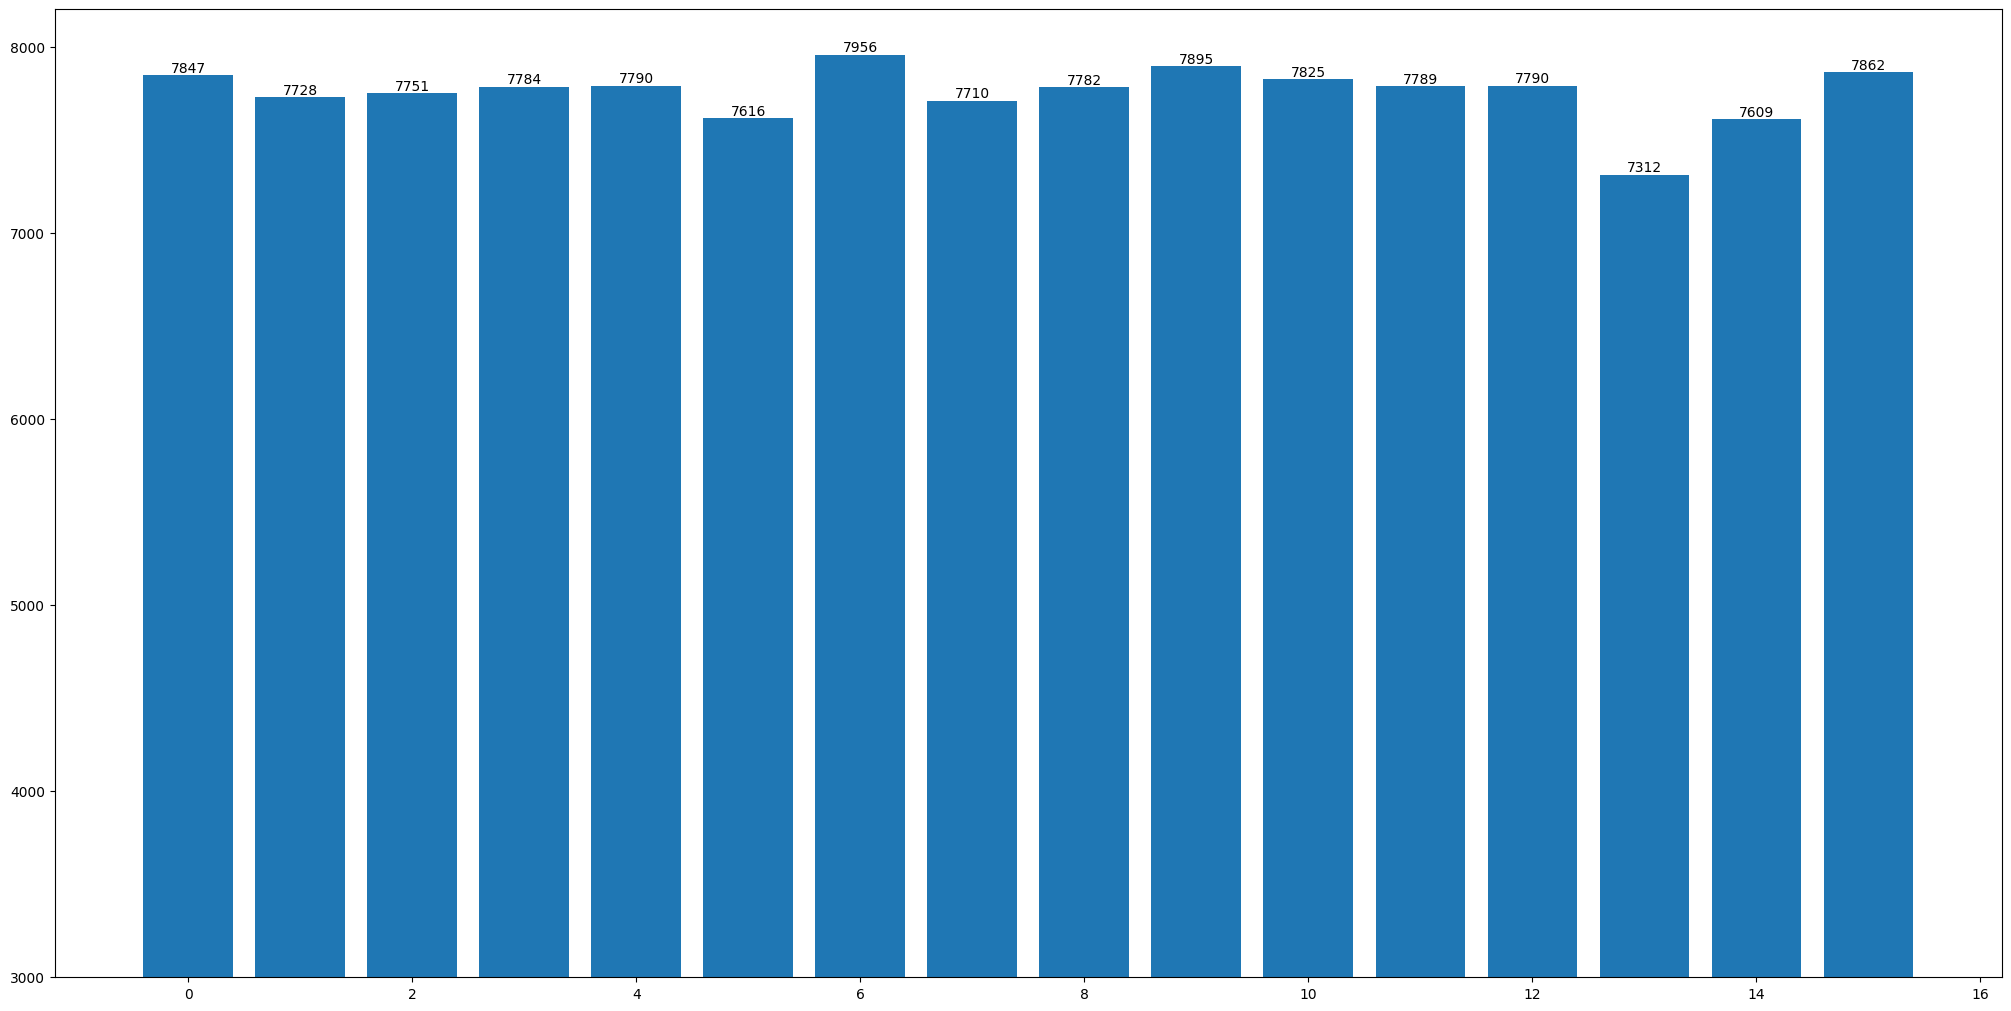

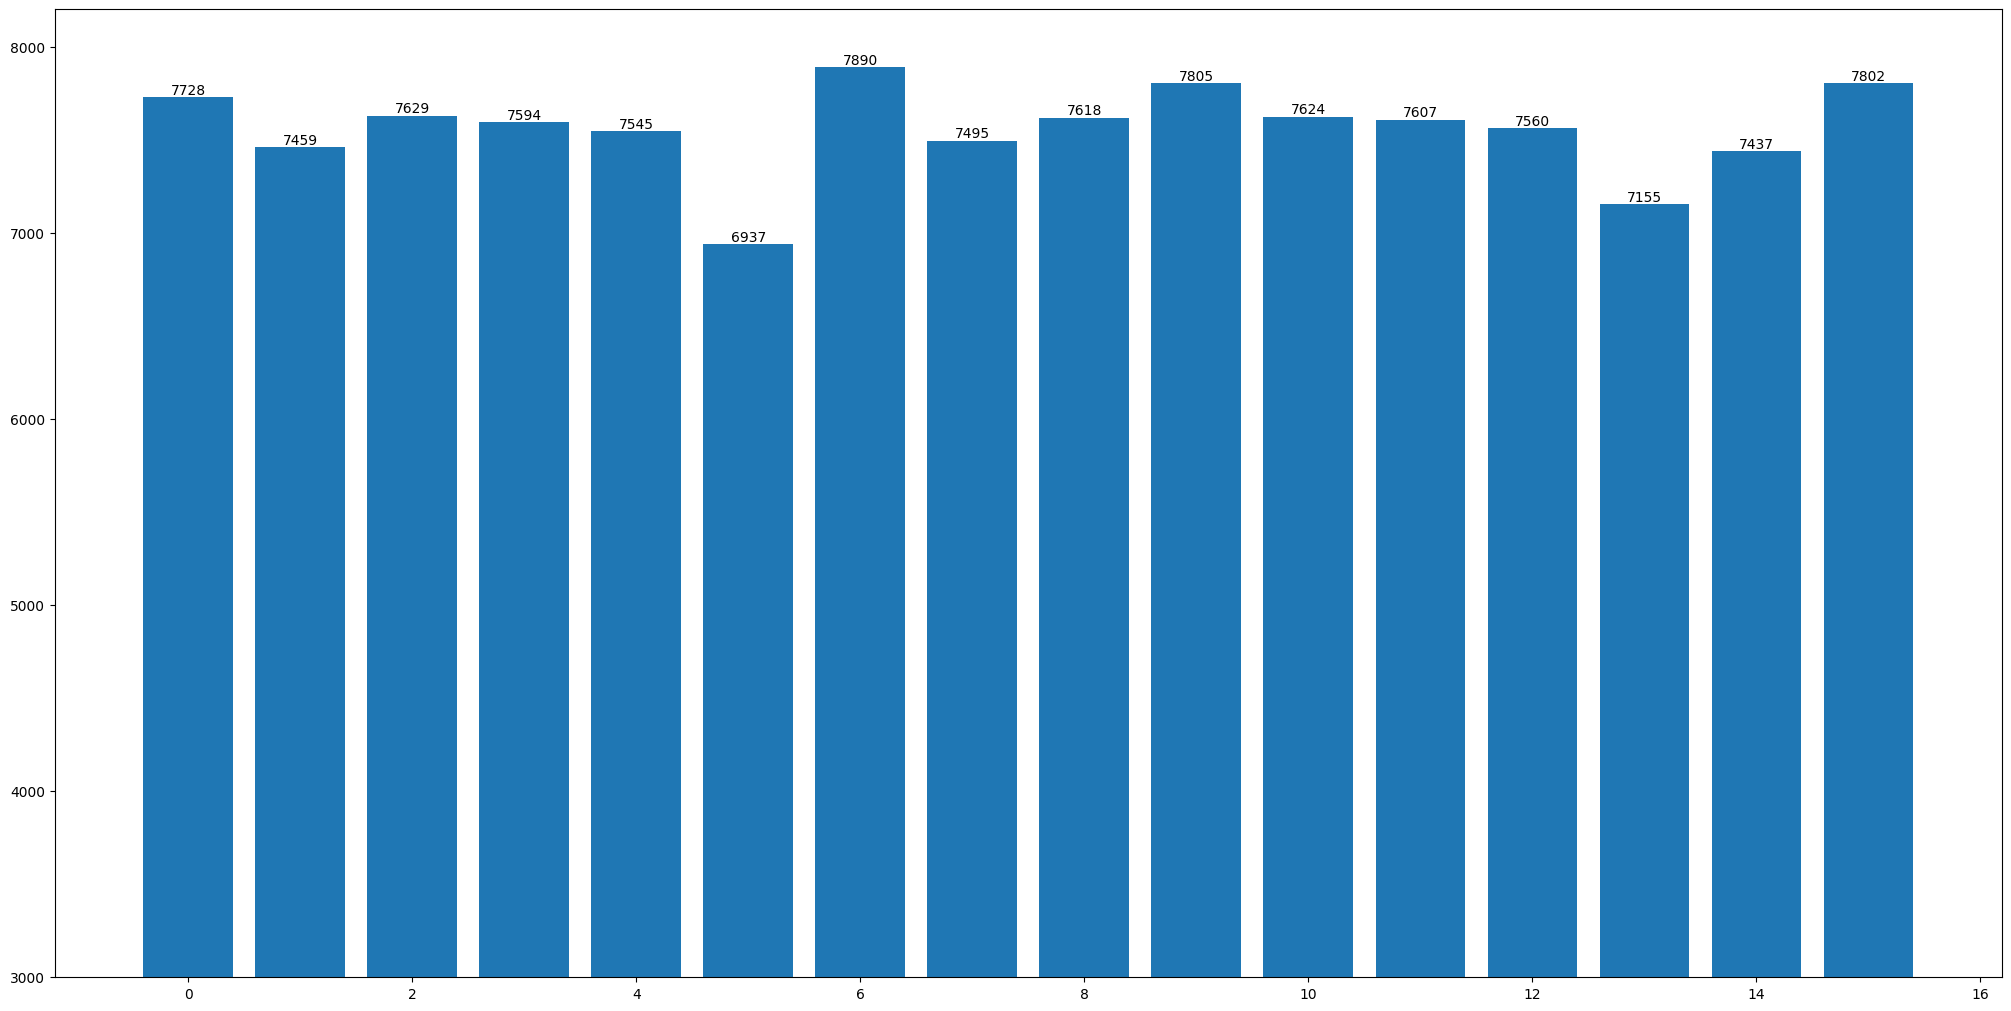

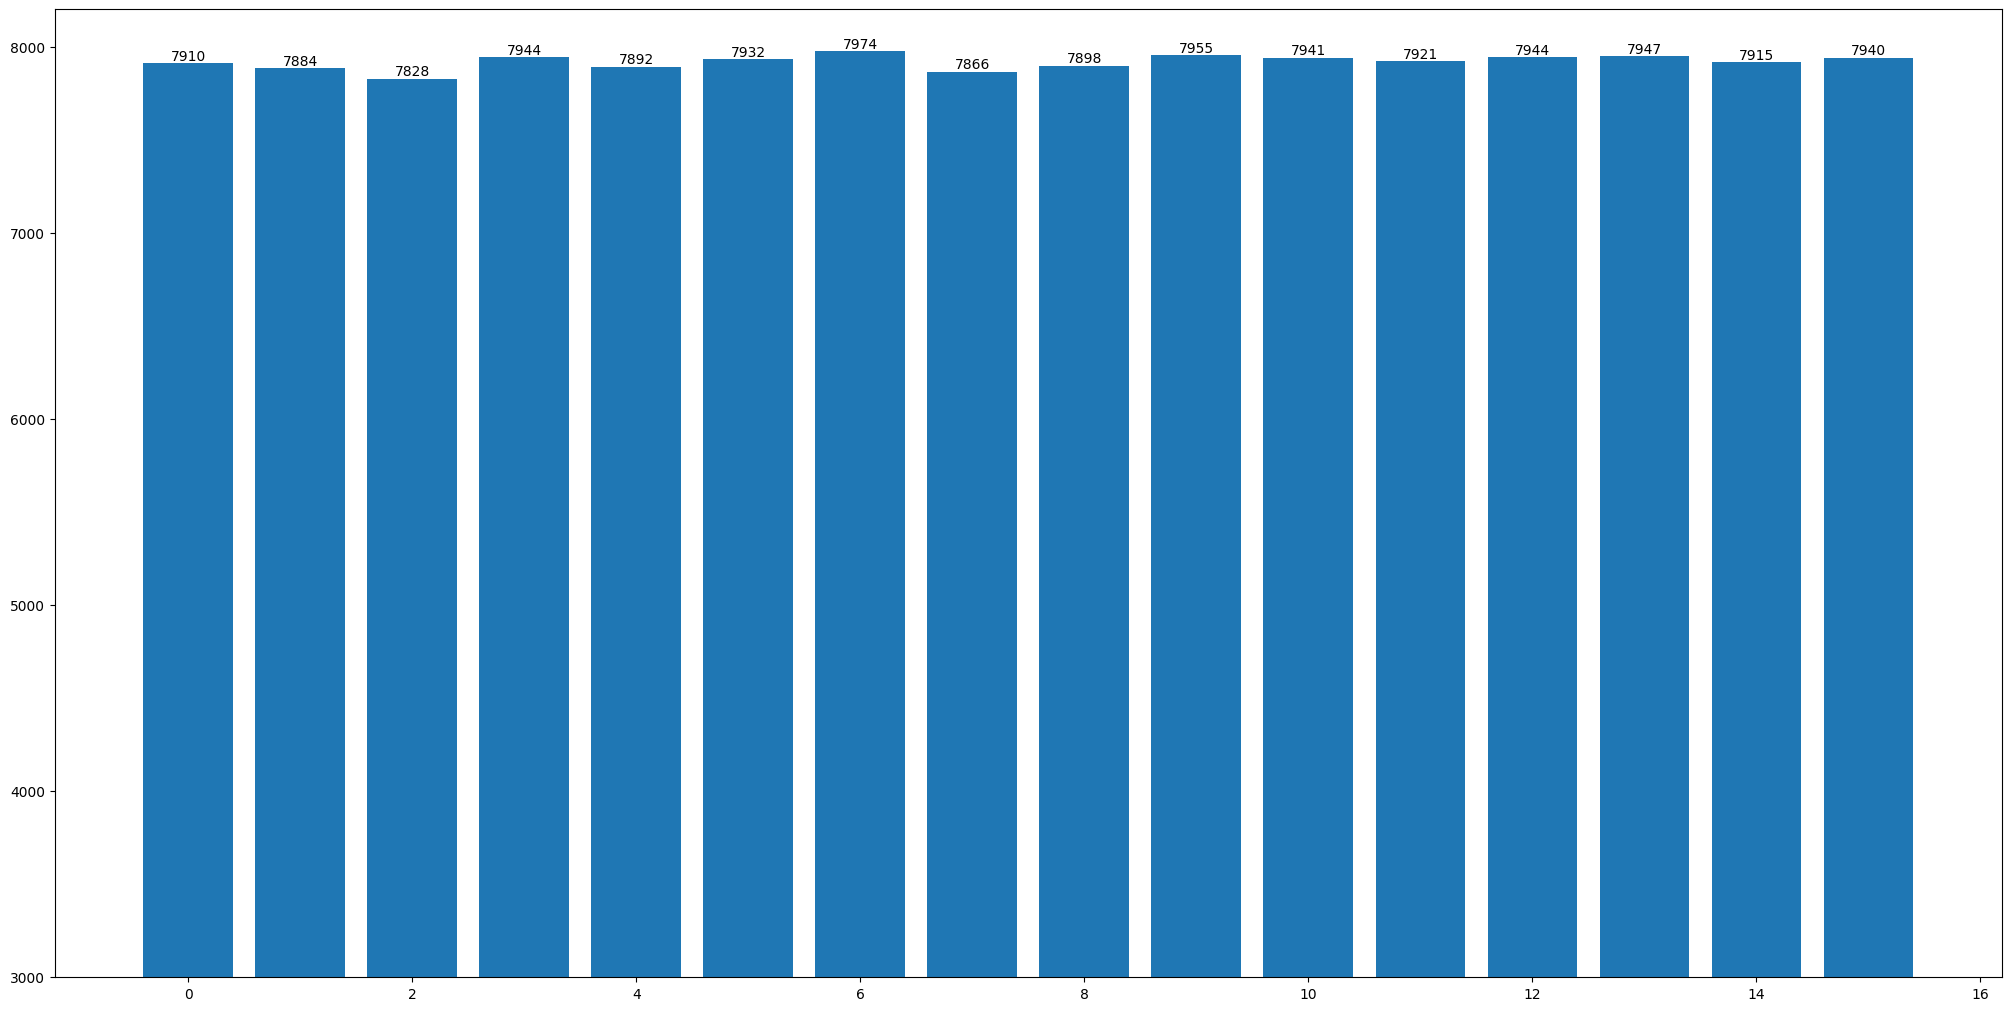

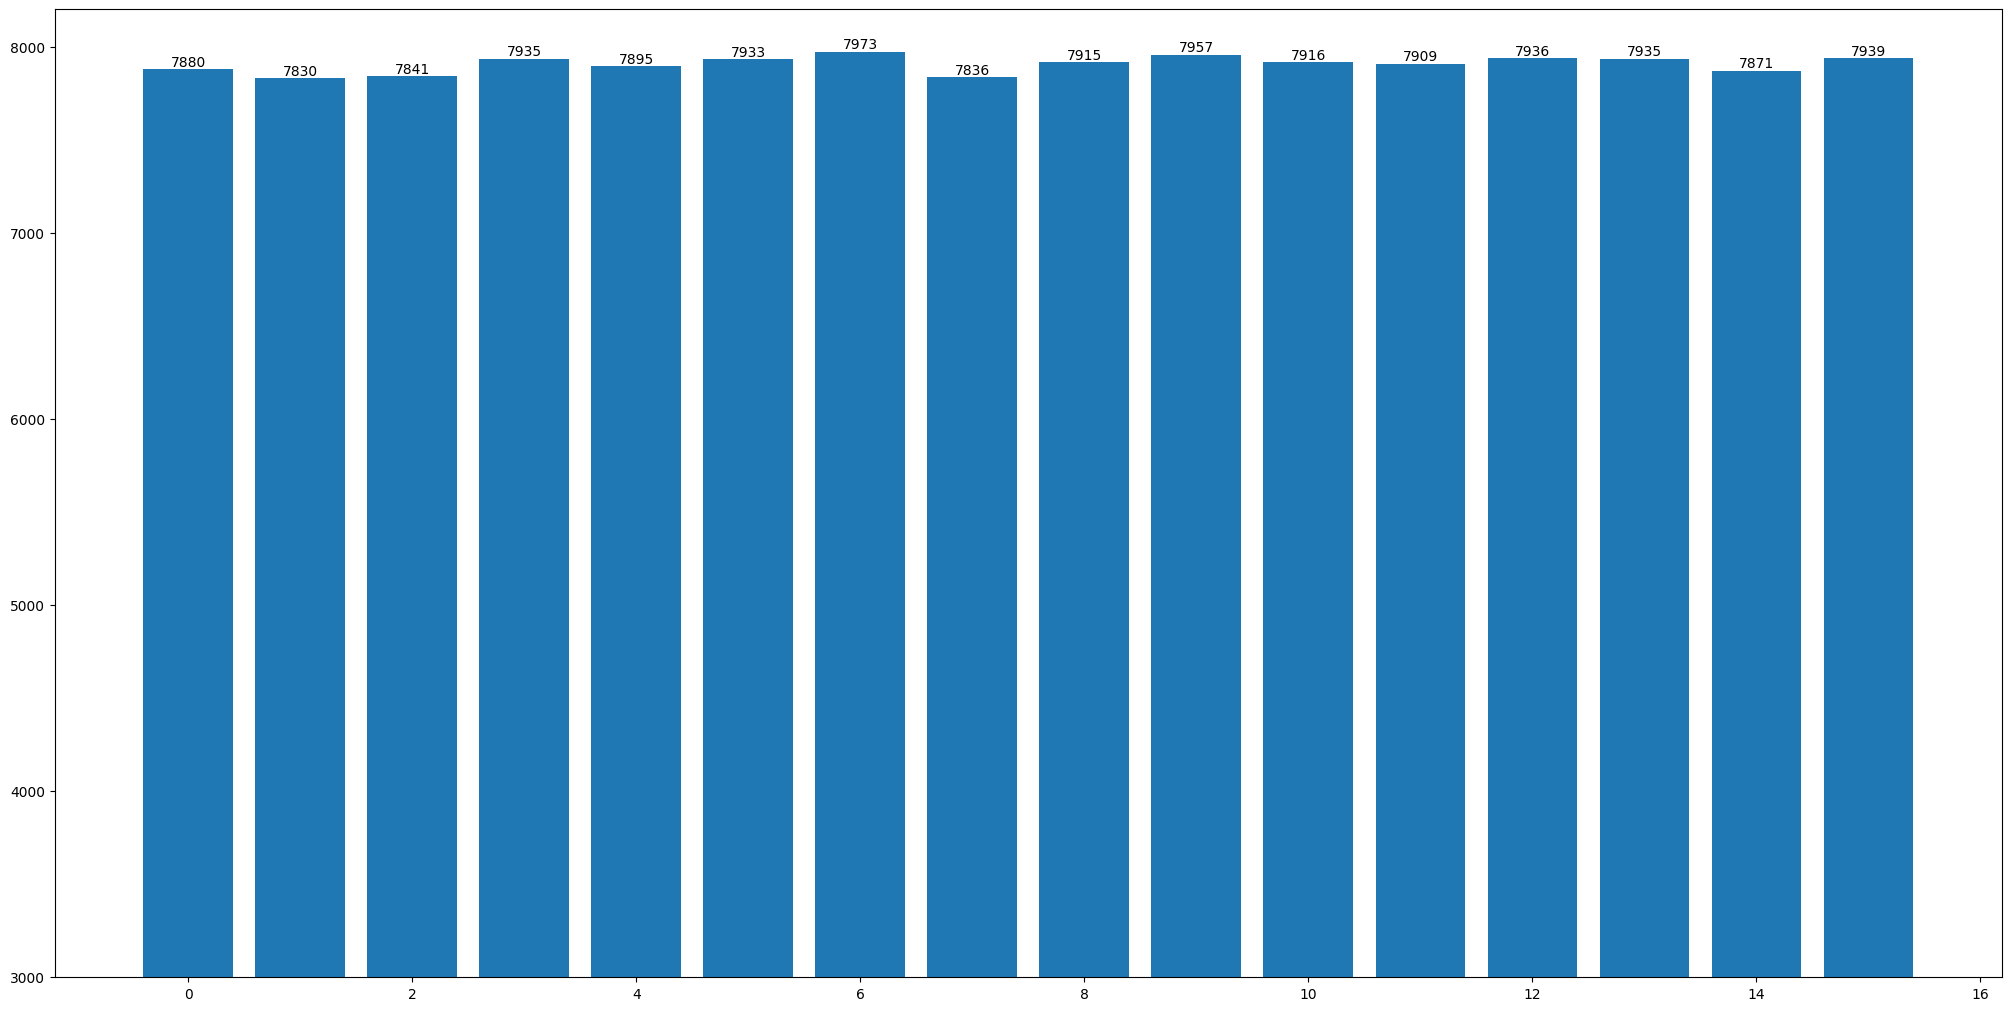

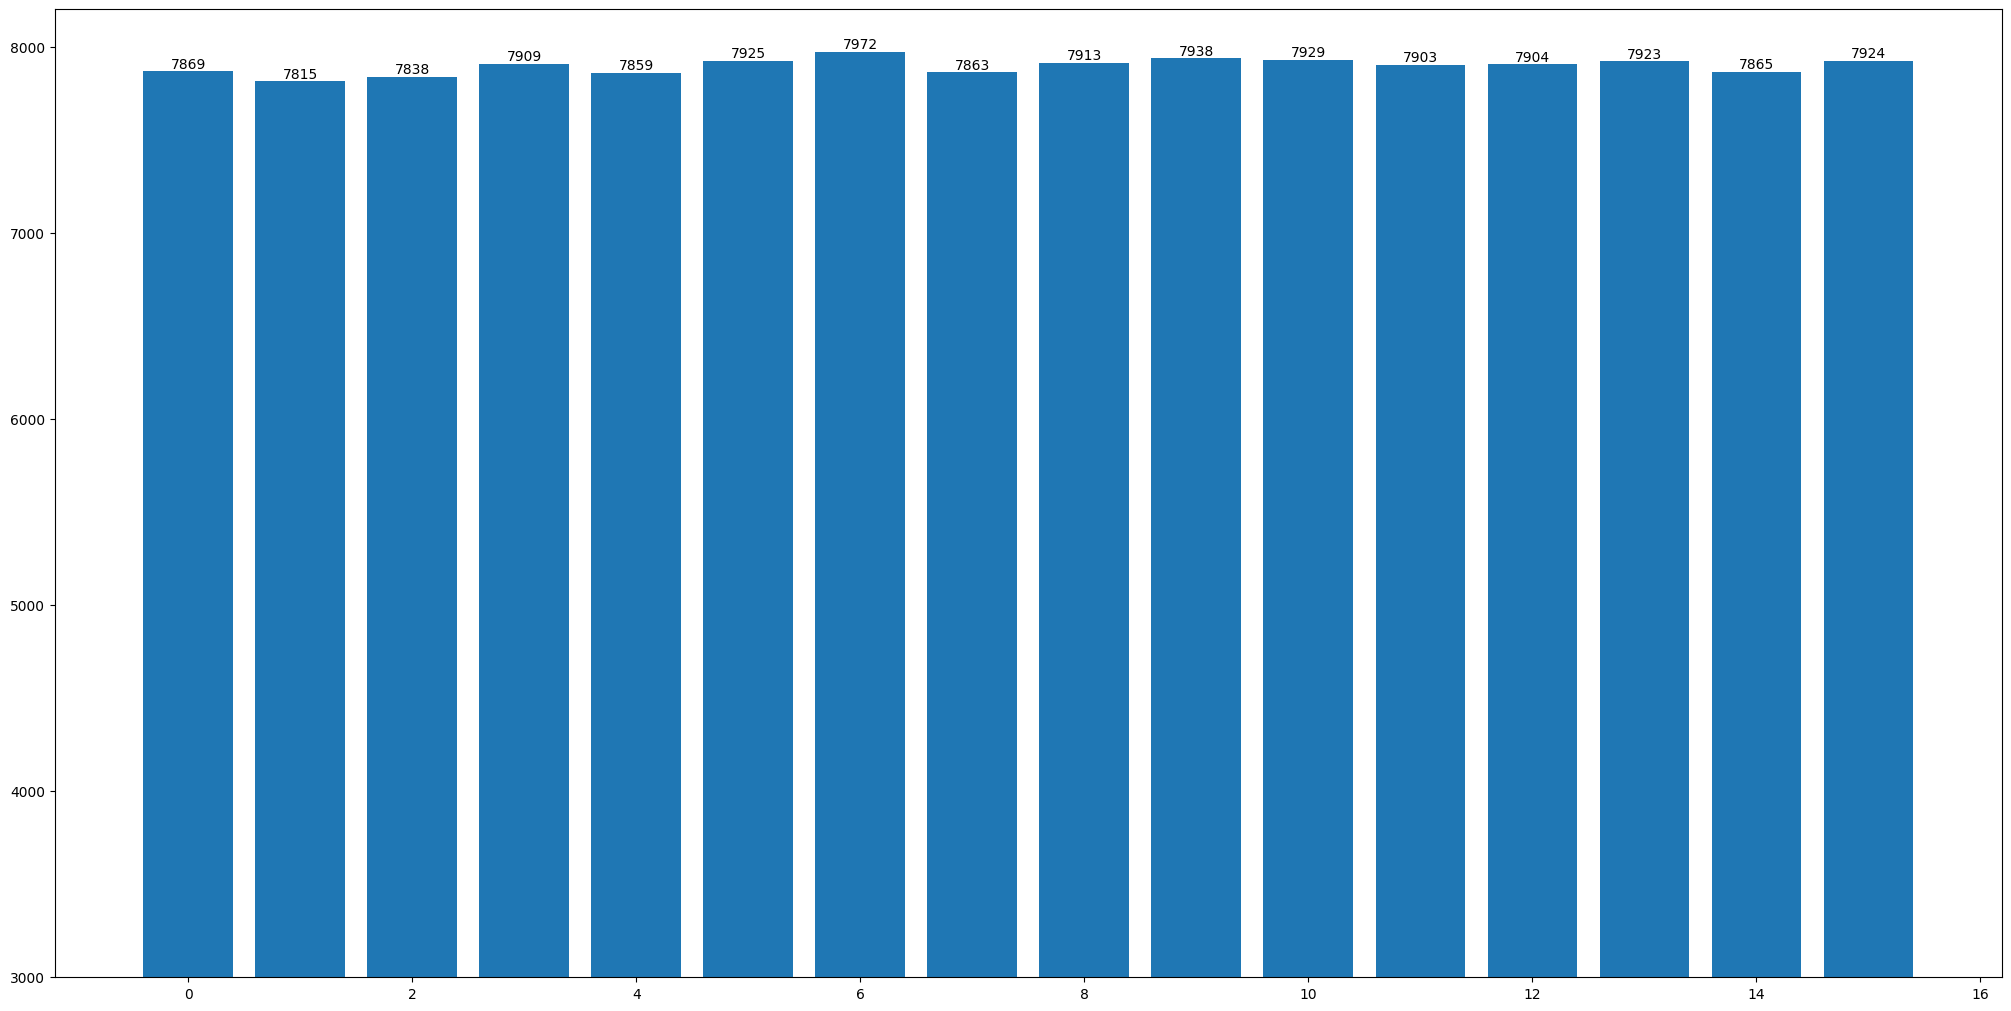

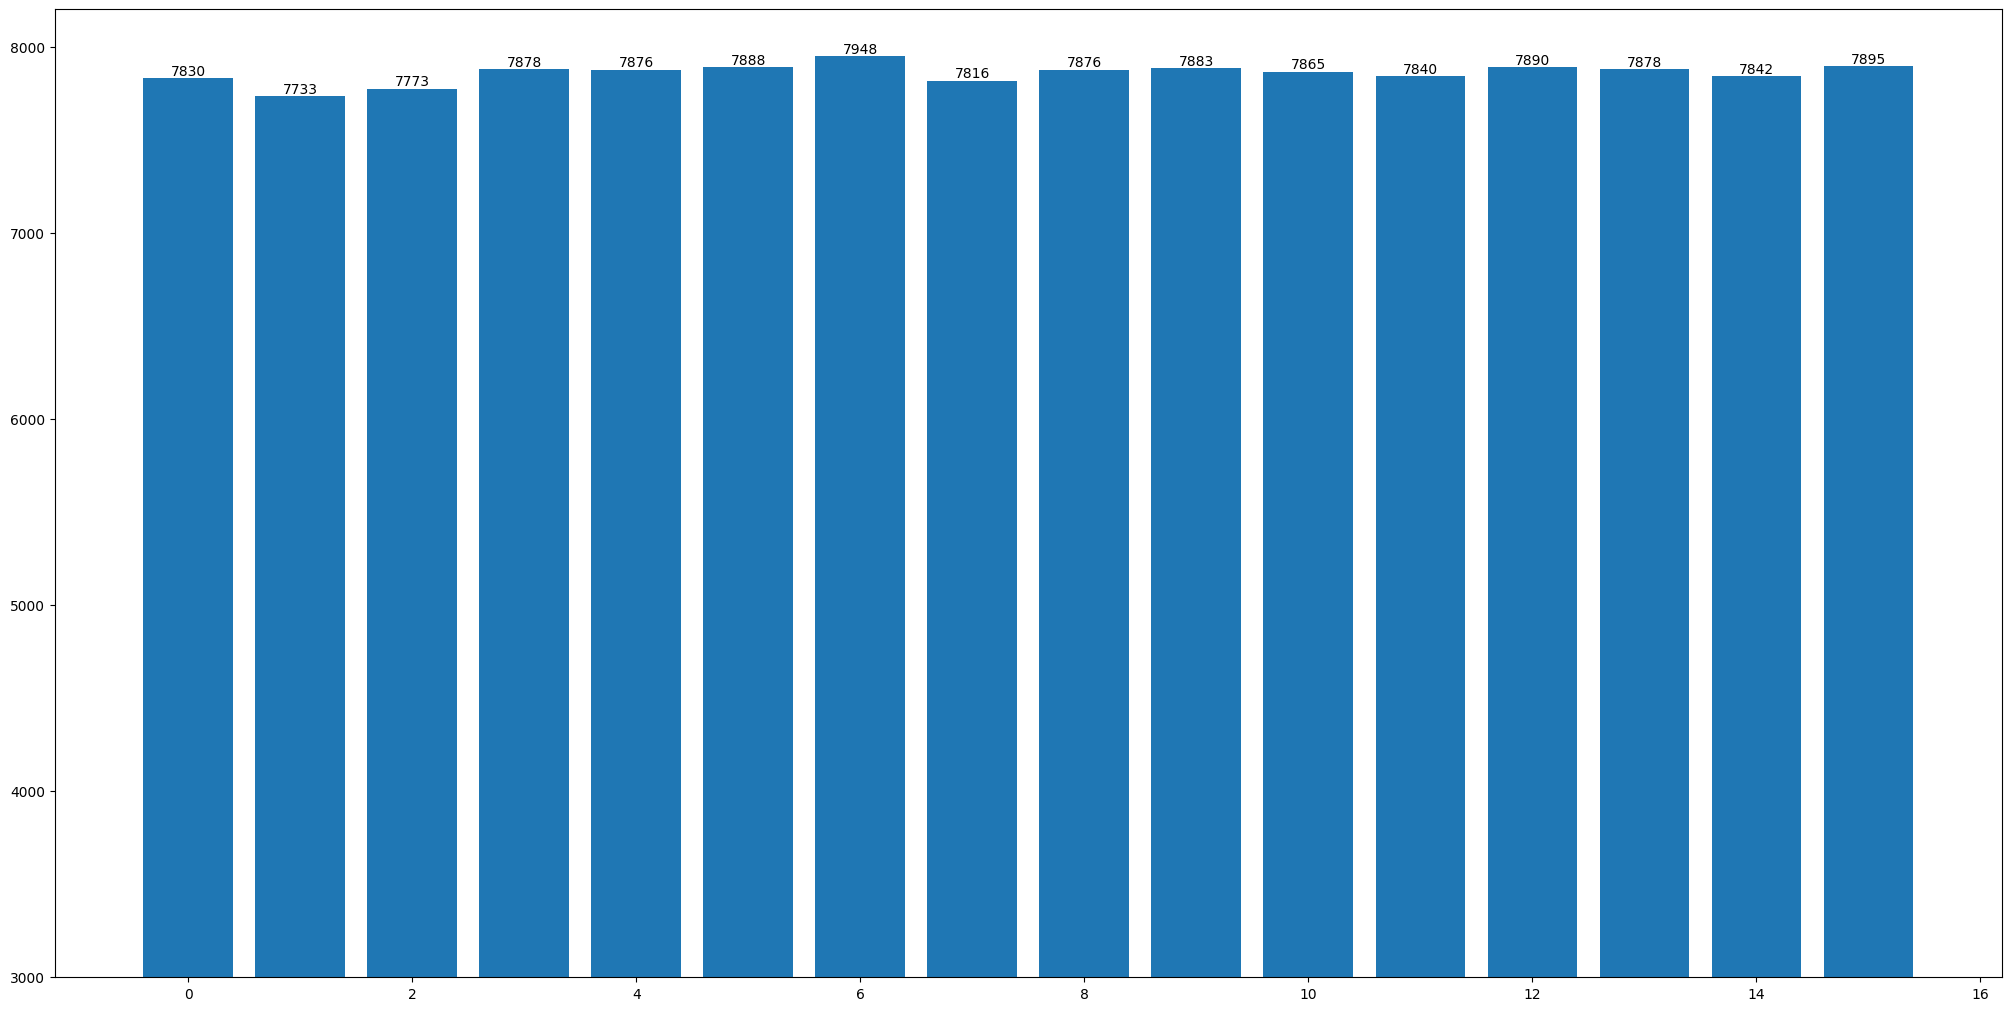

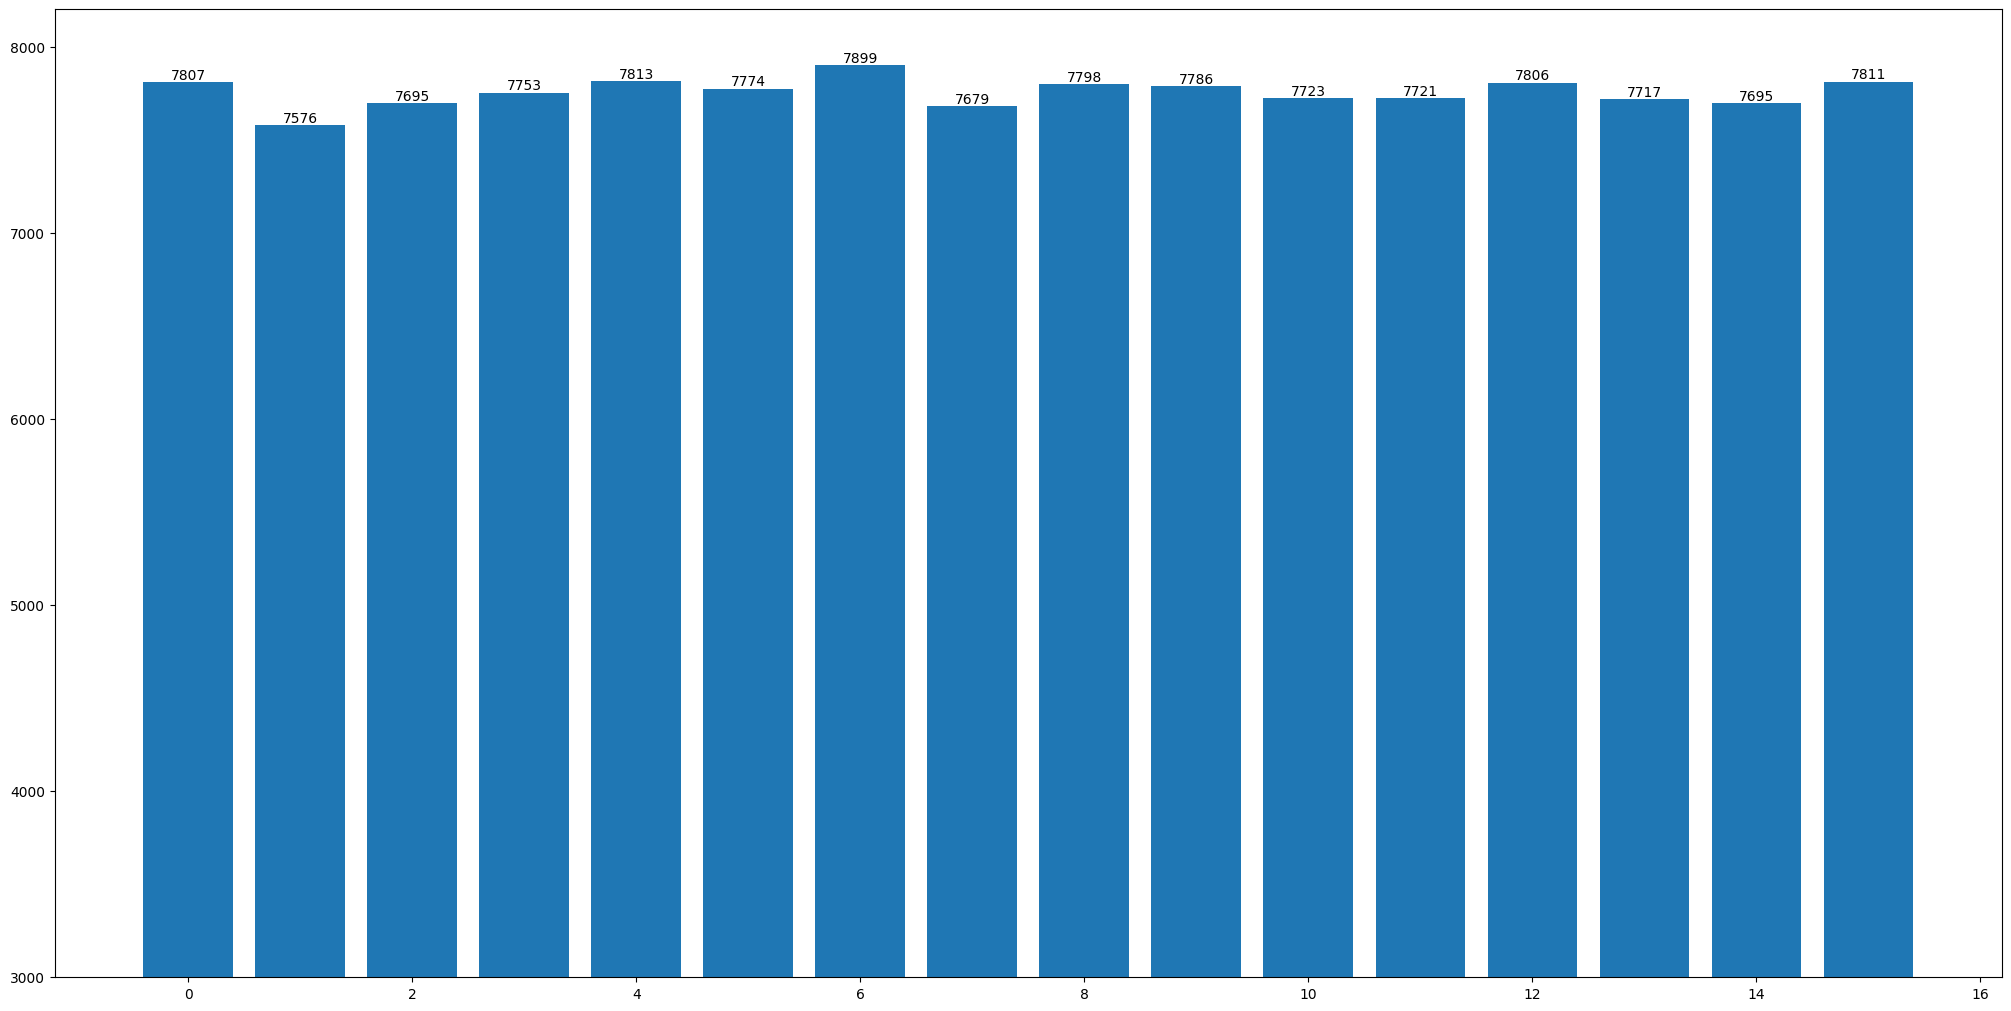

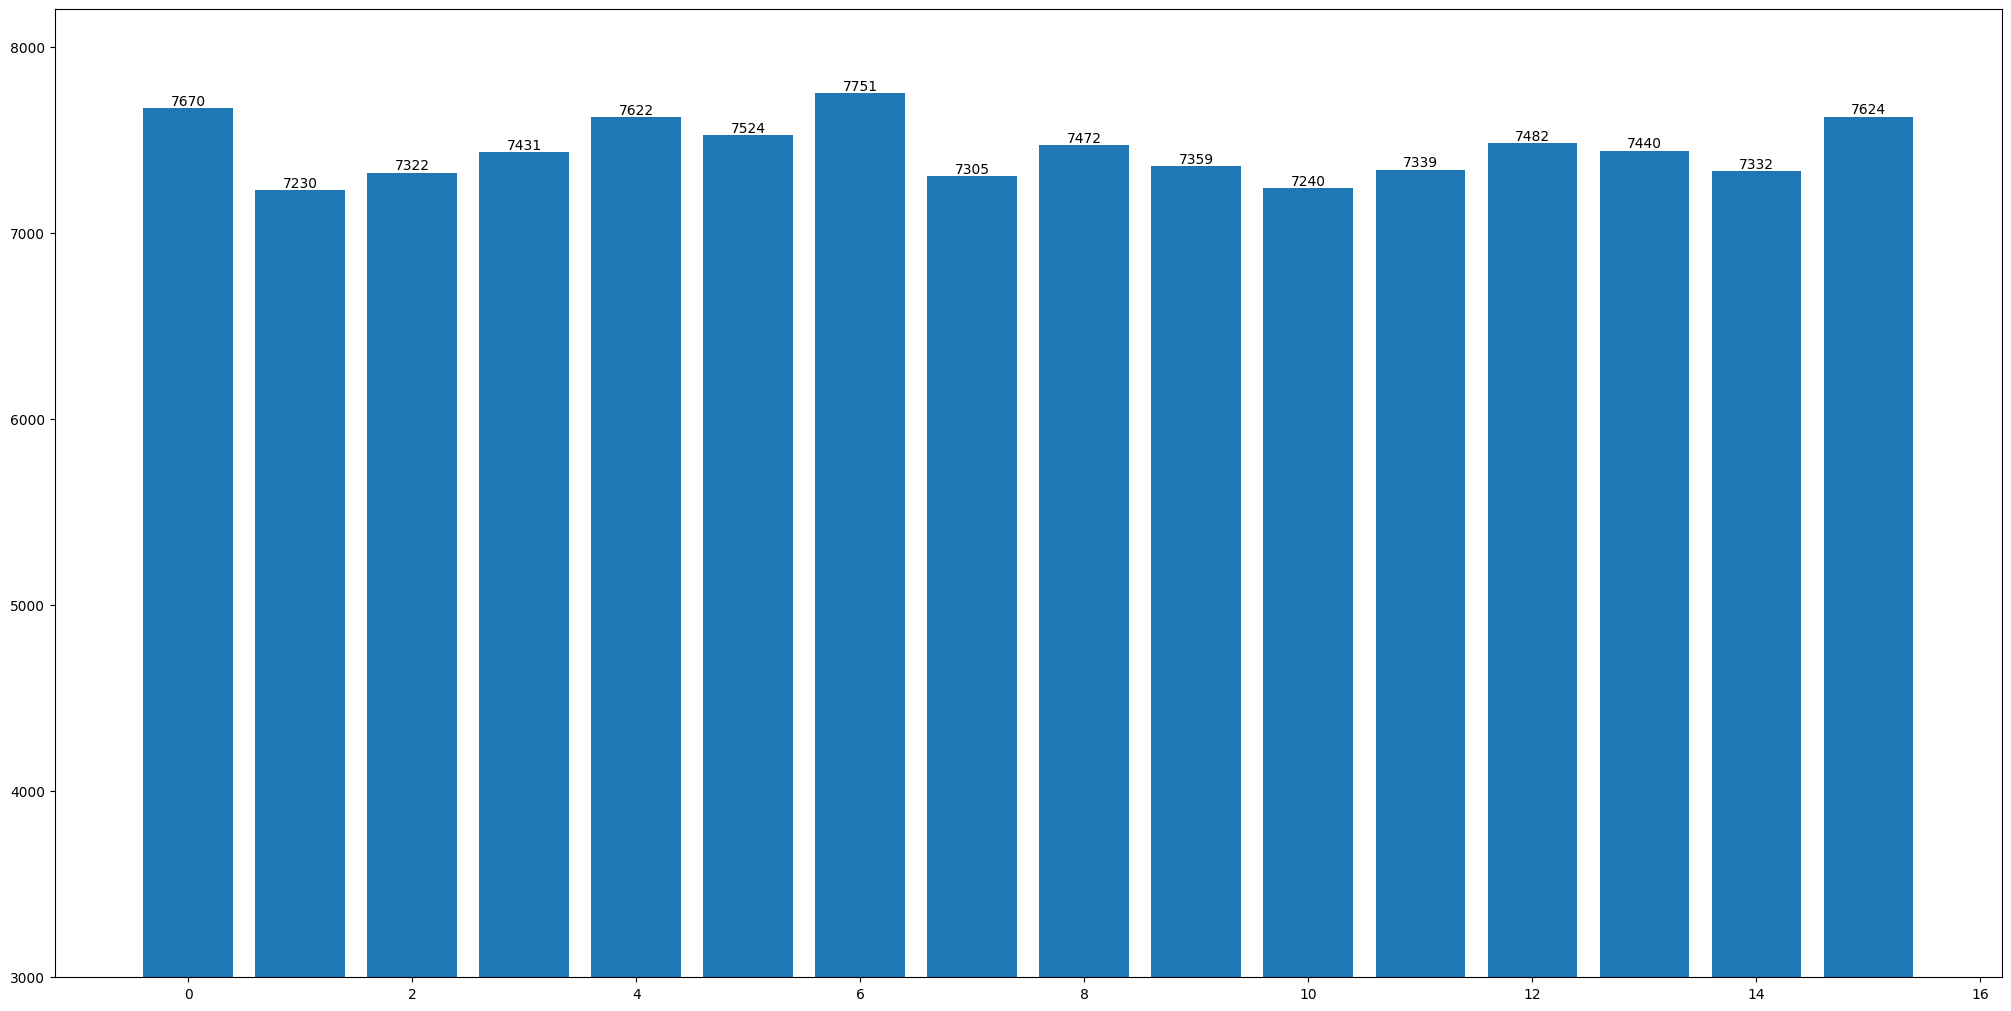

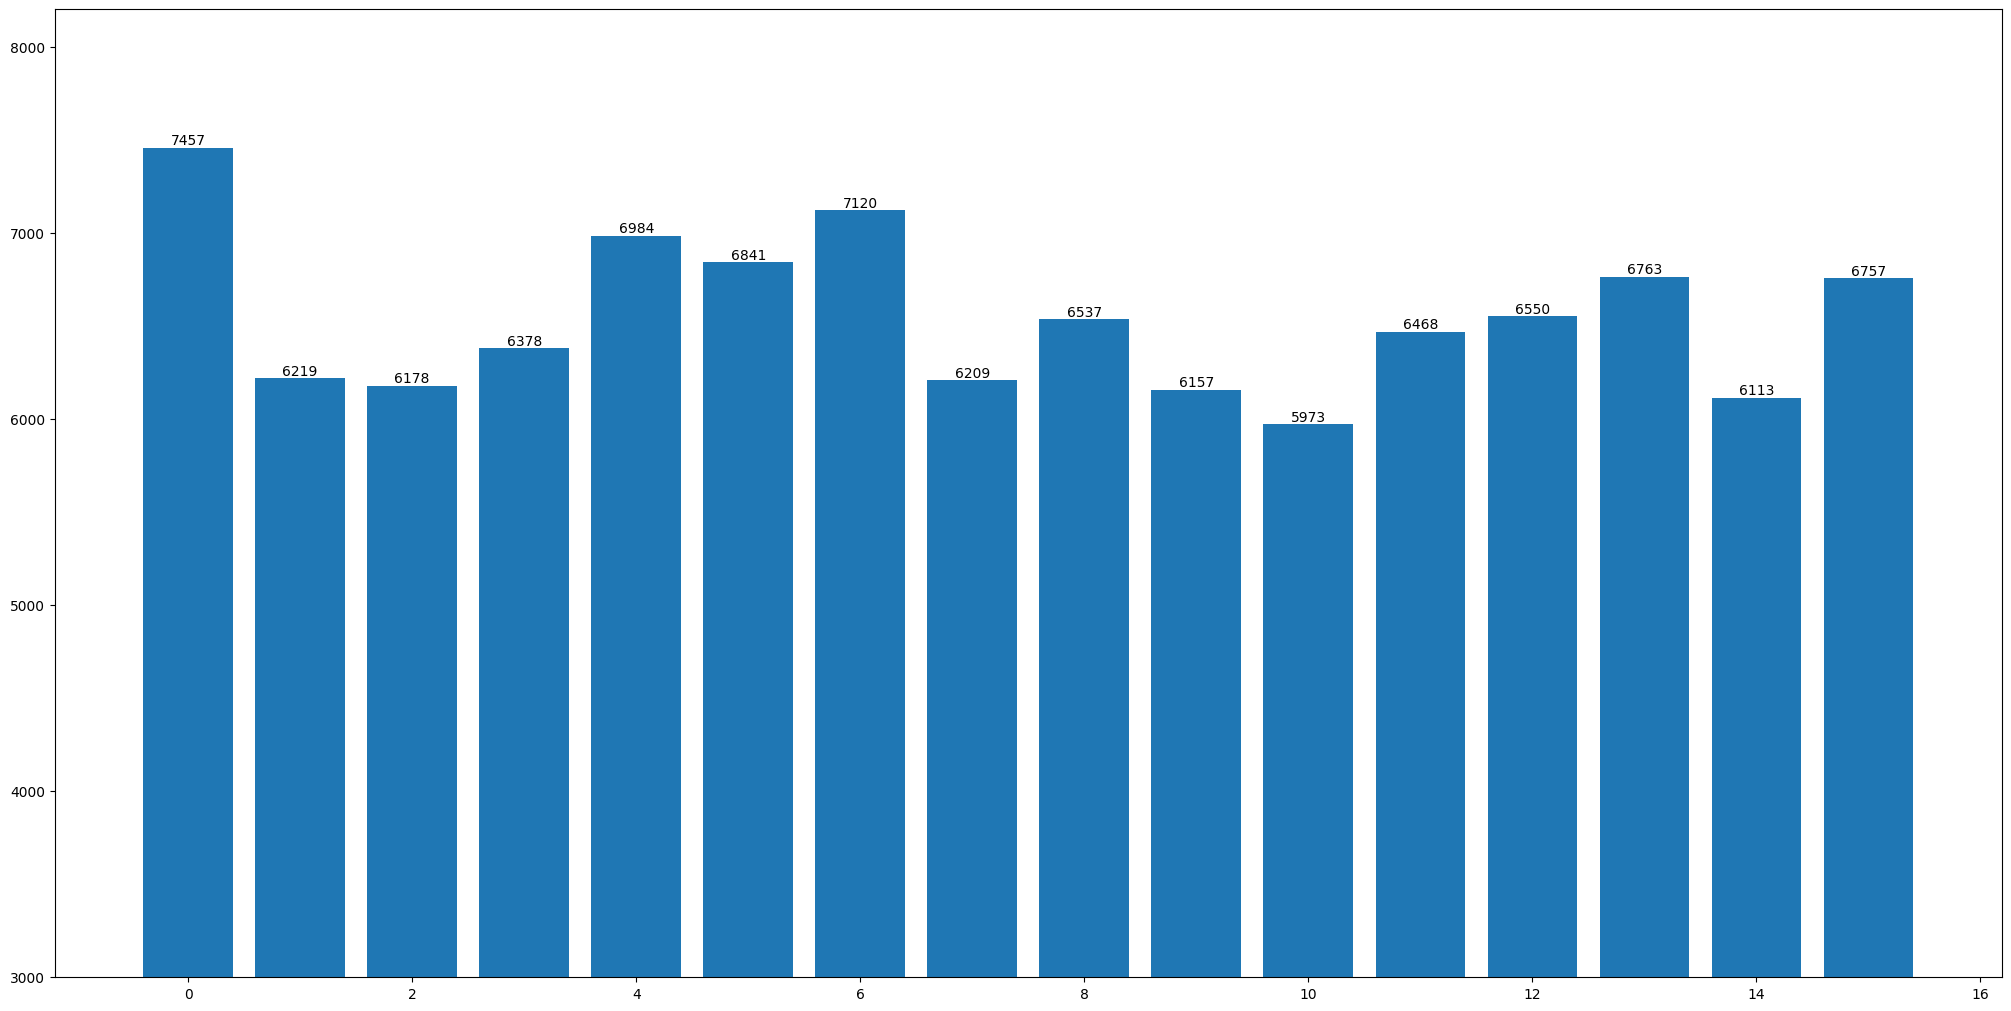

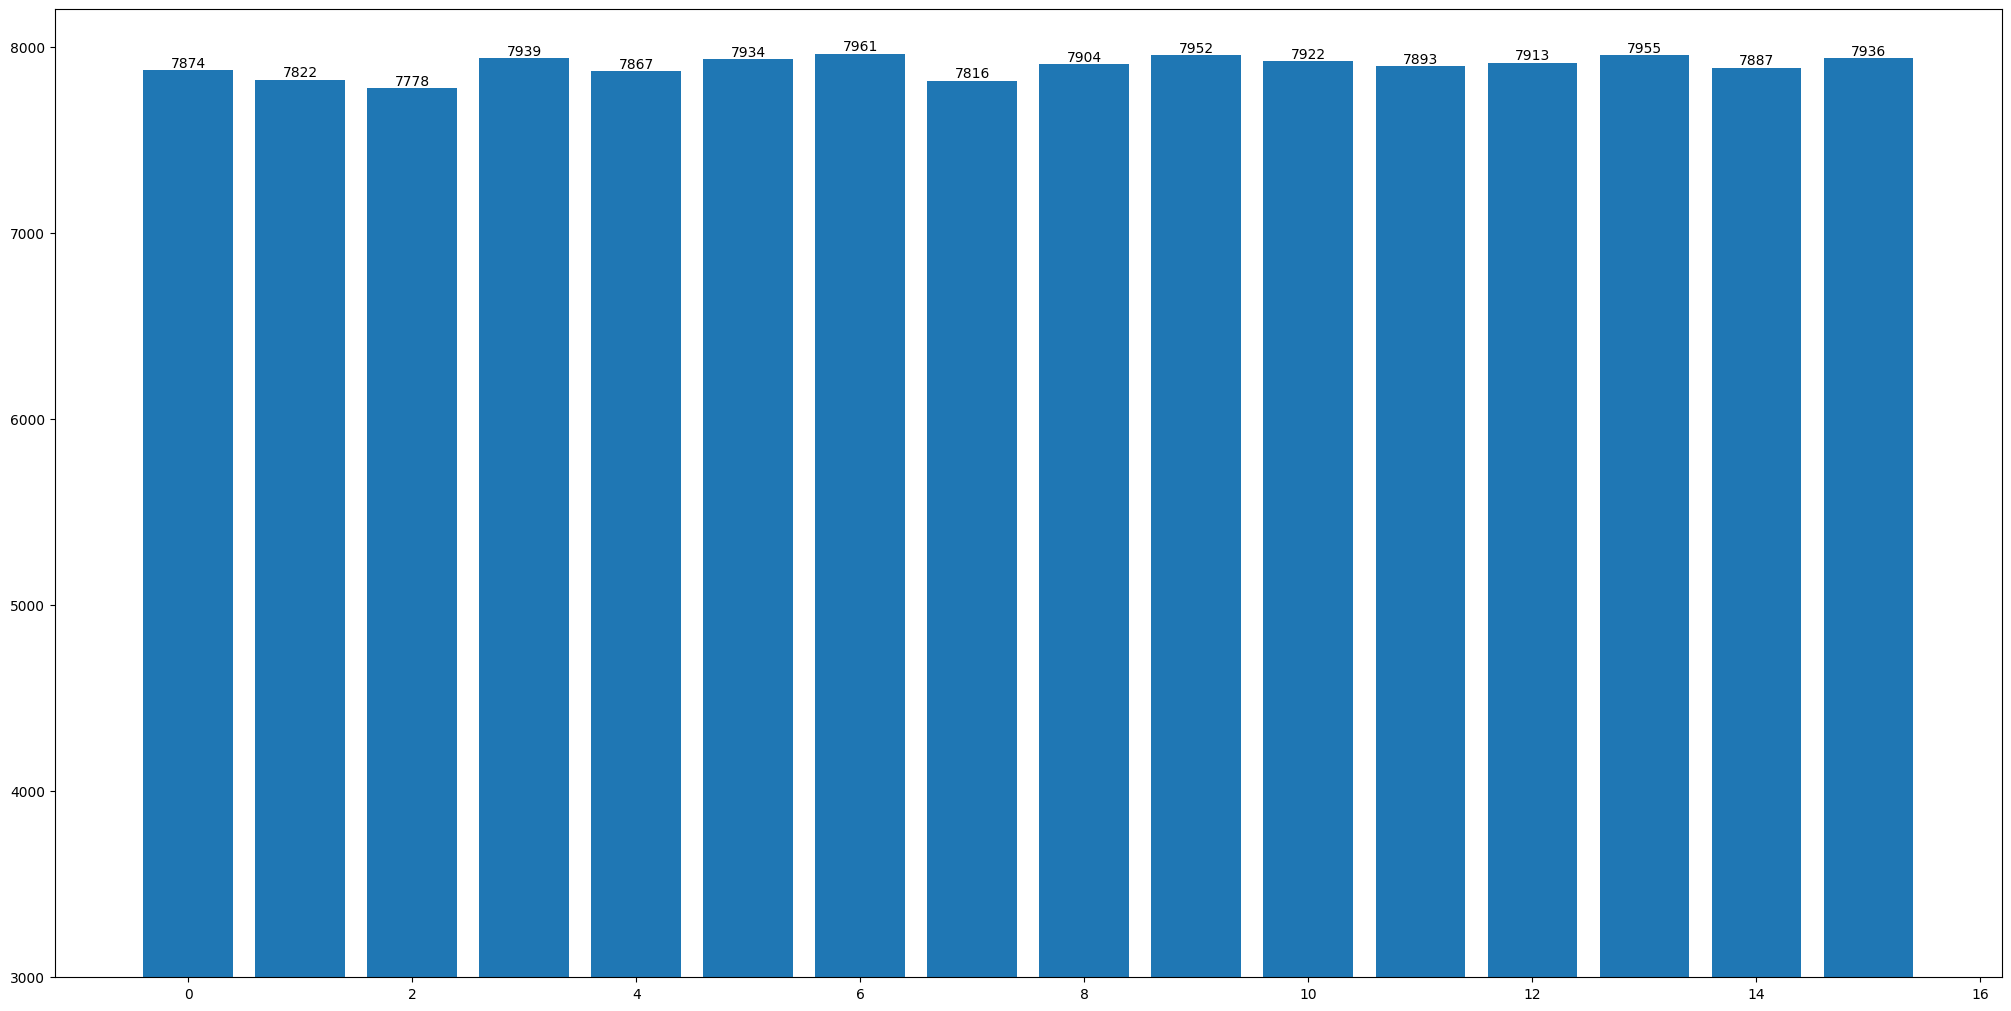

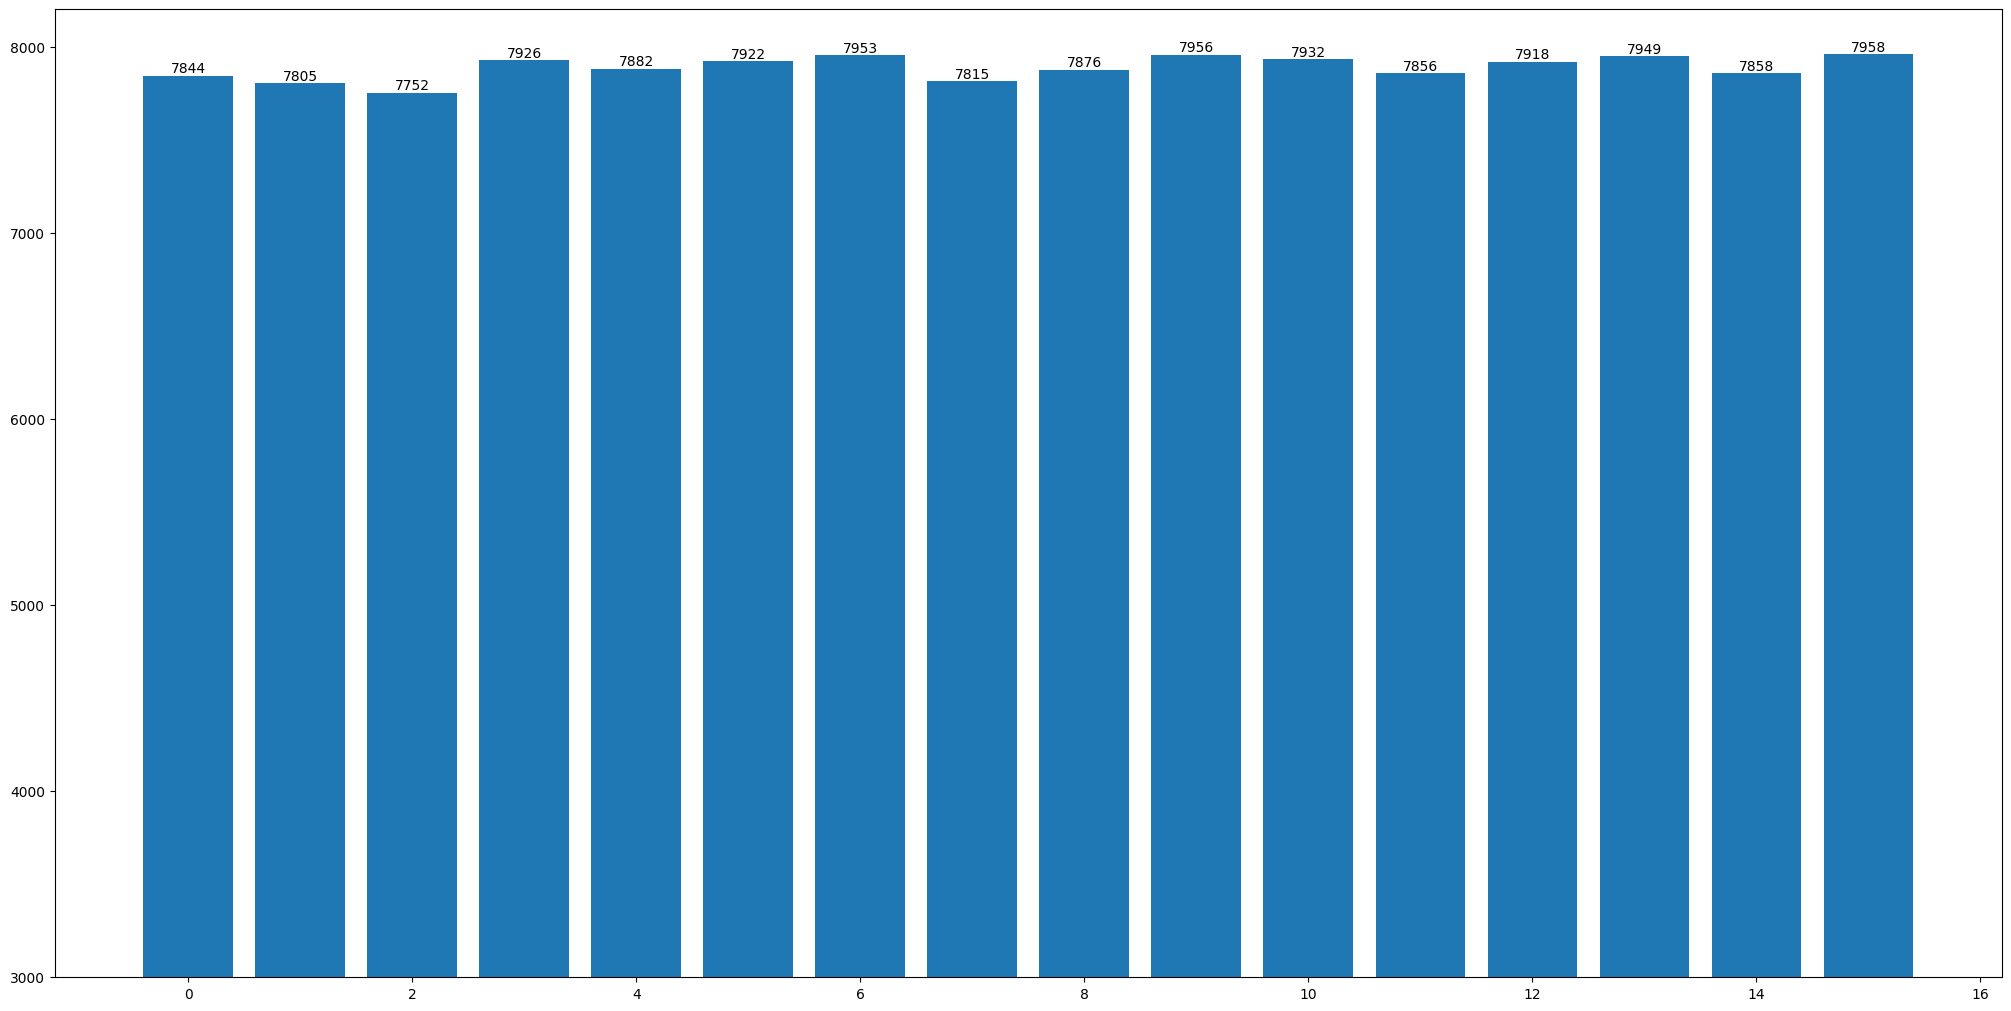

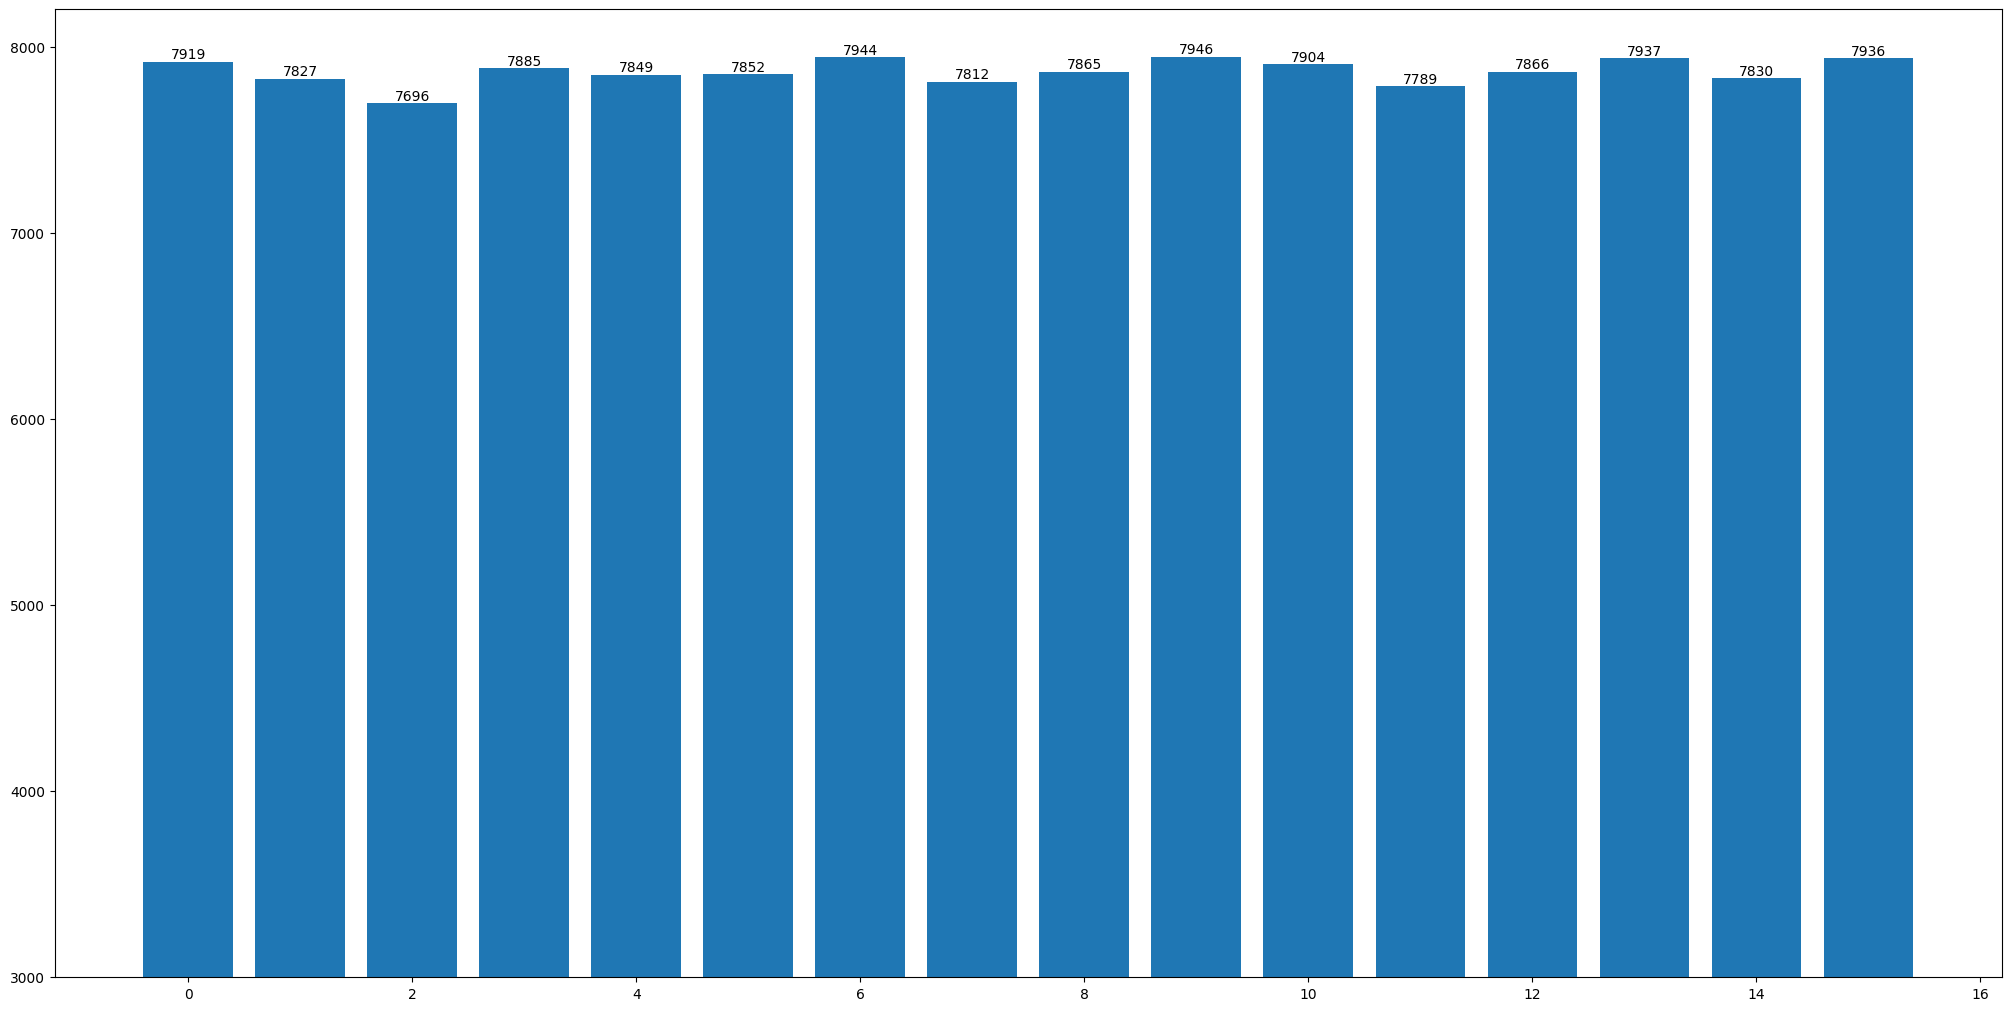

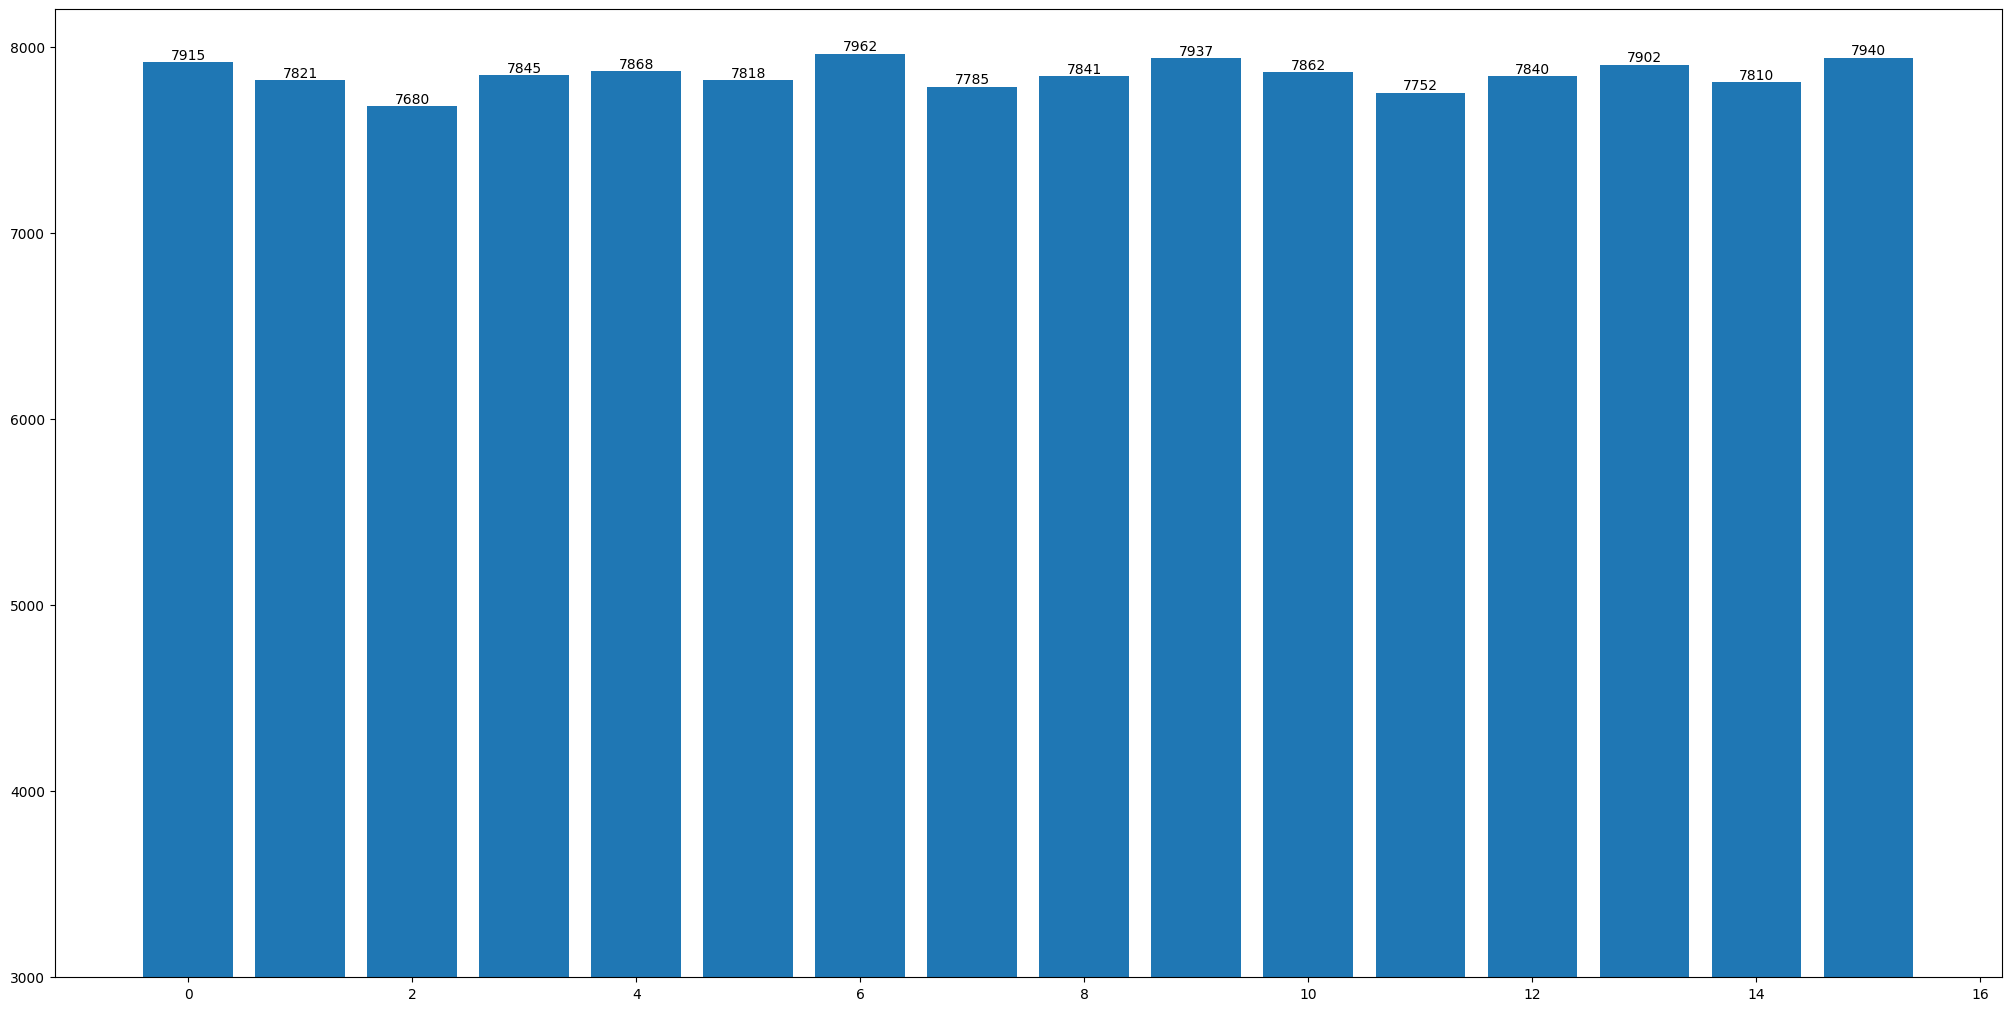

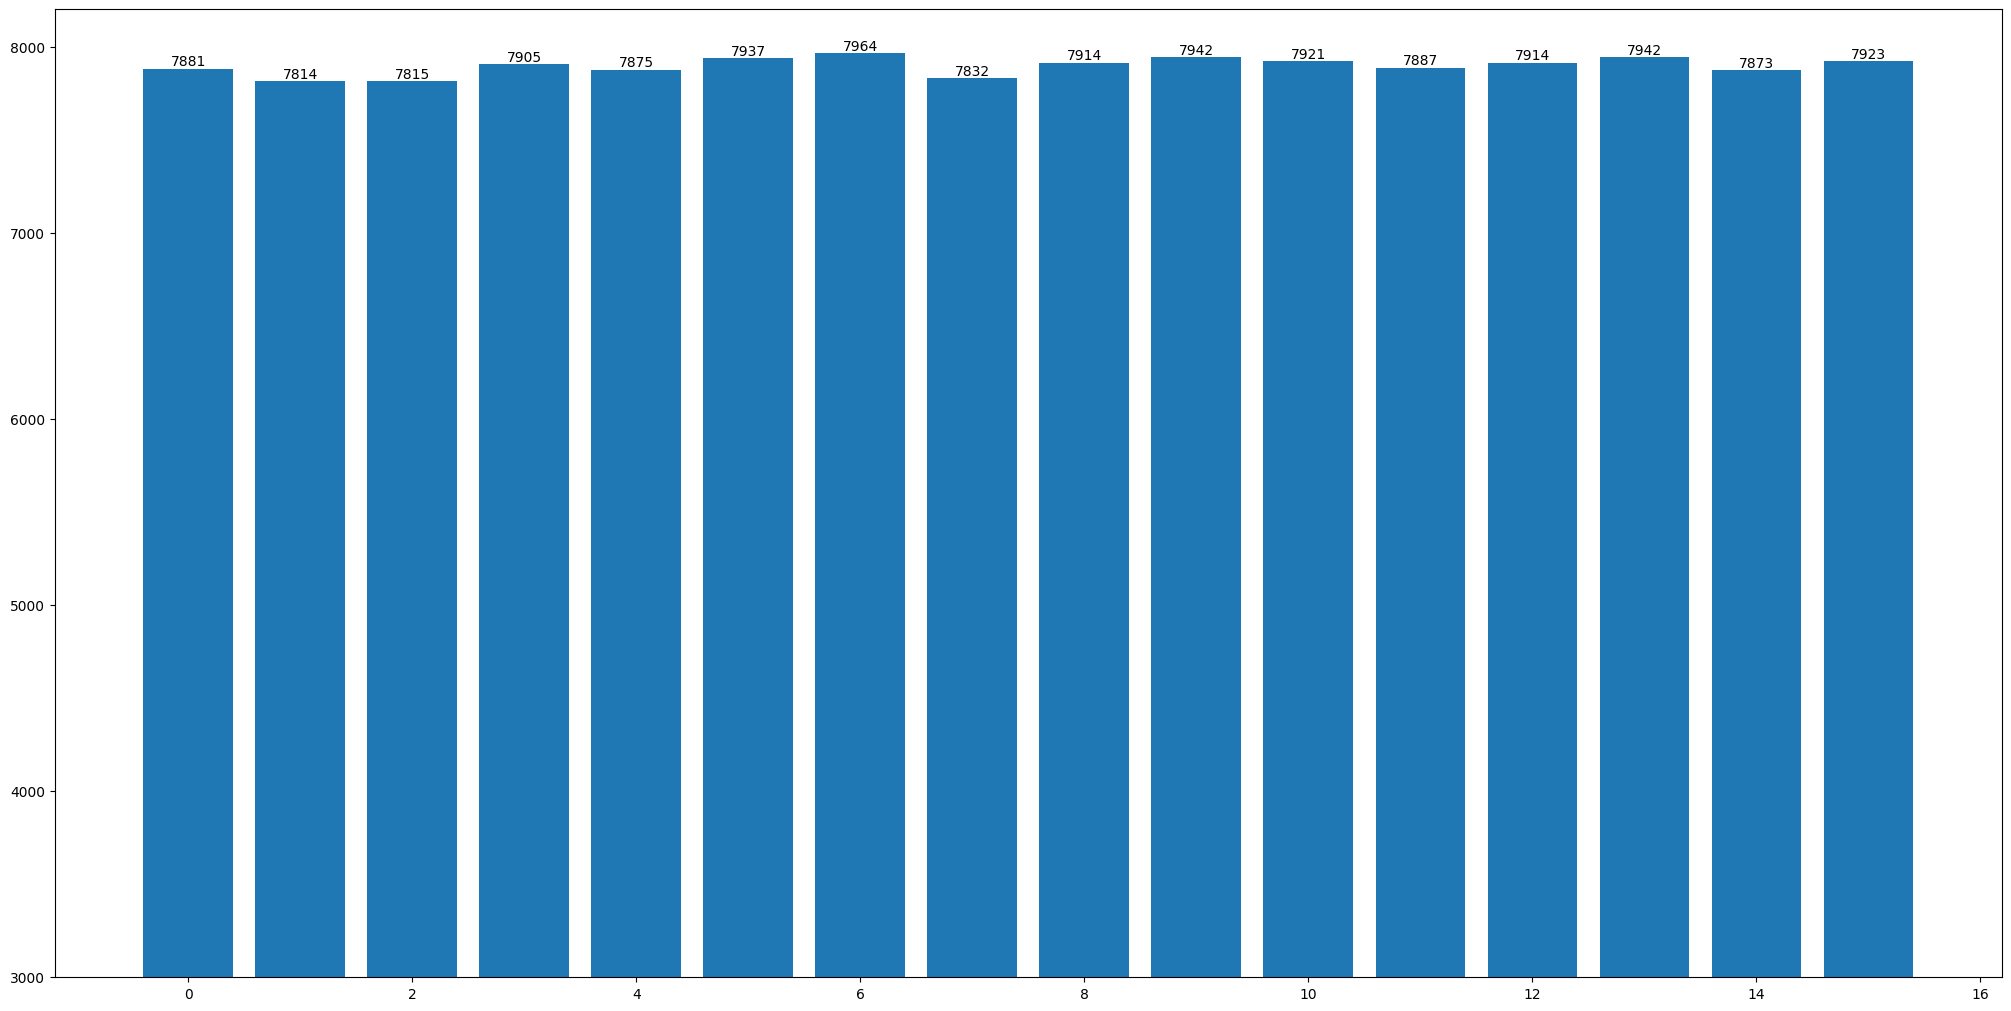

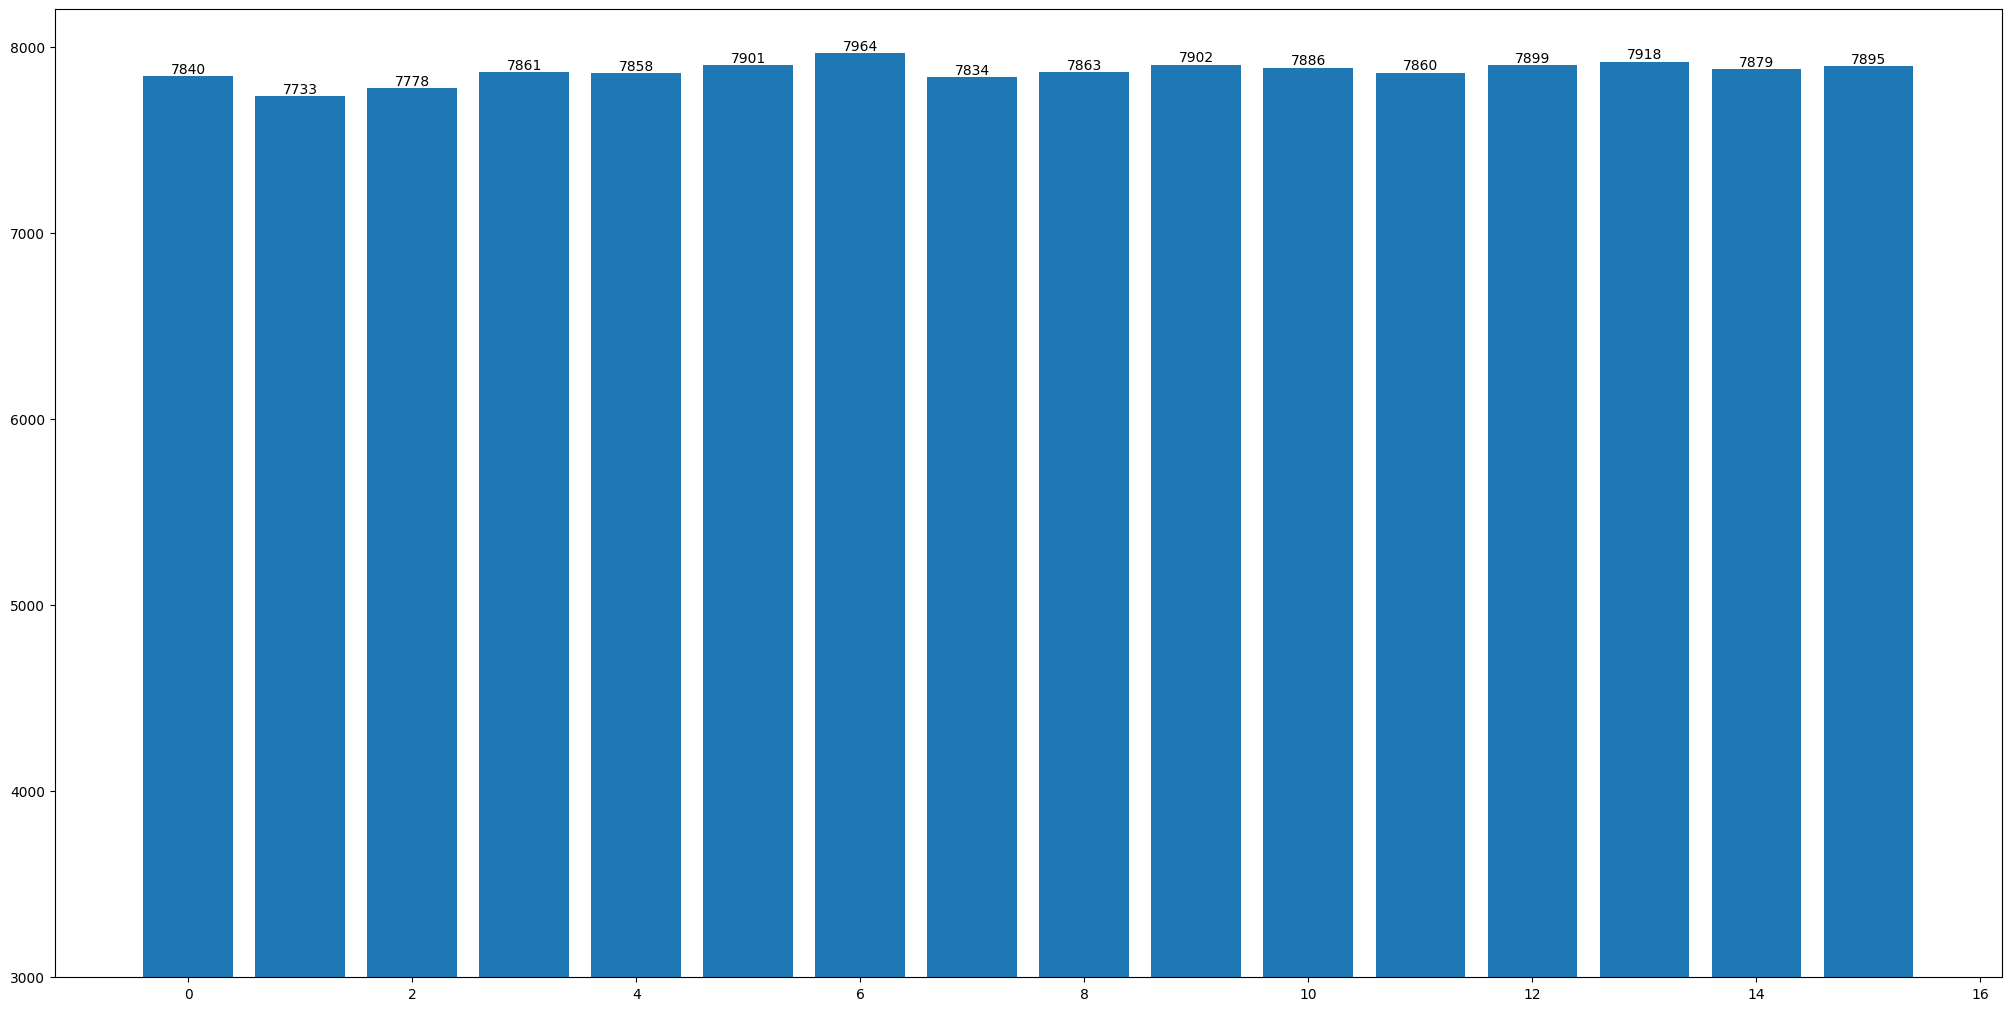

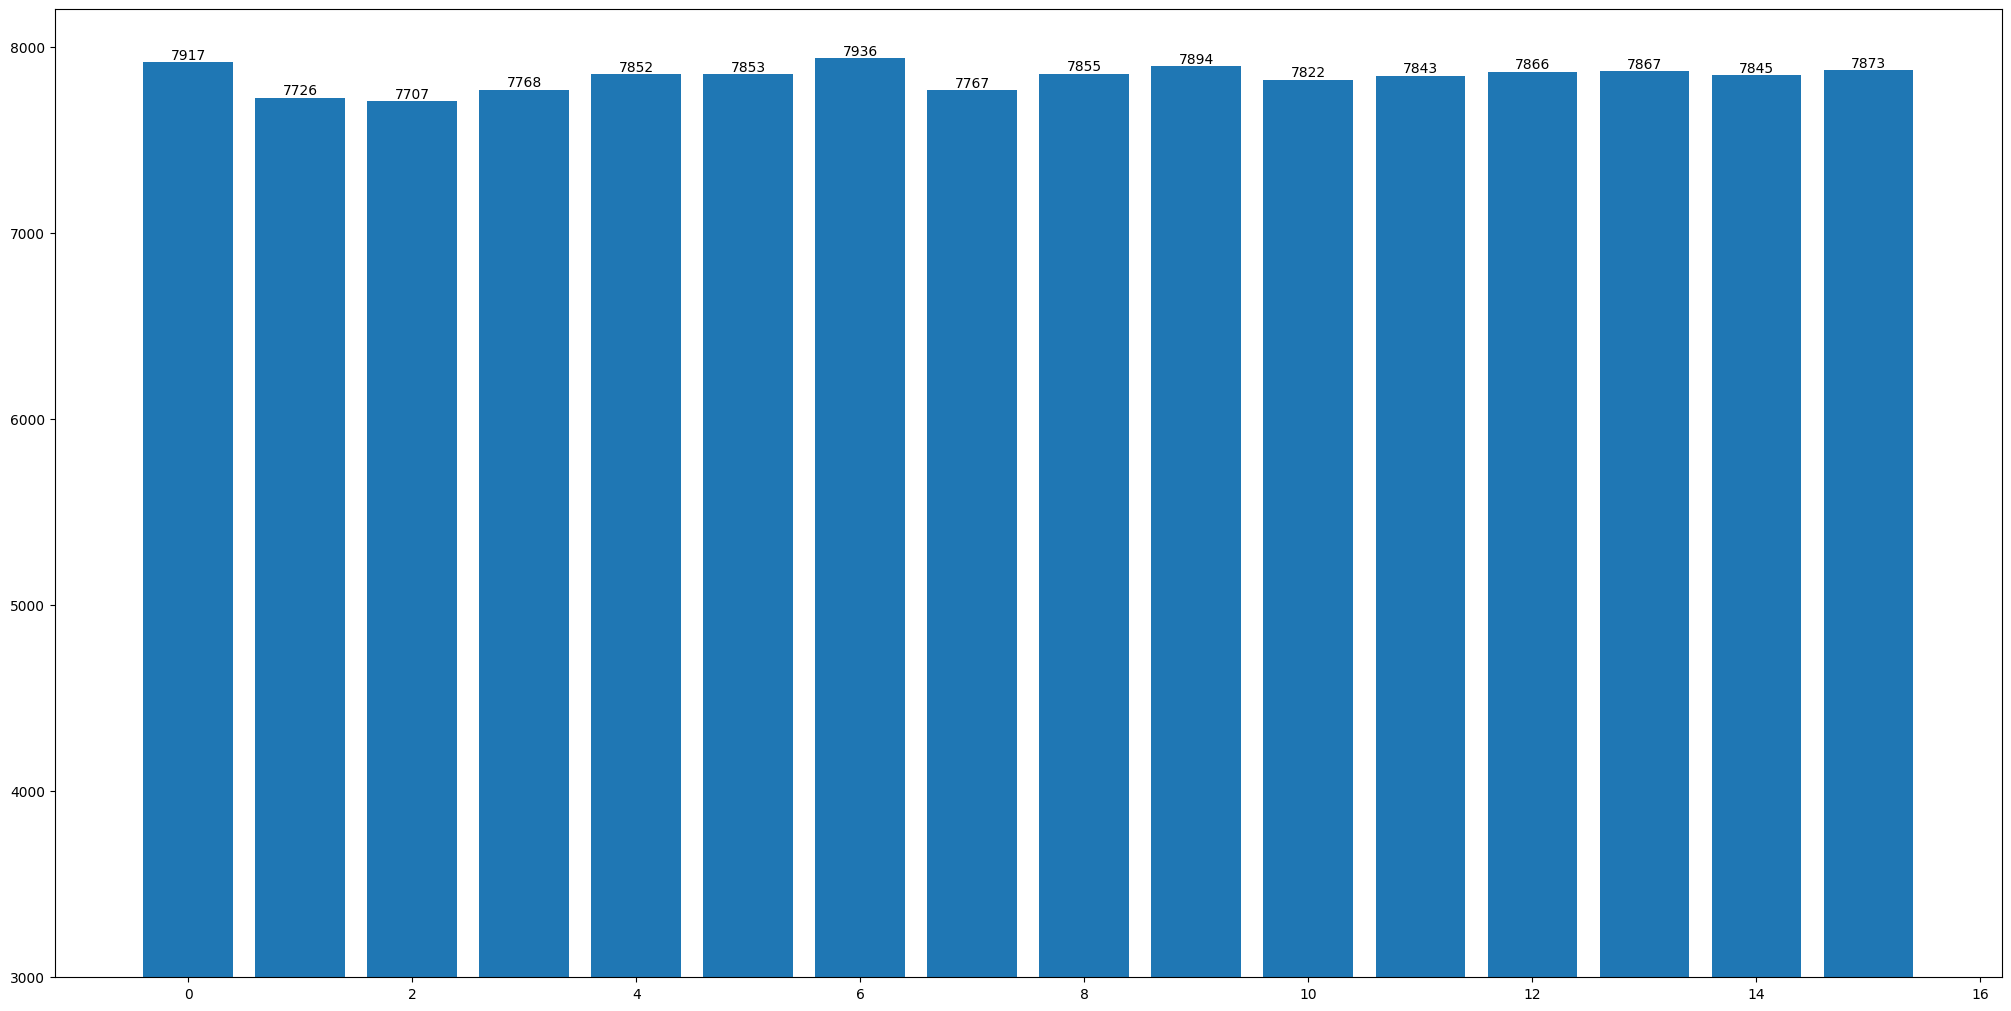

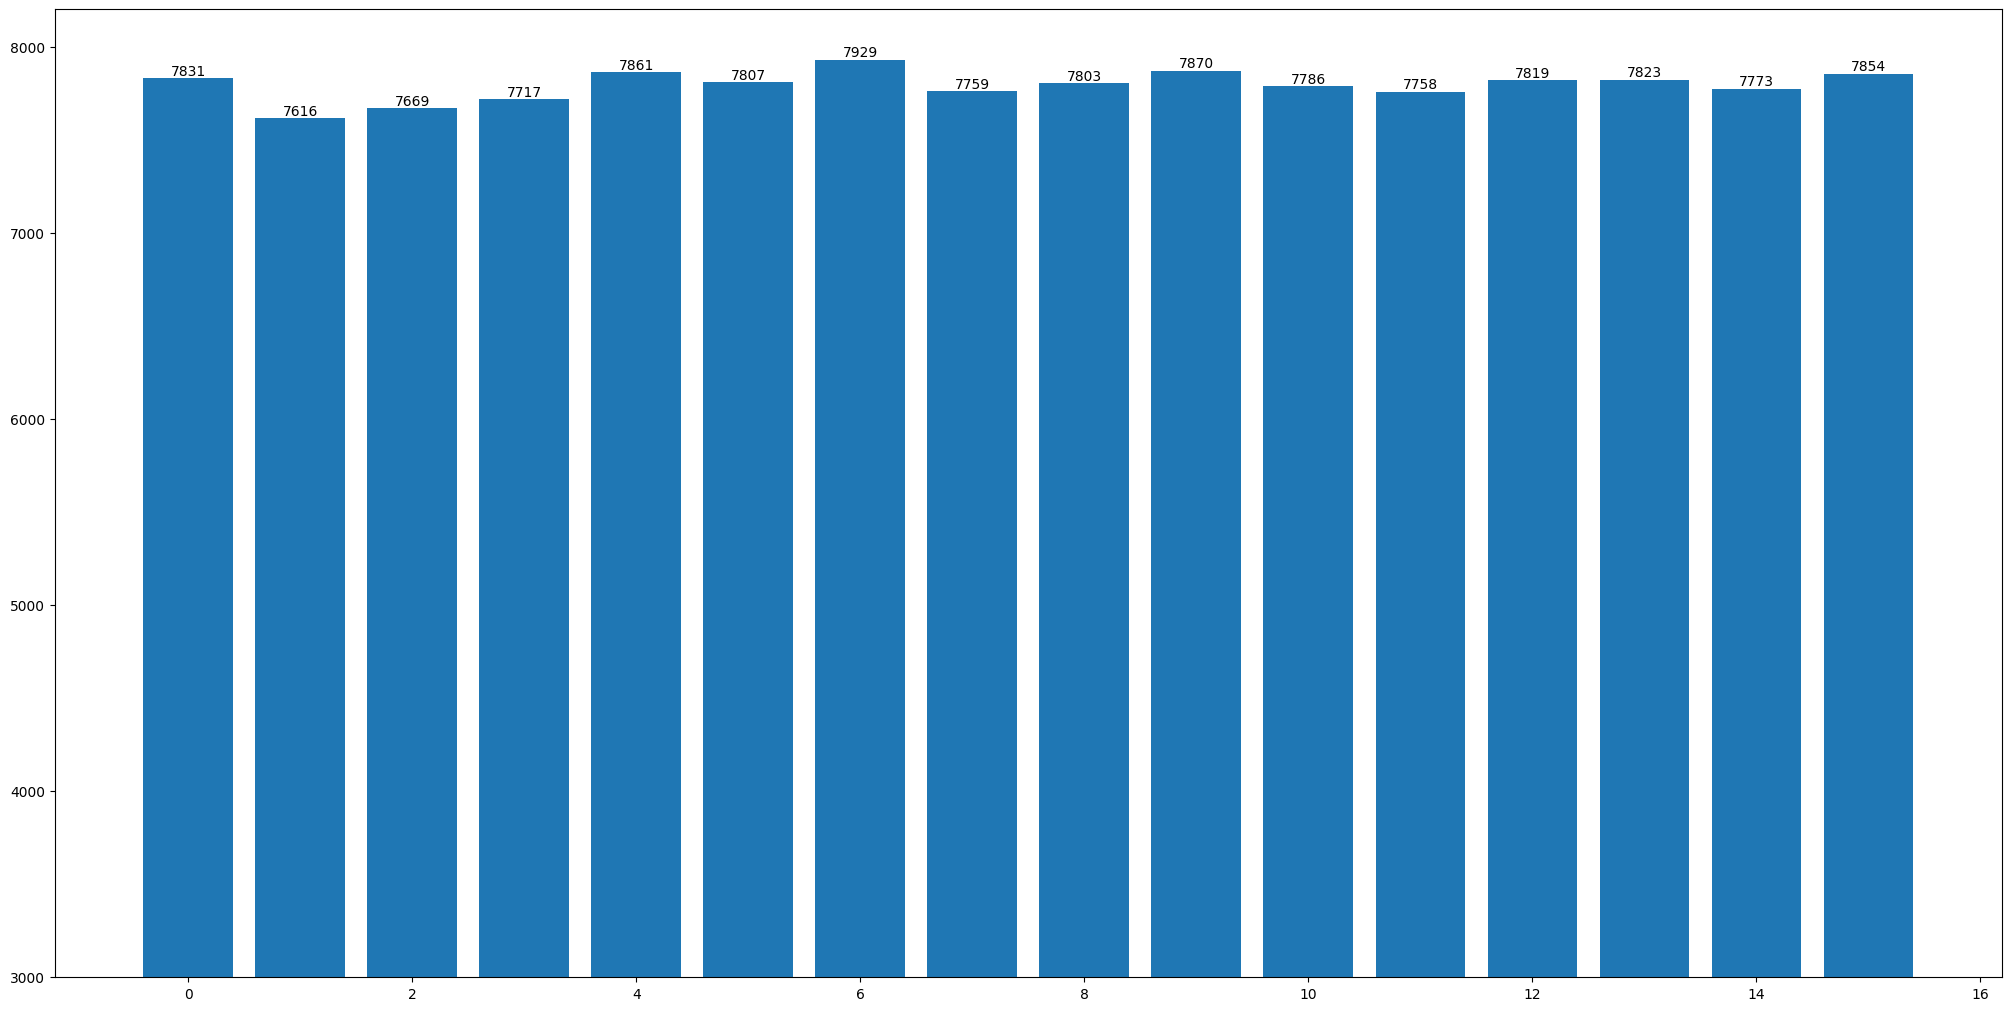

In [25]:
for i in range(len(counts)):
    data = []
    for j in range(16):
        c = marginal_counts(counts[i], [j,]).get('0', 0)
        data.append(c)
    fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))
    # Add value labels on top of each bar
    for j, value in enumerate(data):
        plt.text(j, value, str(value), ha='center', va='bottom')
    x = range(len(data))
    ax.bar(x, data)
    ax.set_ylim(3000, 8200)
    plt.show()

In [ ]:
# n = 3
# for start in range(0, len(snooper_qubits), n):
#     experiments = dict()
#     snooper_set = snooper_qubits[start:min(start+n, len(snooper_qubits))]
#     print(snooper_set)
#     for count, qc, name in zip(counts, qcs, qc_circ_names):
#         m_counts = []
#         for qubit in snooper_set:
#             m_counts.append(marginal_counts(count, [snooper_qubits.index(qubit),]).get('0', 0))
#         experiments[name] = m_counts

#     x = np.arange(len(snooper_set))
#     width = 0.024
#     multiplier = 0

#     fig, ax = plt.subplots(layout='constrained', figsize=(20, 10))

#     for attribute, measurement in experiments.items():
#         offset = width * multiplier
#         rects = ax.bar(x + offset, measurement, width, label=attribute)
#         ax.bar_label(rects, padding=3, rotation='vertical')
#         multiplier += 1

#     # Add some text for labels, title and custom x-axis tick labels, etc.
#     ax.set_ylabel('0 counts')
#     ax.set_xlabel('Attacker qubit #')
#     ax.set_title('0 counts on attacker qubits - ibmq_guadalupe')
#     ax.set_xticks(x + width, snooper_set)
#     ax.legend(loc='upper left', ncols=3)
#     # ax.set_ylim(4000, 8200)

#     plt.show()